# Анализ данных о дорожно-транспортных происшествиях в России

**Описание проекта**

Заказчиком выступает проект «Карта ДТП» — некоммерческий проект, посвящённый проблеме дорожно-транспортных происшествий в России. Это платформа сбора данных о ДТП, бесплатный и открытый сервис аналитики ДТП. Проект направлен на повышение безопасности дорожного движения и уменьшение количества смертей в автомобильных авариях. «Карта ДТП» помогает выявлять реальные причины ДТП, оценивать уровень развития инфраструктуры, а также разрабатывать качественные решения и программы по повышению безопасности на улицах и дорогах.

**Цель исследования** — проанализировать данные о дорожно-транспортных происшествиях в регионах России.

**Задачи:**

- Провести исследовательский анализ данных о ДТП.

- Сформулировать и проверить гипотезы, основываясь на имеющихся признаках.

**Описание данных**

Первоисточник данных – официальный сайт ГИБДД, но в данных есть изменения (например, корректировки координат).

Информация представлена практически для всех субъектов Российской Федерации за период с января 2015 года по сентябрь 2024 года. Для Владимирской и Челябинской областей данные доступны с января 2015 года по июнь 2024 года.

- `id` — идентификатор

- `light` — время суток

- `point` — координаты

- `geometry` — геометрические объекты (точки)

- `nearby` — объекты, расположенные рядом с местом ДТП

- `region` — город/район

- `address` — адрес

- `category` — тип ДТП

- `scheme` — схема ДТП, закодированная числом

- `datetime` — дата и время

- `severity` — тяжесть ДТП/вред здоровью

- `vehicles` — участники – транспортные средства:
   
   - `year` — год производства транспортного средства
  
   - `brand` — марка транспортного средства
  
   - `color` — цвет транспортного средства
  
   - `model` — модель транспортного средства
  
   - `category` — категория транспортного средства
  
   - `participants` — участники внутри транспортных средств:
      
      - `role` — роль участника
     
      - `gender` — пол участника
      
      - `violations` — нарушения правил участником
     
      - `health_status` — состояние здоровья участника
     
      - `years_of_driving_experience` — стаж вождения участника (только у водителей)

- `dead_count` — количество погибших в ДТП

- `participants` — участники без транспортных средств (описание, как у участников внутри транспортных средств)

- `injured_count` — количество раненых в ДТП

- `parent_region` — регион

- `participants_count` — количество участников ДТП

**План работы**

1. Загрузка и предобработка данных.

- Парсинг данных о ДТП с сайта.
- Загрузка данных из geojson-файлов в переменную.
- Вывод первых строк набора данных.
- Изучение общей информации о датафрейме.
- Анализ пропущенных значений, явных и неявных дубликатов в данных.
- Замена названий столбцов датафрейма.
- Анализ выбросов в данных.
- Преобразование данных в нужный тип.

2. Исследовательский анализ данных.

- Изучение распределений по имеющимся признакам.
- Описание особенностей дорожно-транспортных происшествий с погибшими и без погибших.
- Описание особенностей дорожно-транспортных происшествий с одним и несколькими участниками.
- Корреляционный анализ.

3. Проверка статистических гипотез.

- Проверка гипотезы различия степени тяжести ДТП между ЦФО и другими федеральными округами РФ.
- Проверка гипотезы различия количества участников ДТП летом и в другие времена года.
- Проверка гипотезы различия количества погибших в ДТП в последние 5 лет и в предыдущие 5 лет.

4. Написание общего вывода по результатам исследования.

## Загрузка данных и подготовка их к анализу

### Считывание файлов с данными и сохранение в датафрейм

Импортируем необходимые библиотеки и модули.

In [3]:
!pip install phik

In [5]:
import requests
import pandas as pd
import geopandas as gpd
from bs4 import BeautifulSoup
import json
import urllib.request
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as st
import phik
from phik.report import plot_correlation_matrix
import warnings
warnings.filterwarnings('ignore')

Получим данные с сайта «https://dtp-stat.ru/opendata». Извлечём все ссылки из html-документа. Создадим функцию для загрузки данных в формате geojson.

In [7]:
req = requests.get('https://dtp-stat.ru/opendata')
html = BeautifulSoup(req.text)
hrefs = html.find_all('a')

def df(number):
    df = gpd.read_file(hrefs[number].get('href'))
    return df

Вызовем функцию для считывания данных о ДТП в разных регионах России из файлов в датафреймы, объединим датафреймы и сохраним в переменную `data`.

In [9]:
data = df(7)

for number in range(8, 92):
    data = pd.concat([data, df(number)],
    axis=0)

Skipping field tags: unsupported OGR type: 5
Skipping field nearby: unsupported OGR type: 5
Skipping field weather: unsupported OGR type: 5
Skipping field road_conditions: unsupported OGR type: 5
Skipping field participant_categories: unsupported OGR type: 5
Skipping field tags: unsupported OGR type: 5
Skipping field weather: unsupported OGR type: 5
Skipping field road_conditions: unsupported OGR type: 5
Skipping field participant_categories: unsupported OGR type: 5
Skipping field tags: unsupported OGR type: 5
Skipping field nearby: unsupported OGR type: 5
Skipping field weather: unsupported OGR type: 5
Skipping field road_conditions: unsupported OGR type: 5
Skipping field participant_categories: unsupported OGR type: 5
Skipping field tags: unsupported OGR type: 5
Skipping field nearby: unsupported OGR type: 5
Skipping field weather: unsupported OGR type: 5
Skipping field road_conditions: unsupported OGR type: 5
Skipping field participant_categories: unsupported OGR type: 5
Skipping fi

### Вывод первых строк набора данных

Выведем первые 5 строк датафрейма `data` на экран.

In [13]:
pd.set_option('display.max_colwidth', None)
data.head()

,id,light,point,region,scheme,address,category,datetime,severity,vehicles,dead_count,participants,injured_count,parent_region,participants_count,geometry,nearby
0,2869171,Светлое время суток,"{ ""lat"": 53.391199999999998, ""long"": 83.787899999999993 }",Барнаул,830,None,Наезд на пешехода,2023-05-24 19:30:00,Легкий,"[ { ""year"": 2015, ""brand"": ""Прочие марки ТС"", ""color"": ""Черный"", ""model"": ""Прочие марки и модели ТС"", ""category"": ""Мопеды с двигателем внутреннего сгорания менее 50 см. куб."", ""participants"": [ { ""role"": ""Водитель"", ""gender"": ""Мужской"", ""violations"": [ ""Управление мопедом лицом моложе 16 лет"", ""Управление ТС лицом, не имеющим права на управление ТС"", ""Оставление места ДТП"", ""Невыполнение требований обеспечения безопасности при начале движения"" ], ""health_status"": ""Не пострадал"", ""years_of_driving_experience"": null } ] } ]",0,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""violations"": [ ], ""health_status"": ""Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара"" } ]",1,Алтайский край,2,POINT (83.7879 53.3912),NaN
1,2320091,Светлое время суток,"{ ""lat"": 53.345832999999999, ""long"": 83.666388999999995 }",Барнаул,880,"г Барнаул, ул Сиреневая, 11",Иной вид ДТП,2015-09-16 13:00:00,Легкий,"[ { ""year"": 2002, ""brand"": ""TOYOTA"", ""color"": ""Серый"", ""model"": ""Corolla"", ""category"": ""С-класс (малый средний, компактный) до 4,3 м"", ""participants"": [ { ""role"": ""Водитель"", ""gender"": ""Мужской"", ""violations"": [ ""Несоблюдение условий, разрешающих движение транспорта задним ходом"" ], ""health_status"": ""Не пострадал"", ""years_of_driving_experience"": 14 } ] } ]",0,[ ],1,Алтайский край,2,POINT (83.66639 53.34583),NaN
2,2965960,Светлое время суток,"{ ""lat"": 53.330683999999998, ""long"": 83.692629999999994 }",Барнаул,740,"г Барнаул, ул Малахова, 158",Наезд на пешехода,2024-04-10 14:50:00,Легкий,"[ { ""year"": 2020, ""brand"": ""MERCEDES"", ""color"": ""Белый"", ""model"": ""G-класс"", ""category"": ""С-класс (малый средний, компактный) до 4,3 м"", ""participants"": [ { ""role"": ""Водитель"", ""gender"": ""Женский"", ""violations"": [ ""Нарушение правил проезда пешеходного перехода"" ], ""health_status"": ""Не пострадал"", ""years_of_driving_experience"": 17 } ] } ]",0,"[ { ""role"": ""Пешеход"", ""gender"": ""Женский"", ""violations"": [ ], ""health_status"": ""Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара"" } ]",1,Алтайский край,2,POINT (83.69263 53.33068),NaN
3,2965967,Светлое время суток,"{ ""lat"": 53.360453999999997, ""long"": 83.763912000000005 }",Барнаул,960,"г Барнаул, пр-кт Ленина, 100а",Падение пассажира,2024-04-07 09:50:00,Легкий,"[ { ""year"": 2006, ""brand"": ""SCANIA"", ""color"": ""Желтый"", ""model"": ""OMNI"", ""category"": ""Одноэтажные длиной от 5 до 8 м"", ""participants"": [ { ""role"": ""Пассажир"", ""gender"": ""Женский"", ""violations"": [ ], ""health_status"": ""Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара"", ""years_of_driving_experience"": null }, { ""role"": ""Водитель"", ""gender"": ""Мужской"", ""violations"": [ ""Невыполнение требований обеспечения безопасности при начале движения"" ], ""health_status"": ""Не пострадал"", ""years_of_driving_experience"": 26 } ] } ]",0,[ ],1,Алтайский край,2,POINT (83.76391 53.36045),NaN
4,2965971,Светлое время суток,"{ ""lat"": 53.330075000000001, ""long"": 83.664123000000004 }",Барнаул,300,"г Барнаул, ул Попова, 214",Столкновение,2024-04-06 17:10:00,Тяжёлый,"[ { ""year"": 2005, ""brand"": ""MAZDA"", ""color"": ""Красный"", ""model"": ""Mazda 6"", ""category"": ""В-класс (малый) до 3,9 м"", ""participants"": [ { ""role"": ""Водитель"", ""gender"": ""Мужской"", ""violations"": [ ""Несоблюдение очередности проезда"" ], ""health_status"": ""Раненый, находящийся (находившийся) на стационарном лечении"", ""years_of_driving_experience"": 43 } ] 

### Изучение общей информации о датафрейме. Анализ пропусков и дубликатов

Выведем основную и статистическую информацию о датафрейме `data`, число дубликатов, а также количество и долю пропущенных значений для всех столбцов.

In [17]:
def df_info(df, name):
# функция для вывода информации о датафрейме
    print('\033[1m', f'Таблица «{name}»', '\033[0m')
    # вывод названия датафрейма
    print(df.info())
    # вывод информации о структуре данных, хранящихся в переменной ‘df’
    print('-' * 80)
    # вывод символа «-» 80 раз
    display(df.describe())
    # вывод статистической информации о значениях столбцов датафрейма ‘df’
    print('-' * 80)
    # вывод символа «-» 80 раз
    print('\033[1m', f'Количество дубликатов в таблице «{name}»:',
          df.duplicated().sum(),
          ', процент дубликатов:',
          round((df.duplicated().sum() / len(df)) * 100, 2), '%',
          '\033[0m')
    # вычисление количества и доли дубликатов в датафрейме ‘df’
    print('-' * 80)
    # вывод символа «-» 80 раз
    for i in df.columns:
        print('\033[1m', f'Столбец «{i}» -',
        'количество NaN:', df[i].isna().sum(),
        ', процент NaN:', round(df[i].isna().mean() * 100, 2),
        '%', '\033[0m')
        # вычисление количества и доли отсутствующих значений (NaN)
        # в каждом столбце датафрейма ‘df’
        print('-' * 80)
        # вывод символа «-» 80 раз

df_info(data, 'data')
# вызов функции df_info для датафрейма ‘data’

 Таблица «data» 
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1502773 entries, 0 to 16803
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1502773 non-null  int32         
 1   light               1502773 non-null  object        
 2   point               1502773 non-null  object        
 3   region              1502773 non-null  object        
 4   scheme              1416965 non-null  object        
 5   address             1427941 non-null  object        
 6   category            1502773 non-null  object        
 7   datetime            1502773 non-null  datetime64[ms]
 8   severity            1502773 non-null  object        
 9   vehicles            1502773 non-null  object        
 10  dead_count          1502773 non-null  int32         
 11  participants        1502773 non-null  object        
 12  injured_count       1502773 non-null  int32         

,id,datetime,dead_count,injured_count,participants_count
count,1.502773e+06,1502773,1.502773e+06,1.502773e+06,1.502773e+06
mean,2.279130e+06,2019-07-29 14:18:04.327000,1.120382e-01,1.264071e+00,2.469518e+00
min,1.527476e+06,2015-01-01 00:01:00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.903169e+06,2017-02-17 18:40:00,0.000000e+00,1.000000e+00,2.000000e+00
50%,2.278862e+06,2019-05-31 18:00:00,0.000000e+00,1.000000e+00,2.000000e+00
75%,2.655409e+06,2021-11-25 18:00:00,0.000000e+00,1.000000e+00,3.000000e+00
max,3.032685e+06,2024-09-30 23:47:00,2.000000e+01,1.060000e+02,1.680000e+02
std,4.341503e+05,NaN,3.868587e-01,8.993987e-01,1.190748e+00


--------------------------------------------------------------------------------
 Количество дубликатов в таблице «data»: 0 , процент дубликатов: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «id» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «light» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «point» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «region» - количество NaN: 0 , процент NaN: 0.0 % 
--------------------------------------------------------------------------------
 Столбец «scheme» - количество NaN: 85808 , процент NaN: 5.71 % 
--------------------------------------------------------------------------------
 Столбец «address» - количество NaN: 74832 , процент NaN: 4.98

В таблице `data` 1 млн. 502 тыс. 773 строки и 17 столбцов. 11 столбцов содержат данные с типом object (`'light'`, `'point'`, `'region'`, `'scheme'`, `'address'`, `'category'`, `'severity'`, `'vehicles'`, `'participants'`, `'parent_region'`, `'nearby'`), 4 столбца целые числа — (`'id'`, `'dead_count'`, `'injured_count'`, `'participants_count'`), 1 столбец — даты и время (`'datetime'`) и 1 столбец — данные с типом geometry, который содержит пространственную информацию каждого объекта (`'geometry'`). Явные дубликаты в датафрейме `data` отсутствуют. В столбцах `'nearby'`, `'scheme'`, `'address'` и `'geometry'` содержится 1 млн. 41 тыс. 974 пропуска, 85 тыс. 808 пропусков, 74 тыс. 832 пропуска и 10 тыс. 744 пропуска соответственно. Это составляет 69.34%, 5.71%, 4.98% и 0.71% от общего числа наблюдений соответственно. Не будем удалять строки из датафрейма `data`, где есть пропущенные значения в столбцах `'nearby'`, `'scheme'`, `'address'` и `'geometry'`, чтобы избежать потери значимой информации.

Напишем функцию для создания таблицы на основе информации из столбца `'vehicles'` датафрейма `data` об участниках ДТП.

Создадим датафрейм `vehicles_general`, содержащий данные о транспортных средствах.

In [22]:
def t_vehicles(number):
    vehicles = pd.DataFrame(json.loads(data['vehicles'].iloc[number]))
    return vehicles

vehicles_1 = t_vehicles(0).assign(id = data['id'].iloc[0])

for number in range(1, 50000):
        vehicles_1 = pd.concat(
        [vehicles_1, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_1 = vehicles_1.reset_index().drop('index', axis=1)

In [28]:
vehicles_2 = t_vehicles(0).assign(id = data['id'].iloc[50000])

for number in range(50001, 100000):
        vehicles_2 = pd.concat(
        [vehicles_2, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_2 = vehicles_2.reset_index().drop('index', axis=1)

In [36]:
vehicles_3 = t_vehicles(0).assign(id = data['id'].iloc[100000])

for number in range(100001, 150000):
        vehicles_3 = pd.concat(
        [vehicles_3, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_3 = vehicles_3.reset_index().drop('index', axis=1)

In [41]:
vehicles_4 = t_vehicles(0).assign(id = data['id'].iloc[150000])

for number in range(150001, 200000):
        vehicles_4 = pd.concat(
        [vehicles_4, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_4 = vehicles_4.reset_index().drop('index', axis=1)

In [44]:
vehicles_5 = t_vehicles(0).assign(id = data['id'].iloc[200000])

for number in range(200001, 250000):
        vehicles_5 = pd.concat(
        [vehicles_5, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_5 = vehicles_5.reset_index().drop('index', axis=1)

In [46]:
vehicles_6 = t_vehicles(0).assign(id = data['id'].iloc[250000])

for number in range(250001, 300000):
        vehicles_6 = pd.concat(
        [vehicles_6, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_6 = vehicles_6.reset_index().drop('index', axis=1)

In [48]:
vehicles_7 = t_vehicles(0).assign(id = data['id'].iloc[300000])

for number in range(300001, 350000):
        vehicles_7 = pd.concat(
        [vehicles_7, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_7 = vehicles_7.reset_index().drop('index', axis=1)

In [50]:
vehicles_8 = t_vehicles(0).assign(id = data['id'].iloc[350000])

for number in range(350001, 400000):
        vehicles_8 = pd.concat(
        [vehicles_8, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_8 = vehicles_8.reset_index().drop('index', axis=1)

In [52]:
vehicles_9 = t_vehicles(0).assign(id = data['id'].iloc[400000])

for number in range(400001, 450000):
        vehicles_9 = pd.concat(
        [vehicles_9, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_9 = vehicles_9.reset_index().drop('index', axis=1)

In [55]:
vehicles_10 = t_vehicles(0).assign(id = data['id'].iloc[450000])

for number in range(450001, 500000):
        vehicles_10 = pd.concat(
        [vehicles_10, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_10 = vehicles_10.reset_index().drop('index', axis=1)

In [57]:
vehicles_11 = t_vehicles(0).assign(id = data['id'].iloc[500000])

for number in range(500001, 550000):
        vehicles_11 = pd.concat(
        [vehicles_11, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_11 = vehicles_11.reset_index().drop('index', axis=1)

In [59]:
vehicles_12 = t_vehicles(0).assign(id = data['id'].iloc[550000])

for number in range(550001, 600000):
        vehicles_12 = pd.concat(
        [vehicles_12, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_12 = vehicles_12.reset_index().drop('index', axis=1)

In [61]:
vehicles_13 = t_vehicles(0).assign(id = data['id'].iloc[600000])

for number in range(600001, 650000):
        vehicles_13 = pd.concat(
        [vehicles_13, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_13 = vehicles_13.reset_index().drop('index', axis=1)

In [63]:
vehicles_14 = t_vehicles(0).assign(id = data['id'].iloc[650000])

for number in range(650001, 700000):
        vehicles_14 = pd.concat(
        [vehicles_14, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_14 = vehicles_14.reset_index().drop('index', axis=1)

In [65]:
vehicles_15 = t_vehicles(0).assign(id = data['id'].iloc[700000])

for number in range(700001, 750000):
        vehicles_15 = pd.concat(
        [vehicles_15, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_15 = vehicles_15.reset_index().drop('index', axis=1)

In [67]:
vehicles_16 = t_vehicles(0).assign(id = data['id'].iloc[750000])

for number in range(750001, 800000):
        vehicles_16 = pd.concat(
        [vehicles_16, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_16 = vehicles_16.reset_index().drop('index', axis=1)

In [69]:
vehicles_17 = t_vehicles(0).assign(id = data['id'].iloc[800000])

for number in range(800001, 850000):
        vehicles_17 = pd.concat(
        [vehicles_17, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_17 = vehicles_17.reset_index().drop('index', axis=1)

In [71]:
vehicles_18 = t_vehicles(0).assign(id = data['id'].iloc[850000])

for number in range(850001, 900000):
        vehicles_18 = pd.concat(
        [vehicles_18, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_18 = vehicles_18.reset_index().drop('index', axis=1)

In [73]:
vehicles_19 = t_vehicles(0).assign(id = data['id'].iloc[900000])

for number in range(900001, 950000):
        vehicles_19 = pd.concat(
        [vehicles_19, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_19 = vehicles_19.reset_index().drop('index', axis=1)

In [75]:
vehicles_20 = t_vehicles(0).assign(id = data['id'].iloc[950000])

for number in range(950001, 1000000):
        vehicles_20 = pd.concat(
        [vehicles_20, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_20 = vehicles_20.reset_index().drop('index', axis=1)

In [77]:
vehicles_21 = t_vehicles(0).assign(id = data['id'].iloc[1000000])

for number in range(1000001, 1050000):
        vehicles_21 = pd.concat(
        [vehicles_21, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_21 = vehicles_21.reset_index().drop('index', axis=1)

In [79]:
vehicles_22 = t_vehicles(0).assign(id = data['id'].iloc[1050000])

for number in range(1050001, 1100000):
        vehicles_22 = pd.concat(
        [vehicles_22, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_22 = vehicles_22.reset_index().drop('index', axis=1)

In [81]:
vehicles_23 = t_vehicles(0).assign(id = data['id'].iloc[1100000])

for number in range(1100001, 1150000):
        vehicles_23 = pd.concat(
        [vehicles_23, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_23 = vehicles_23.reset_index().drop('index', axis=1)

In [83]:
vehicles_24 = t_vehicles(0).assign(id = data['id'].iloc[1150000])

for number in range(1150001, 1200000):
        vehicles_24 = pd.concat(
        [vehicles_24, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_24 = vehicles_24.reset_index().drop('index', axis=1)

In [85]:
vehicles_25 = t_vehicles(0).assign(id = data['id'].iloc[1200000])

for number in range(1200001, 1250000):
        vehicles_25 = pd.concat(
        [vehicles_25, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_25 = vehicles_25.reset_index().drop('index', axis=1)

In [87]:
vehicles_26 = t_vehicles(0).assign(id = data['id'].iloc[1250000])

for number in range(1250001, 1300000):
        vehicles_26 = pd.concat(
        [vehicles_26, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_26 = vehicles_26.reset_index().drop('index', axis=1)

In [89]:
vehicles_27 = t_vehicles(0).assign(id = data['id'].iloc[1300000])

for number in range(1300001, 1350000):
        vehicles_27 = pd.concat(
        [vehicles_27, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_27 = vehicles_27.reset_index().drop('index', axis=1)

In [91]:
vehicles_28 = t_vehicles(0).assign(id = data['id'].iloc[1350000])

for number in range(1350001, 1400000):
        vehicles_28 = pd.concat(
        [vehicles_28, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_28 = vehicles_28.reset_index().drop('index', axis=1)

In [93]:
vehicles_29 = t_vehicles(0).assign(id = data['id'].iloc[1400000])

for number in range(1400001, 1450000):
        vehicles_29 = pd.concat(
        [vehicles_29, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_29 = vehicles_29.reset_index().drop('index', axis=1)

In [97]:
vehicles_30 = t_vehicles(0).assign(id = data['id'].iloc[1450000])

for number in range(1450001, 1500000):
        vehicles_30 = pd.concat(
        [vehicles_30, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_30 = vehicles_30.reset_index().drop('index', axis=1)

In [99]:
vehicles_31 = t_vehicles(0).assign(id = data['id'].iloc[1500000])

for number in range(1500001, 1502773):
        vehicles_31 = pd.concat(
        [vehicles_31, t_vehicles(number).assign(
        id = data['id'].iloc[number])], axis=0)

vehicles_31 = vehicles_31.reset_index().drop('index', axis=1)

Объединим датафреймы `data` и `vehicles_general` и сохраним в переменную `n_data`.

In [102]:
vehicles_general = pd.concat([vehicles_1,
vehicles_2, vehicles_3, vehicles_4,
vehicles_5, vehicles_6, vehicles_7,
vehicles_8, vehicles_9, vehicles_10,
vehicles_11, vehicles_12, vehicles_13,
vehicles_14, vehicles_15, vehicles_16,
vehicles_17, vehicles_18, vehicles_19,
vehicles_20, vehicles_21, vehicles_22,
vehicles_23, vehicles_24, vehicles_25,
vehicles_26, vehicles_27, vehicles_28,
vehicles_29, vehicles_30, vehicles_31], axis=0)

n_data = pd.merge(data, vehicles_general,
               on='id', how='left')
n_data = n_data.drop('vehicles', axis=1)
n_data.head()

,id,light,point,region,scheme,address,category_x,datetime,severity,dead_count,...,parent_region,participants_count,geometry,nearby,year,brand,color,model,category_y,participants_y
0,2869171,Светлое время суток,"{ ""lat"": 53.391199999999998, ""long"": 83.787899999999993 }",Барнаул,830,None,Наезд на пешехода,2023-05-24 19:30:00,Легкий,0,...,Алтайский край,2,POINT (83.7879 53.3912),NaN,2015.0,Прочие марки ТС,Черный,Прочие марки и модели ТС,Мопеды с двигателем внутреннего сгорания менее 50 см. куб.,"[{'role': 'Водитель', 'gender': 'Мужской', 'violations': ['Управление мопедом лицом моложе 16 лет', 'Управление ТС лицом, не имеющим права на управление ТС', 'Оставление места ДТП', 'Невыполнение требований обеспечения безопасности при начале движения'], 'health_status': 'Не пострадал', 'years_of_driving_experience': None}]"
1,2320091,Светлое время суток,"{ ""lat"": 53.345832999999999, ""long"": 83.666388999999995 }",Барнаул,880,"г Барнаул, ул Сиреневая, 11",Иной вид ДТП,2015-09-16 13:00:00,Легкий,0,...,Алтайский край,2,POINT (83.66639 53.34583),NaN,2002.0,TOYOTA,Серый,Corolla,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Водитель', 'gender': 'Мужской', 'violations': ['Несоблюдение условий, разрешающих движение транспорта задним ходом'], 'health_status': 'Не пострадал', 'years_of_driving_experience': 14}]"
2,2965960,Светлое время суток,"{ ""lat"": 53.330683999999998, ""long"": 83.692629999999994 }",Барнаул,740,"г Барнаул, ул Малахова, 158",Наезд на пешехода,2024-04-10 14:50:00,Легкий,0,...,Алтайский край,2,POINT (83.69263 53.33068),NaN,2020.0,MERCEDES,Белый,G-класс,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Водитель', 'gender': 'Женский', 'violations': ['Нарушение правил проезда пешеходного перехода'], 'health_status': 'Не пострадал', 'years_of_driving_experience': 17}]"
3,2965967,Светлое время суток,"{ ""lat"": 53.360453999999997, ""long"": 83.763912000000005 }",Барнаул,960,"г Барнаул, пр-кт Ленина, 100а",Падение пассажира,2024-04-07 09:50:00,Легкий,0,...,Алтайский край,2,POINT (83.76391 53.36045),NaN,2006.0,SCANIA,Желтый,OMNI,Одноэтажные длиной от 5 до 8 м,"[{'role': 'Пассажир', 'gender': 'Женский', 'violations': [], 'health_status': 'Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара', 'years_of_driving_experience': None}, {'role': 'Водитель', 'gender': 'Мужской', 'violations': ['Невыполнение требований обеспечения безопасности при начале движения'], 'health_status': 'Не пострадал', 'years_of_driving_experience': 26}]"
4,2965971,Светлое время суток,"{ ""lat"": 53.330075000000001, ""long"": 83.664123000000004 }",Барнаул,300,"г Барнаул, ул Попова, 214",Столкновение,2024-04-06 17:10:00,Тяжёлый,0,...,Алтайский край,2,POINT (83.66412 53.33008),NaN,2005.0,MAZDA,Красный,Mazda 6,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'violations': ['Несоблюдение очередности проезда'], 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении', 'years_of_driving_experience': 43}]"


### Замена названий столбцов

В датафреймах `data` и `vehicles_general` есть столбцы с одинаковыми названиями — `'category'` и `'participants'`. Изменим их в объединённом датафрейме `n_data`, чтобы можно было различать.

In [106]:
n_data.rename(columns={'category_x': 'type_of_accident',
                'category_y': 'category',
                'participants_x': 'participants_without_vehicles',
                'participants_y': 'participants_inside_vehicles'},
                inplace=True)
n_data.columns

Index(['id', 'light', 'point', 'region', 'scheme', 'address',
       'type_of_accident', 'datetime', 'severity', 'dead_count',
       'participants_without_vehicles', 'injured_count', 'parent_region',
       'participants_count', 'geometry', 'nearby', 'year', 'brand', 'color',
       'model', 'category', 'participants_inside_vehicles'],
      dtype='object')

### Поиск неявных дубликатов

Определим, есть ли дубликаты по столбцам с датами, временем и координатами ДТП.



In [110]:
n_data[
n_data.duplicated(
['datetime',
'point'])]

,id,light,point,region,scheme,address,type_of_accident,datetime,severity,dead_count,...,parent_region,participants_count,geometry,nearby,year,brand,color,model,category,participants_inside_vehicles
5,2965971,Светлое время суток,"{ ""lat"": 53.330075000000001, ""long"": 83.664123000000004 }",Барнаул,300,"г Барнаул, ул Попова, 214",Столкновение,2024-04-06 17:10:00,Тяжёлый,0,...,Алтайский край,2,POINT (83.66412 53.33008),NaN,2007.0,TOYOTA,Серый,Camry,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Водитель', 'gender': 'Мужской', 'violations': [], 'health_status': 'Не пострадал', 'years_of_driving_experience': 21}]"
10,2965976,Светлое время суток,"{ ""lat"": 53.387186, ""long"": 83.760768999999996 }",Барнаул,130,"г Барнаул, ул Бриллиантовая, 24",Столкновение,2024-04-04 13:25:00,Тяжёлый,0,...,Алтайский край,3,POINT (83.76077 53.38719),NaN,2000.0,LEXUS,Серый,RX,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Пассажир', 'gender': 'Мужской', 'violations': [], 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении', 'years_of_driving_experience': None}, {'role': 'Водитель', 'gender': 'Мужской', 'violations': ['Нарушение требований дорожных знаков', 'Выезд на полосу встречного движения в местах, где это запрещено'], 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении', 'years_of_driving_experience': 18}]"
12,2965978,Светлое время суток,"{ ""lat"": 53.339767000000002, ""long"": 83.785560000000004 }",Барнаул,300,"г Барнаул, пр-кт Ленина, 35",Столкновение,2024-04-04 12:40:00,Легкий,0,...,Алтайский край,2,POINT (83.78556 53.33977),NaN,2004.0,NISSAN,Серый,Teana,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Водитель', 'gender': 'Мужской', 'violations': [], 'health_status': 'Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара', 'years_of_driving_experience': 6}]"
14,2965979,Светлое время суток,"{ ""lat"": 53.307022000000003, ""long"": 83.771208000000001 }",Барнаул,070,"г Барнаул, тракт Змеиногорский, 1",Столкновение,2024-04-03 13:30:00,Легкий,0,...,Алтайский край,3,POINT (83.77121 53.30702),NaN,1997.0,MITSUBISHI,Серый,Lancer,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Женский', 'violations': [], 'health_status': 'Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара', 'years_of_driving_experience': 6}, {'role': 'Пассажир', 'gender': 'Женский', 'violations': [], 'health_status': 'Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара', 'years_of_driving_experience': None}]"
16,2576909,Светлое время суток,"{ ""lat"": 53.376399999999997, ""long"": 83.714200000000005 }",Барнаул,130,"г Барнаул, ул Петра Сухова, 83 А",Столкновение,2021-05-29 19:40:00,Тяжёлый,0,...,Алтайский край,3,POINT (83.7142 53.3764),NaN,1987.0,HONDA,Синий,Magna,Мотоциклы,"[{'role': 'Пассажир', 'gender': 'Женский', 'violations': [], 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении', 'years_of_driving_experience': None}, {'role': 'Водитель', 'gender': 'Мужской', 'violations': [], 'health_status': 'Не пострадал', 'years_of_driving_experience': 7}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387803,1872664,Светлое время суток,"{ ""lat"": 57.296042999999997, ""long"": 39.147849000000001 }",Борисоглебский район,060,"БОРИСОГЛЕБ-БУЙКИНО, 3 км",Столкновение,2019-05-12 07:55:00,Легкий,0,...,Ярославская область,2,POINT (39.14785 57.29604),NaN,1997,ИЖ,Иные цвета,Прочие модели ИЖ,Мотоциклы,"[{'role': 'Водитель', 'gender': 'Мужской', 'violations': ['Несоблюдение очередности проезда перекрестков', 'Другие нарушения ПДД водителем'], 'health_status': 'Раненый, находящийся (находившийся) на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)', 'years_of_driving_experience': 34}]"
238781

Существует 885 тыс. 617 дубликатов по дате со временем и координатам ДТП.

Выведем строки с уникальными и повторяющимися значениями для одного конкретного ДТП.

In [114]:
n_data.query('datetime == "2024-04-06 17:10:00" and region == "Барнаул"')

,id,light,point,region,scheme,address,type_of_accident,datetime,severity,dead_count,...,parent_region,participants_count,geometry,nearby,year,brand,color,model,category,participants_inside_vehicles
4,2965971,Светлое время суток,"{ ""lat"": 53.330075000000001, ""long"": 83.664123000000004 }",Барнаул,300,"г Барнаул, ул Попова, 214",Столкновение,2024-04-06 17:10:00,Тяжёлый,0,...,Алтайский край,2,POINT (83.66412 53.33008),NaN,2005.0,MAZDA,Красный,Mazda 6,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'violations': ['Несоблюдение очередности проезда'], 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении', 'years_of_driving_experience': 43}]"
5,2965971,Светлое время суток,"{ ""lat"": 53.330075000000001, ""long"": 83.664123000000004 }",Барнаул,300,"г Барнаул, ул Попова, 214",Столкновение,2024-04-06 17:10:00,Тяжёлый,0,...,Алтайский край,2,POINT (83.66412 53.33008),NaN,2007.0,TOYOTA,Серый,Camry,"С-класс (малый средний, компактный) до 4,3 м","[{'role': 'Водитель', 'gender': 'Мужской', 'violations': [], 'health_status': 'Не пострадал', 'years_of_driving_experience': 21}]"


У схожих происшествий помимо даты, времени и координат совпадает идентификатор, адрес, тип, степень тяжести, количество погибших и т.д. Однако у них разные транспортные средства и участники внутри транспортных средств.

Определим, существуют ли идентификаторы ДТП, которые встречаются в наборе данных несколько раз.

In [118]:
n_data['id'].value_counts()

id
2940094    26
1609027    25
2661280    20
2152815    20
2390546    19
           ..
2454533     1
2454359     1
2452159     1
2452166     1
1867695     1
Name: count, Length: 1502773, dtype: int64

В датасете есть повторяющиеся идентификаторы. Выведем один из них на экран.

In [121]:
n_data.query('id == 2940094')

,id,light,point,region,scheme,address,type_of_accident,datetime,severity,dead_count,...,parent_region,participants_count,geometry,nearby,year,brand,color,model,category,participants_inside_vehicles
1083997,2940094,Светлое время суток,"{ ""lat"": 58.690243000000002, ""long"": 31.734480999999999 }",Новгородский район,940,"М-11 Нева Москва - Санкт-Петербург (основное направление), 525 км",Наезд на препятствие,2024-01-08 14:45:00,С погибшими,4,...,Новгородская область,39,POINT (31.73448 58.69024),[ ],2019.0,CHERY,Серый,Tiggo,"А-класс (особо малый) до 3,5 м","[{'role': 'Водитель', 'gender': 'Мужской', 'violations': [], 'health_status': 'Скончался на месте ДТП до приезда скорой медицинской помощи', 'years_of_driving_experience': 50}]"
1083998,2940094,Светлое время суток,"{ ""lat"": 58.690243000000002, ""long"": 31.734480999999999 }",Новгородский район,940,"М-11 Нева Москва - Санкт-Петербург (основное направление), 525 км",Наезд на препятствие,2024-01-08 14:45:00,С погибшими,4,...,Новгородская область,39,POINT (31.73448 58.69024),[ ],2022.0,VOLKSWAGEN,Белый,Transporter,Фургоны,"[{'role': 'Водитель', 'gender': 'Мужской', 'violations': [], 'health_status': 'Не пострадал', 'years_of_driving_experience': 17}]"
1083999,2940094,Светлое время суток,"{ ""lat"": 58.690243000000002, ""long"": 31.734480999999999 }",Новгородский район,940,"М-11 Нева Москва - Санкт-Петербург (основное направление), 525 км",Наезд на препятствие,2024-01-08 14:45:00,С погибшими,4,...,Новгородская область,39,POINT (31.73448 58.69024),[ ],2017.0,INFINITI,Серый,Q-серия,"А-класс (особо малый) до 3,5 м","[{'role': 'Водитель', 'gender': 'Мужской', 'violations': [], 'health_status': 'Не пострадал', 'years_of_driving_experience': 15}]"
1084000,2940094,Светлое время суток,"{ ""lat"": 58.690243000000002, ""long"": 31.734480999999999 }",Новгородский район,940,"М-11 Нева Москва - Санкт-Петербург (основное направление), 525 км",Наезд на препятствие,2024-01-08 14:45:00,С погибшими,4,...,Новгородская область,39,POINT (31.73448 58.69024),[ ],2007.0,OPEL,Красный,Astra,"А-класс (особо малый) до 3,5 м","[{'role': 'Водитель', 'gender': 'Мужской', 'violations': [], 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении', 'years_of_driving_experience': 2}]"
1084001,2940094,Светлое время суток,"{ ""lat"": 58.690243000000002, ""long"": 31.734480999999999 }",Новгородский район,940,"М-11 Нева Москва - Санкт-Петербург (основное направление), 525 км",Наезд на препятствие,2024-01-08 14:45:00,С погибшими,4,...,Новгородская область,39,POINT (31.73448 58.69024),[ ],2022.0,SKODA,Серый,Прочие модели Skoda,"А-класс (особо малый) до 3,5 м","[{'role': 'Водитель', 'gender': 'Мужской', 'violations': [], 'health_status': 'Не пострадал', 'years_of_driving_experience': 23}]"
1084002,2940094,Светлое время суток,"{ ""lat"": 58.690243000000002, ""long"": 31.734480999999999 }",Новгородский район,940,"М-11 Нева Москва - Санкт-Петербург (основное направление), 525 км",Наезд на препятствие,2024-01-08 14:45:00,С погибшими,4,...,Новгородская область,39,POINT (31.73448 58.69024),[ ],2021.0,ВАЗ,Синий,Granta (Гранта),"А-класс (особо малый) до 3,5 м","[{'role': 'Водитель', 'gender': 'Мужской', 'violations': [], 'health_status': 'Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара', 'years_of_driving_experience': 17}]"
1084003,2940094,Светлое время суток,"{ ""lat"": 58.690243000000002, ""long"": 31.734480999999999 }",Новгородский район,940,"М-11 Нева Москва - Санкт-Петербург (основное направление), 525 км",Наезд на препятствие,2024-01-08 14:45:00,С погибшими,4,...,Новгородская область,39,POINT (31.73448 58.69024),[ ],2022.0,VOLKSWAGEN,Черный,Tiguan,"А-класс (особо малый) до 3,5 м","[{'role': 'Водитель', 'gender': 'Мужской', 'violations': [], 'health_status': 'Не пострадал', 'years_of_driving_experience': 1}]"
1084004,2940094,Светлое время суток,"{ ""lat"": 58.690243000000002, ""long"": 31.734480999999999 }",Новгородский район,940,"М-11 Нева Москва - Санк

У ДТП с одинаковыми идентификаторами разные транспортные средства.

Выведем уникальные значения из столбца с временем суток, чтобы убедиться в отсутствии неявных дубликатов.

In [125]:
n_data['light'].unique()

array(['Светлое время суток', 'Сумерки',
       'В темное время суток, освещение включено',
       'В темное время суток, освещение не включено',
       'В темное время суток, освещение отсутствует', 'Не установлено'],
      dtype=object)

Неявные дубликаты отсутствуют в столбце `'light'` датафрейма `n_data`.

Выведем уникальные значения из столбца с типами ДТП.

In [129]:
n_data['type_of_accident'].unique()

array(['Наезд на пешехода', 'Иной вид ДТП', 'Падение пассажира',
       'Столкновение', 'Опрокидывание', 'Наезд на велосипедиста',
       'Съезд с дороги', 'Наезд на препятствие', 'Наезд на стоящее ТС',
       'Наезд на животное',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ',
       'Отбрасывание предмета',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность',
       'Наезд на внезапно возникшее препятствие',
       'Наезд на гужевой транспорт',
       'Возгорание вследствие технической неисправности движущегося или остановившегося ТС, участвующего в дорожном движении.',
       'Падение груза'], dtype=object)

Неявные дубликаты отсутствуют в столбце `'type_of_accident'` датафрейма `n_data`.

Выведем уникальные значения из столбца с регионами.

In [133]:
n_data['parent_region'].unique()

array(['Алтайский край', 'Амурская область', 'Архангельская область',
       'Астраханская область', 'Белгородская область', 'Брянская область',
       'Владимирская область', 'Волгоградская область',
       'Вологодская область', 'Воронежская область',
       'Еврейская автономная область', 'Забайкальский край',
       'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Калужская область', 'Камчатский край',
       'Карачаево-Черкесская Республика', 'Кемеровская область - Кузбасс',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Магаданская область',
       'Москва', 'Московская область', 'Мурманская область',
       'Ненецкий автономный округ', 'Нижегородская область',
       'Новгородская область', 'Новосибирская область', 'Омская область',
       'Оренбургская область', 

Неявные дубликаты отсутствуют в столбце `'parent_region'` датафрейма `n_data`.

Выведем уникальные значения из столбца с тяжестью ДТП.

In [137]:
n_data['severity'].unique()

array(['Легкий', 'Тяжёлый', 'С погибшими'], dtype=object)

Неявные дубликаты отсутствуют в столбце `'severity'` датафрейма `n_data`.

Выведем уникальные значения из столбца с марками транспортных средств.

In [141]:
n_data['brand'].unique()

array(['Прочие марки ТС', 'TOYOTA', 'MERCEDES', 'SCANIA', 'MAZDA',
       'КАМАЗ', 'LEXUS', 'NISSAN', 'RENAULT', 'MITSUBISHI', 'HONDA',
       'ГАЗ', 'SKODA', 'DAEWOO', 'МОСКВИЧ', 'KIA', 'ВАЗ', None, 'УРАЛ',
       'HYUNDAI', 'YAMAHA', 'BMW', 'ПАЗ', 'PEUGEOT', 'ROVER', 'УАЗ',
       'CHEVROLET', 'ЛИАЗ', 'DAIMLER', 'SETRA', 'KING LONG', 'LAND ROVER',
       'VOLVO', 'VOLKSWAGEN', 'FREIGHTLINER', 'FIAT', 'FORD', 'TATRA',
       'Datsun', 'GREAT WALL', 'SUBARU', 'PONTIAC', 'GAS GAS', 'SUZUKI',
       'DAIHATSU', 'Прочие марки мотоциклов', 'МАЗ-МАН', 'DAF', 'CHERY',
       'JAC', 'ЗАЗ', 'KAWASAKI', 'НефАЗ', 'CITROEN', 'FAW', 'OPEL',
       'SSANGYONG', 'AUDI', 'LIFAN', 'JEEP', 'Прочие марки легковых ТС',
       'ИЖ', 'GEELY', 'Прочие марки автобусов', 'ЛУИДОР', 'HOLDEN', 'MAN',
       'HAVAL', 'PORSCHE', 'ISUZU', 'Прочие марки строительной техники',
       'INFINITI', 'CHANGAN', 'БОГДАН', 'RAVON', 'HOWO', 'MERCURY',
       'MINI', 'IVECO', 'ЗИЛ', 'HINDUSTAN', 'FOTON', 'ACURA', 'DODGE',
   

Неявные дубликаты отсутствуют в столбце `'brand'` датафрейма `n_data`.

Выведем уникальные значения из столбца с цветами транспортных средств.

In [145]:
n_data['color'].unique()

array(['Черный', 'Серый', 'Белый', 'Желтый', 'Красный', 'Многоцветный',
       'Оранжевый', 'Иные цвета', 'Синий', 'Зеленый', 'Фиолетовый', None,
       'Коричневый', 'Не заполнено', nan], dtype=object)

Неявные дубликаты отсутствуют в столбце `'color'` датафрейма `n_data`.

 Выведем уникальные значения из столбца с категориями транспортных средств.

In [149]:
n_data['category'].unique()

array(['Мопеды с двигателем внутреннего сгорания менее 50 см. куб.',
       'С-класс (малый средний, компактный) до 4,3 м',
       'Одноэтажные длиной от 5 до 8 м', 'В-класс (малый) до 3,9 м',
       'Иные ТС', 'Прочие грузовые автомобили', 'Седельные тягачи',
       'Мотоциклы', 'D-класс (средний) до 4,6 м', 'Велосипеды',
       'А-класс (особо малый) до 3,5 м', 'Фургоны', 'Экскаваторы',
       'Бортовые грузовые автомобили', 'Одноэтажные длиной от 8 до 12 м',
       'Мопеды с электродвигателем менее 4 кВт',
       'Одноэтажные длиной не более 5 м',
       'Е-класс (высший средний, бизнес-класс) до 4,9 м',
       'Минивэны и универсалы повышенной вместимости', 'Трамваи',
       'Прочая спецтехника', 'Прочие легковые автомобили',
       'Оснащённые специализированным оборудованием автотранспортные средства аварийно-спасательных служб и полиции',
       'Цистерны', 'Автомобили скорой медицинской помощи',
       'Автокраны и транспортные средства, оснащенные кранами-манипуляторами',
    

Неявные дубликаты отсутствуют в столбце `'category'` датафрейма `n_data`.

### Анализ выбросов в данных

Выведем уникальные значения из столбца с количеством погибших в ДТП.

In [154]:
n_data['dead_count'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 19, 20])

Максимальное число погибших в ДТП составляет 20 человек.

Определим число дорожно-транспортных происшествий с тем или иным количеством смертельных исходов. Построим точечный график количества погибших в ДТП.

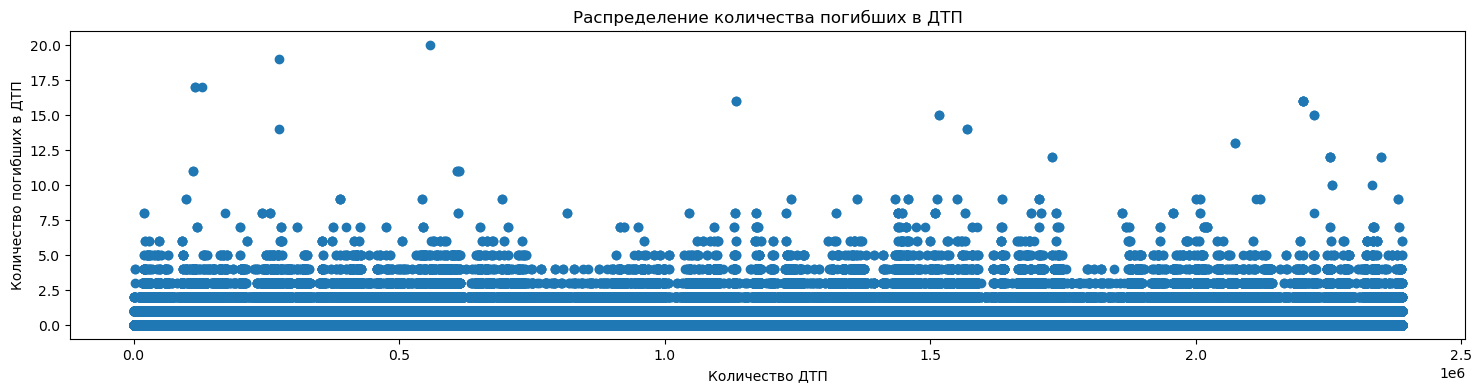

In [158]:
x_values = pd.Series(range(0, len(n_data['dead_count'])))
plt.figure(figsize=(18, 4))
plt.scatter(x_values, n_data['dead_count'])
plt.title('Распределение количества погибших в ДТП',
          fontsize=12)
plt.xlabel('Количество ДТП', fontsize=10)
plt.ylabel('Количество погибших в ДТП', fontsize=10)
plt.show()

In [160]:
n_data['dead_count'].value_counts()

dead_count
0     2168142
1      184682
2       25029
3        6533
4        2226
5         761
6         231
7          97
8          58
9          38
12          8
16          7
11          6
15          4
17          3
14          3
10          3
13          2
20          1
19          1
Name: count, dtype: int64

В основном количество погибших в ДТП варьируется от 0 до 4. В редких случаях, в 1-8 авариях, погибало 10 и более человек.

Выведем уникальные значения из столбца с количеством раненых в ДТП.

In [164]:
n_data['injured_count'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  37,  38,  39,
        40,  41,  42,  43,  44,  47,  57, 106])

Количество пострадавших в ДТП находится в пределах от 0 до 47 человек. Кроме того, в датасете есть случаи с 57 ранеными и аномально большим количеством раненых — 106 человек.

Определим число дорожно-транспортных происшествий с тем или иным количеством раненых. Построим точечный график количества пострадавших в ДТП.

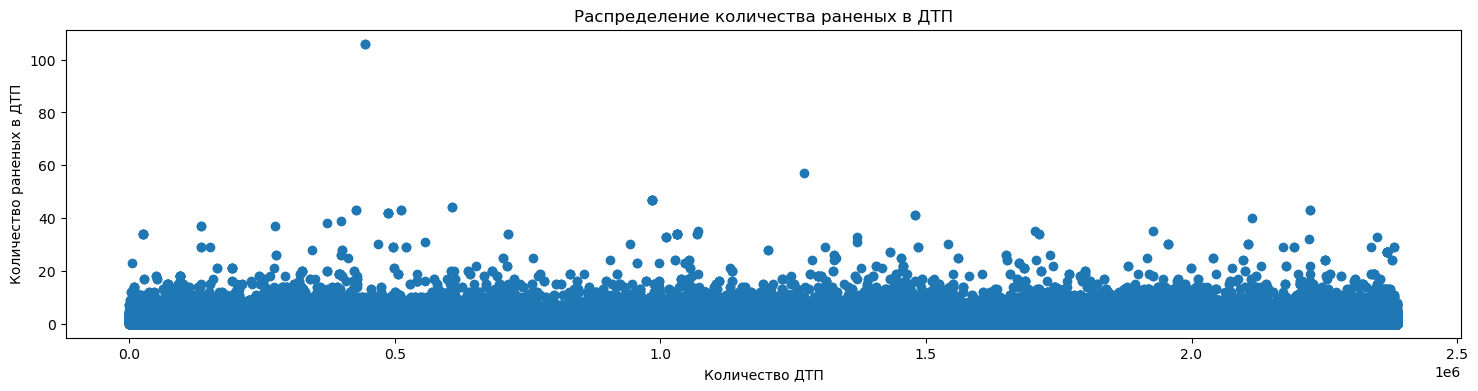

In [168]:
x_values = pd.Series(range(0, len(n_data['injured_count'])))
plt.figure(figsize=(18, 4))
plt.scatter(x_values, n_data['injured_count'])
plt.title('Распределение количества раненых в ДТП',
          fontsize=12)
plt.xlabel('Количество ДТП', fontsize=10)
plt.ylabel('Количество раненых в ДТП', fontsize=10)
plt.show()

In [170]:
n_data['injured_count'].value_counts()

injured_count
1      1680291
2       376318
3       127687
0       120490
4        48427
5        18779
6         7675
7         3345
8         1726
9          908
10         643
11         363
12         278
14         177
13         171
15         112
16          71
17          60
19          52
18          47
20          32
21          22
24          18
29          17
34          17
22          15
25          12
23          10
27          10
26           9
30           9
43           6
28           5
47           5
33           5
42           4
37           3
35           3
41           2
106          2
44           2
31           2
57           1
39           1
38           1
40           1
32           1
Name: count, dtype: int64

В большинстве дорожно-транспортных происшествий пострадало 0-5 человек. В 1 млн. 680 тыс. 291 случае был ранен 1 человек. В 376 тыс. 318 авариях количество раненых составило 2 человека. Встречается ДТП, где было 106 раненых. Выведем строку датафрейма `n_data` с некоторыми столбцами, где значение столбца `'injured_count'` равно 106.

In [173]:
n_data.query('injured_count == 106')[['light',
                             'type_of_accident',
                                     'datetime',
                                     'severity',
                                   'dead_count',
                                'injured_count',
                                'parent_region',
                           'participants_count',
                                        'year']]

,light,type_of_accident,datetime,severity,dead_count,injured_count,parent_region,participants_count,year
443562,Светлое время суток,Столкновение,2024-06-06 07:34:00,Тяжёлый,0,106,Кемеровская область - Кузбасс,168,2012.0
443563,Светлое время суток,Столкновение,2024-06-06 07:34:00,Тяжёлый,0,106,Кемеровская область - Кузбасс,168,2008.0


В Кемеровской области в июне 2024 года в светлое время суток произошло столкновение трамваев (2008 и 2012 годов производства), в результате которого пострадало 106 человек. Так как выбросы могут исказить общую картину и привести к неправильным выводам, исключим из выборки эту аварию.

In [176]:
print('Длина датафрейма до удаления выброса:',
      len(data))
data = data.query('injured_count != 106')
print('Длина датафрейма после удаления выброса:',
      len(data))

Длина датафрейма до удаления выброса: 1502773
Длина датафрейма после удаления выброса: 1502772


После удаления выбросов в датафрейме `data` остался 1 млн. 502 тыс. 772 строки.

In [179]:
print('Длина датафрейма до удаления выброса:',
      len(n_data))
n_data = n_data.query('injured_count != 106')
print('Длина датафрейма после удаления выброса:',
      len(n_data))

Длина датафрейма до удаления выброса: 2387835
Длина датафрейма после удаления выброса: 2387833


После удаления выбросов в датафрейме `n_data` осталось 2 млн. 387 тыс. 833 строки.

Выведем уникальные значения из столбца с количеством участников ДТП.

In [183]:
n_data['participants_count'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 50, 51, 52, 53,
       54, 55, 58, 59])

Количество участников ДТП варьируется от 1 до 59, за исключением крупной аварии с трамваями, где было 168 участников.

Определим число дорожно-транспортных происшествий с тем или иным количеством участников. Построим точечный график количества участников ДТП.

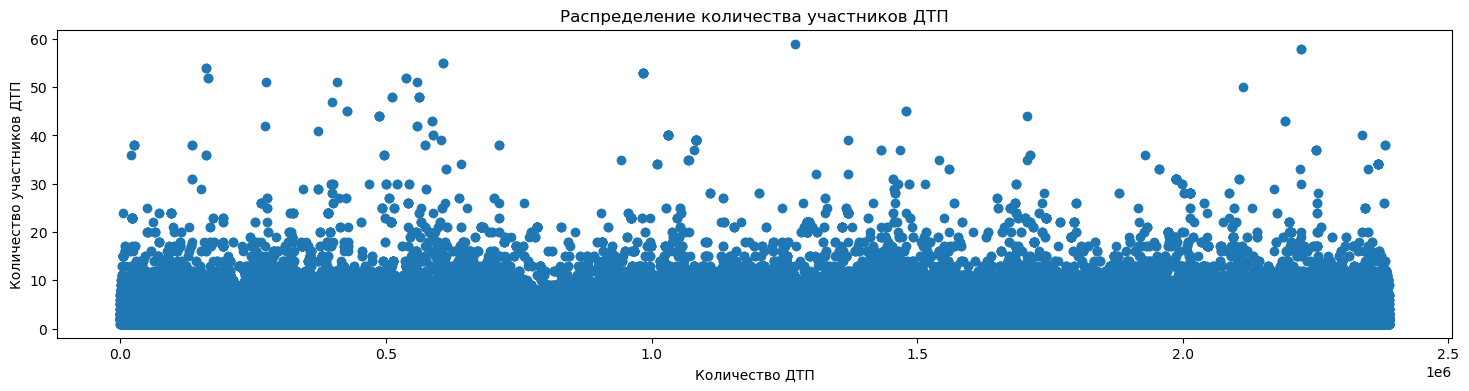

In [189]:
x_values = pd.Series(range(0, len(n_data['participants_count'])))
plt.figure(figsize=(18, 4))
plt.scatter(x_values, n_data['participants_count'])
plt.title('Распределение количества участников ДТП',
          fontsize=12)
plt.xlabel('Количество ДТП', fontsize=10)
plt.ylabel('Количество участников ДТП', fontsize=10)
plt.show()

In [191]:
n_data['participants_count'].value_counts()

participants_count
2     1169472
3      621906
4      259358
1      141109
5      107819
6       45742
7       20036
8        9367
9        4663
10       2665
11       1507
12        992
13        750
14        516
15        342
16        270
17        233
18        179
20        128
19        111
21         97
22         88
23         81
24         75
25         38
28         34
26         33
31         32
39         28
30         22
27         18
38         12
34         12
40         10
29         10
33          9
36          9
37          8
48          6
35          6
53          5
44          5
45          4
43          4
52          4
42          3
51          3
55          2
32          2
58          2
54          2
59          1
47          1
50          1
41          1
Name: count, dtype: int64

В большинстве дорожно-транспортных происшествий участвуют от 1 до 7 человек. Чаще всего в ДТП фигурируют 2 участника — 1 млн. 169 тыс. 472 случая.

Выведем уникальные значения из столбца с годами производства транспортных средств.

In [195]:
n_data['year'].sort_values().unique()

array([1, 1900.0, 1901.0, 1907.0, 1909.0, 1910, 1911.0, 1918.0, 1919.0,
       1920, 1923.0, 1928.0, 1934, 1936, 1937.0, 1941.0, 1942, 1946,
       1948.0, 1949, 1950.0, 1951.0, 1952.0, 1953.0, 1954, 1955.0, 1956,
       1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963, 1964.0,
       1965.0, 1966, 1967.0, 1968.0, 1969.0, 1970.0, 1971, 1972, 1973.0,
       1974, 1975.0, 1976, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982,
       1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0,
       1991.0, 1992.0, 1993.0, 1994, 1995.0, 1996.0, 1997, 1998.0, 1999.0,
       2000, 2001, 2002.0, 2003.0, 2004.0, 2005.0, 2006, 2007.0, 2008.0,
       2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015, 2016.0, 2017,
       2018, 2019.0, 2020.0, 2021, 2022, 2023, 2024, nan, None],
      dtype=object)

Самый ранний год производства транспортного средства — 1900, а самый поздний — 2024. Встречается аномальное значение — 1. Выведем строки датафрейма, где год производства транспортного средства равен 1.

In [198]:
n_data.query('year == 1')

,id,light,point,region,scheme,address,type_of_accident,datetime,severity,dead_count,...,parent_region,participants_count,geometry,nearby,year,brand,color,model,category,participants_inside_vehicles
12441,2317114,Светлое время суток,"{ ""lat"": 53.205278, ""long"": 83.469443999999996 }",Барнаул,500,"г Барнаул, пр-кт Ленина, 39",Наезд на велосипедиста,2015-08-21 17:45:00,Легкий,0,...,Алтайский край,2,POINT (83.46944 53.20528),NaN,1.0,None,Синий,None,Велосипеды,"[{'role': 'Велосипедист', 'gender': 'Мужской', 'violations': ['Пересечение велосипедистом проезжей части по пешеходному переходу'], 'health_status': 'Раненый, находящийся (находившийся) на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)', 'years_of_driving_experience': None}]"
20699,2320291,Светлое время суток,"{ ""lat"": 52.0, ""long"": 78.0 }",Славгородский район,190,"г Славгород, ул Ленина, 73",Наезд на велосипедиста,2015-09-05 10:20:00,Тяжёлый,0,...,Алтайский край,2,POINT (78 52),NaN,1.0,Прочие марки ТС,Красный,Прочие марки и модели ТС,Велосипеды,"[{'role': 'Велосипедист', 'gender': 'Мужской', 'violations': ['Несоблюдение очередности проезда'], 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении', 'years_of_driving_experience': None}]"
21074,2320298,"В темное время суток, освещение отсутствует","{ ""lat"": 52.919167000000002, ""long"": 78.571944000000002 }",Славгородский район,070,None,Наезд на велосипедиста,2015-09-01 01:10:00,Тяжёлый,0,...,Алтайский край,2,POINT (78.57194 52.91917),NaN,1.0,None,Черный,None,Велосипеды,"[{'role': 'Велосипедист', 'gender': 'Мужской', 'violations': [], 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении', 'years_of_driving_experience': None}]"
33401,2317068,"В темное время суток, освещение отсутствует","{ ""lat"": 51.302778000000004, ""long"": 81.135833000000005 }",Рубцовск,200,"г Рубцовск, Змеиногорск - Рубцовск - Волчиха - Михайловское - Кулунда - Бурла - граница Новосибирской области, 85 км",Наезд на велосипедиста,2015-08-18 22:40:00,Легкий,0,...,Алтайский край,2,POINT (81.13583 51.30278),NaN,1.0,None,Синий,None,Велосипеды,"[{'role': 'Велосипедист', 'gender': 'Женский', 'violations': ['Выезд на полосу встречного движения', 'Управление ТС в состоянии алкогольного опьянения'], 'health_status': 'Раненый, находящийся (находившийся) на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)', 'years_of_driving_experience': None}]"
43167,2063293,Светлое время суток,"{ ""lat"": 51.085555999999997, ""long"": 128.37555599999999 }",Серышевский район,None,"пгт Серышево, пер Западный, 10",Наезд на велосипедиста,2015-07-23 17:45:00,Легкий,0,...,Амурская область,2,POINT (128.37556 51.08556),[ ],1.0,None,Оранжевый,None,Велосипеды,"[{'role': 'Велосипедист', 'gender': 'Мужской', 'violations': ['Другие нарушения ПДД водителем'], 'health_status': 'Раненый, находящийся (находившийся) на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)', 'years_of_driving_experience': None}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361301,1868344,Светлое время суток,"{ ""lat"": 56.738889, ""long"": 38.855832999999997 }",Переславль-Зелесский,500,"г Переславль-Залесский, ул Свободы, 1",Наезд на велосипедиста,2015-07-28 16:00:00,Тяжёлый,0,...,Ярославская область,2,POINT (38.85583 56.73889),NaN,1,None,Не заполнено,None,Велосипеды,"[{'role': 'Велосипедист', 'gender': 'Мужской', 'violations': ['Пересечение велосипедистом проезжей части по пешеходному переходу'], 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении', 'years_of_driving_experience': None}]"
2377873,1868547,Светлое время суток,"{ ""lat"": 57.0, ""long"": 39.0 }

Транспортными средствами, у которых год производства равен 1, являются велосипеды. Скорее всего, годы производства велосипедов не были установлены, поэтому им было присвоено такое значение.

### Изменение типа данных

Определим тип данных в столбце с годом производства транспортного средства.

In [203]:
n_data['year'].dtypes

dtype('O')

Столбец `'year'` содержит данные с типом object.

Для лучшей интерпретации преобразуем данные в целочисленный тип в столбце `'year'`, предварительно заполнив единицами пропущенные значения.

In [207]:
n_data['year'] = n_data['year'].fillna(1)
n_data['year'] = n_data['year'].astype('int64')
n_data['year'].dtypes

dtype('int64')

Столбец `'year'` датафрейма `n_data` теперь содержит целые числа.

Выведем информацию о датафрейме `n_data`.

In [211]:
n_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2387833 entries, 0 to 2387834
Data columns (total 22 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   id                             int32         
 1   light                          object        
 2   point                          object        
 3   region                         object        
 4   scheme                         object        
 5   address                        object        
 6   type_of_accident               object        
 7   datetime                       datetime64[ms]
 8   severity                       object        
 9   dead_count                     int32         
 10  participants_without_vehicles  object        
 11  injured_count                  int32         
 12  parent_region                  object        
 13  participants_count             int32         
 14  geometry                       geometry      
 15  nearby      

В датафрейме `n_data` 2 млн. 387 тыс. 833 строки и 22 столбца. 15 столбцов содержат данные с типом object (`'light'`, `'point'`, `'region'`, `'scheme'`, `'address'`, `'type_of_accident'`, `'severity'`, `'participants_without_vehicles'`, `'parent_region'`, `'nearby'`, `'brand'`, `'color'`, `'model'`, `'category'`, `'participants_inside_vehicles'`), 5 столбцов — целые числа (`'id'`, `'dead_count'`, `'injured_count'`, `'participants_count'`, `'year'`), 1 столбец — даты и время (`'datetime'`) и 1 столбец — данные с типом geometry (`'geometry'`).

### Вывод

Мы спарсили с сайта данные о дорожно-транспортных происшествиях в регионах России. Считали файлы в формате geojson и сохранили в датафрейм. Вывели первые строки набора данных.

Изучили общую информацию о датафрейме. Установили, что существуют пропуски в столбцах датафрейма со схемами и адресами ДТП, геометрическими объектами (точками) и объектами, расположенными рядом с ДТП. Пропущенные значения не удаляли, чтобы избежать потери значимых данных.

Создали датафрейм на основе данных из столбца с транспортными средствами, участвующими в ДТП, и объединили его с основным датафреймом.

Изменили названия столбцов с категориями и участниками.

Обнаружили 885 тыс. 617 дубликатов по дате со временем и координатам ДТП. Это могут быть одинаковые аварии, но с разными участниками, или разные аварии с похожими координатами.

Проанализировали выбросы. В данных встретилось и было удалено аномальное значение — 106 раненых в ДТП.

Данные в столбце с годом производства транспортного средства преобразовали в целочисленный тип.

## Исследовательский анализ данных

### Изучение распределений по признакам

Определим наиболее раннюю и позднюю даты ДТП.

In [219]:
print('Самая ранняя дата ДТП:',
      n_data['datetime'].min())
print('Самая поздняя дата ДТП:',
      n_data['datetime'].max())

Самая ранняя дата ДТП: 2015-01-01 00:01:00
Самая поздняя дата ДТП: 2024-09-30 23:47:00


Самое раннее дорожно-транспортное происшествие, представленное в данных, произошло 1 января 2015 года, а самое позднее — 30 сентября 2024 года.

Добавим в датафреймы `data` и `n_data` столбец с годами, в которые происходили дорожно-транспортные происшествия.

In [259]:
data['year_of_accident'] = data['datetime'].dt.year
data['year_of_accident'].head()

0    2023
1    2015
2    2024
3    2024
4    2024
Name: year_of_accident, dtype: int32

In [223]:
n_data['year_of_accident'] = n_data['datetime'].dt.year
n_data['year_of_accident'].head()

0    2023
1    2015
2    2024
3    2024
4    2024
Name: year_of_accident, dtype: int32

Определим, сколько ДТП происходило в разные годы.

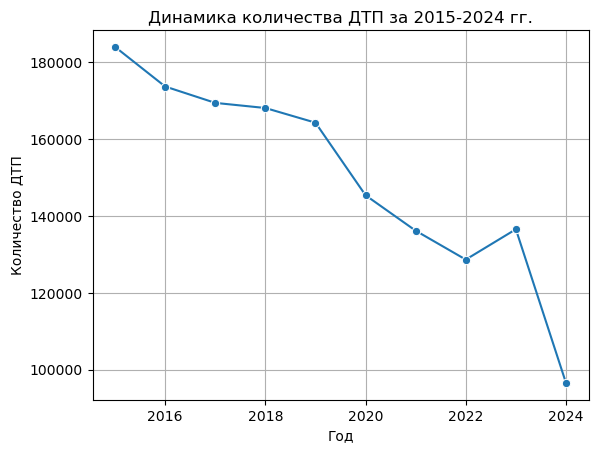

,year_of_accident,number_of_accidents,share_of_accidents
0,2015,184000,12.2%
1,2016,173694,11.6%
2,2017,169432,11.3%
3,2018,168099,11.2%
4,2019,164280,10.9%
5,2020,145381,9.7%
6,2021,136160,9.1%
7,2022,128645,8.6%
8,2023,136541,9.1%
9,2024,96540,6.4%


In [230]:
number_of_accidents_by_year = n_data.pivot_table(
index='year_of_accident', values='id', aggfunc='nunique')
number_of_accidents_by_year.columns = ['number_of_accidents']
sns.lineplot(data=number_of_accidents_by_year,
             marker='o', legend=False).grid(10)
plt.title('Динамика количества ДТП за 2015-2024 гг.',
          fontsize=12)
plt.xlabel('Год', fontsize=10)
plt.ylabel('Количество ДТП', fontsize=10)
plt.show()

number_of_accidents_by_year = \
number_of_accidents_by_year.reset_index()
number_of_accidents_by_year[
'share_of_accidents'] = \
number_of_accidents_by_year[
'number_of_accidents'] / n_data[
'id'].nunique()
number_of_accidents_by_year = \
number_of_accidents_by_year.style.format(
{'share_of_accidents': "{:.1%}"})
number_of_accidents_by_year

В период с 2015 по 2022 год количество дорожно-транспортных происшествий в России уменьшилось со 184 тыс. (12.2% от общего числа ДТП) до 128 тыс. 645 (8.6%). Значительное снижение количества ДТП с 2019 по 2022 годы обусловлено пандемией COVID-19, когда люди реже покидали свои дома и пользовались транспортом. В 2023 году число ДТП увеличилось до 136 тыс. 541 (9.1%). Данные за 2024 год неполные — до июня или сентября в зависимости от региона, поэтому за этот период зафиксировано всех меньше аварий — 96 тыс. 540 (6.4%).

Проанализируем количество погибших в дорожно-транспортных происшествиях с 2015 по 2024 год.

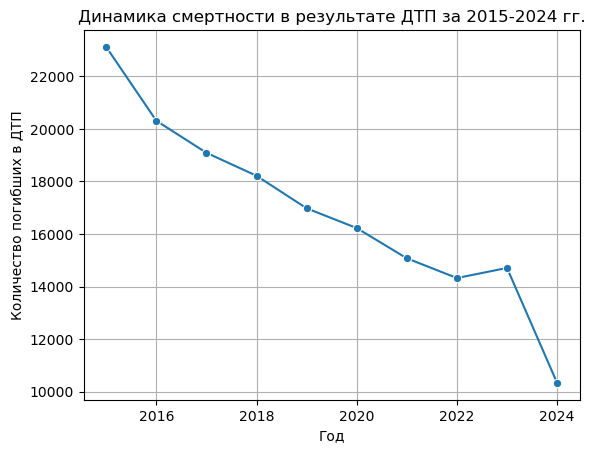

,year_of_accident,number_of_deaths,share_of_deaths
0,2015,23114,13.7%
1,2016,20308,12.1%
2,2017,19088,11.3%
3,2018,18214,10.8%
4,2019,16977,10.1%
5,2020,16225,9.6%
6,2021,15075,9.0%
7,2022,14324,8.5%
8,2023,14708,8.7%
9,2024,10335,6.1%


In [262]:
number_of_deaths_by_year = data.pivot_table(
index='year_of_accident', values='dead_count', aggfunc='sum')
number_of_deaths_by_year.columns = ['number_of_deaths']
sns.lineplot(data=number_of_deaths_by_year,
             marker='o', legend=False).grid(10)
plt.title('Динамика смертности в результате ДТП за 2015-2024 гг.',
          fontsize=12)
plt.xlabel('Год', fontsize=10)
plt.ylabel('Количество погибших в ДТП', fontsize=10)
plt.show()

number_of_deaths_by_year = \
number_of_deaths_by_year.reset_index()
number_of_deaths_by_year[
'share_of_deaths'] = \
number_of_deaths_by_year[
'number_of_deaths'] / sum(data[
'dead_count'])
number_of_deaths_by_year = \
number_of_deaths_by_year.style.format(
{'share_of_deaths': "{:.1%}"})
number_of_deaths_by_year

Количество погибших в дорожно-транспортных происшествиях постепенно снижалось с каждым годом. В 2015 году погибло 23 тыс. 114 человек (13.7% от общего числа погибших за весь рассматриваемый период), в 2022 году — 14 тыс. 324 человека (8.5%). После снятия ограничений в РФ, введённых из-за коронавируса, в 2023 году число погибших немного возросло — до 14 тыс. 708 человек (8.7%).

Исследуем изменение количества раненых в дорожно-транспортных происшествиях за период с 2015 по 2024 годы.

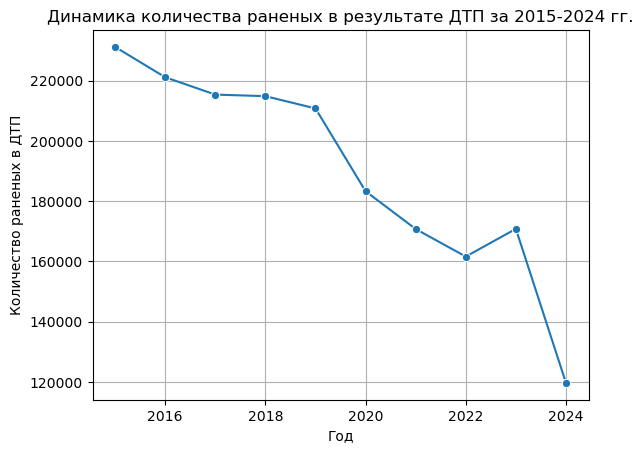

,year_of_accident,number_of_injured,share_of_injured
0,2015,231197,12.2%
1,2016,221140,11.6%
2,2017,215374,11.3%
3,2018,214853,11.3%
4,2019,210785,11.1%
5,2020,183297,9.6%
6,2021,170761,9.0%
7,2022,161616,8.5%
8,2023,170804,9.0%
9,2024,119679,6.3%


In [264]:
number_of_injured_by_year = data.pivot_table(
index='year_of_accident', values='injured_count', aggfunc='sum')
number_of_injured_by_year.columns = ['number_of_injured']
sns.lineplot(data=number_of_injured_by_year,
             marker='o', legend=False).grid(10)
plt.title('Динамика количества раненых в результате ДТП за 2015-2024 гг.',
          fontsize=12)
plt.xlabel('Год', fontsize=10)
plt.ylabel('Количество раненых в ДТП', fontsize=10)
plt.show()

number_of_injured_by_year = \
number_of_injured_by_year.reset_index()
number_of_injured_by_year[
'share_of_injured'] = \
number_of_injured_by_year[
'number_of_injured'] / sum(data[
'injured_count'])
number_of_injured_by_year = \
number_of_injured_by_year.style.format(
{'share_of_injured': "{:.1%}"})
number_of_injured_by_year

Как и число ДТП, число раненых в ДТП резко снизилось с 2019 года по 2022 год из-за пандемии коронавируса с 210 тыс. 785 (11.1%) до 161 тыс. 616 (8.5%).

Изучим динамику количества участников дорожно-транспортных происшествий за 2015-2024 гг.

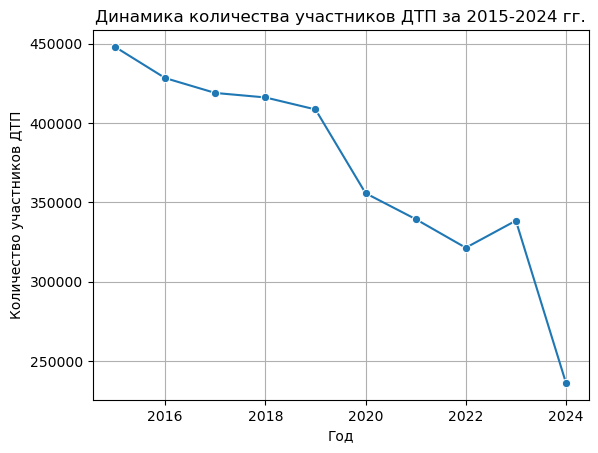

,year_of_accident,number_of_participants,share_of_participants
0,2015,448013,12.1%
1,2016,428366,11.5%
2,2017,418972,11.3%
3,2018,416143,11.2%
4,2019,408575,11.0%
5,2020,355716,9.6%
6,2021,339383,9.1%
7,2022,321326,8.7%
8,2023,338411,9.1%
9,2024,236052,6.4%


In [266]:
number_of_participants_by_year = data.pivot_table(
index='year_of_accident', values='participants_count', aggfunc='sum')
number_of_participants_by_year.columns = ['number_of_participants']
sns.lineplot(data=number_of_participants_by_year,
             marker='o', legend=False).grid(10)
plt.title('Динамика количества участников ДТП за 2015-2024 гг.',
          fontsize=12)
plt.xlabel('Год', fontsize=10)
plt.ylabel('Количество участников ДТП', fontsize=10)
plt.show()

number_of_participants_by_year = \
number_of_participants_by_year.reset_index()
number_of_participants_by_year[
'share_of_participants'] = \
number_of_participants_by_year[
'number_of_participants'] / sum(data[
'participants_count'])
number_of_participants_by_year = \
number_of_participants_by_year.style.format(
{'share_of_participants': "{:.1%}"})
number_of_participants_by_year

Графики динамики количества участников ДТП и раненых в ДТП за 2015-2024 гг. схожи.

Посмотрим на изменение числа дорожно-транспортных происшествий по месяцам в разные годы.

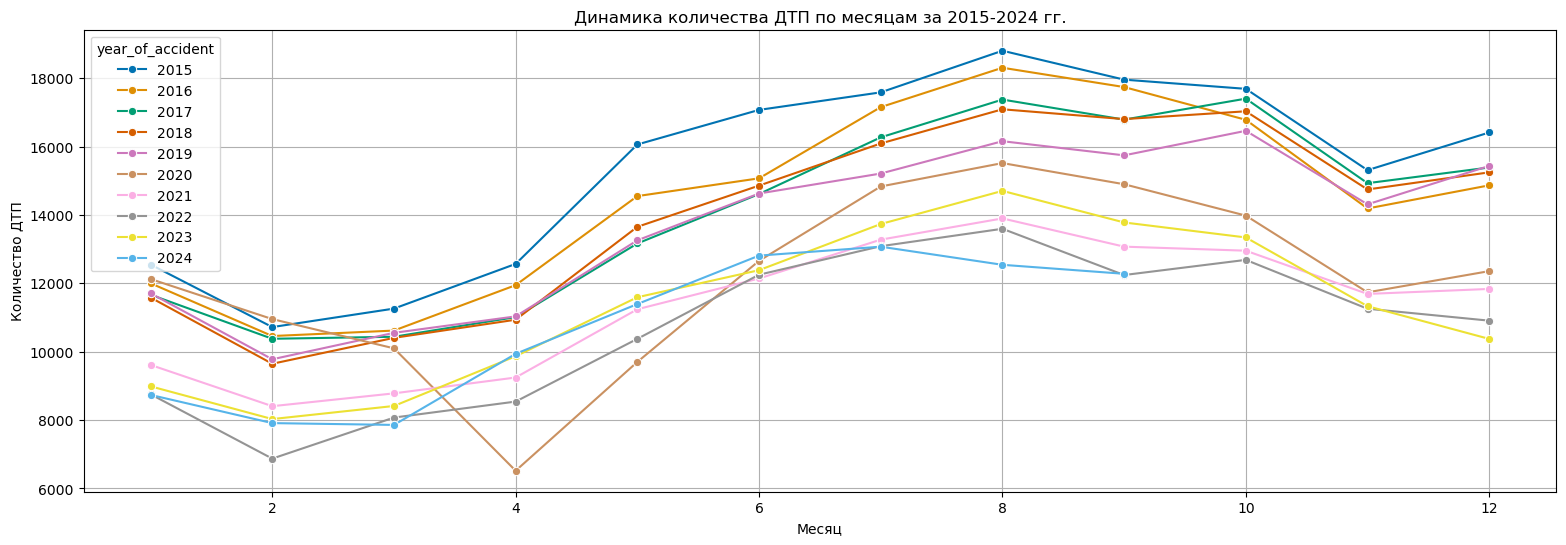

In [245]:
number_of_accidents_by_month = n_data.pivot_table(
index=['year_of_accident', n_data['datetime'].dt.month],
values='id', aggfunc='nunique').reset_index()
number_of_accidents_by_month.columns = ['year_of_accident',
'month_of_accident', 'number_of_accidents']
plt.figure(figsize=(19, 6))
sns.lineplot(data=number_of_accidents_by_month,
x='month_of_accident',
y='number_of_accidents',
hue='year_of_accident',
marker='o', legend=True,
palette='colorblind').grid(12)
plt.title('Динамика количества ДТП \
по месяцам за 2015-2024 гг.',
          fontsize=12)
plt.xlabel('Месяц', fontsize=10)
plt.ylabel('Количество ДТП', fontsize=10)
plt.show()

С июня по август происходит больше всего дорожно-транспортных происшествий.

Летом количество ДТП увеличивается из-за следующих факторов:

- Увеличение светового дня, что приводит к более активному движению на дорогах.
- Возрастание количества автомобилей на дорогах из-за отдыха на природе и путешествий.
- В летний период средняя скорость на дорогах увеличивается, что приводит к росту числа ДТП.
- Летом на дорогах становится больше водителей с меньшим опытом, которые не садились за руль зимой.
- Смена стиля вождения на дачах и в сельской местности.
- Дачный сезон, когда многие отправляются на свои участки и возвращаются с загруженными автомобилями.
- Дети на каникулах, которые часто катаются на велосипедах и самокатах на дорогах.
- Жара и духота, которые могут вызывать усталость у водителей.

Построим линейный график, отображающий изменение количества участников ДТП в разные месяцы отдельно для каждого года.

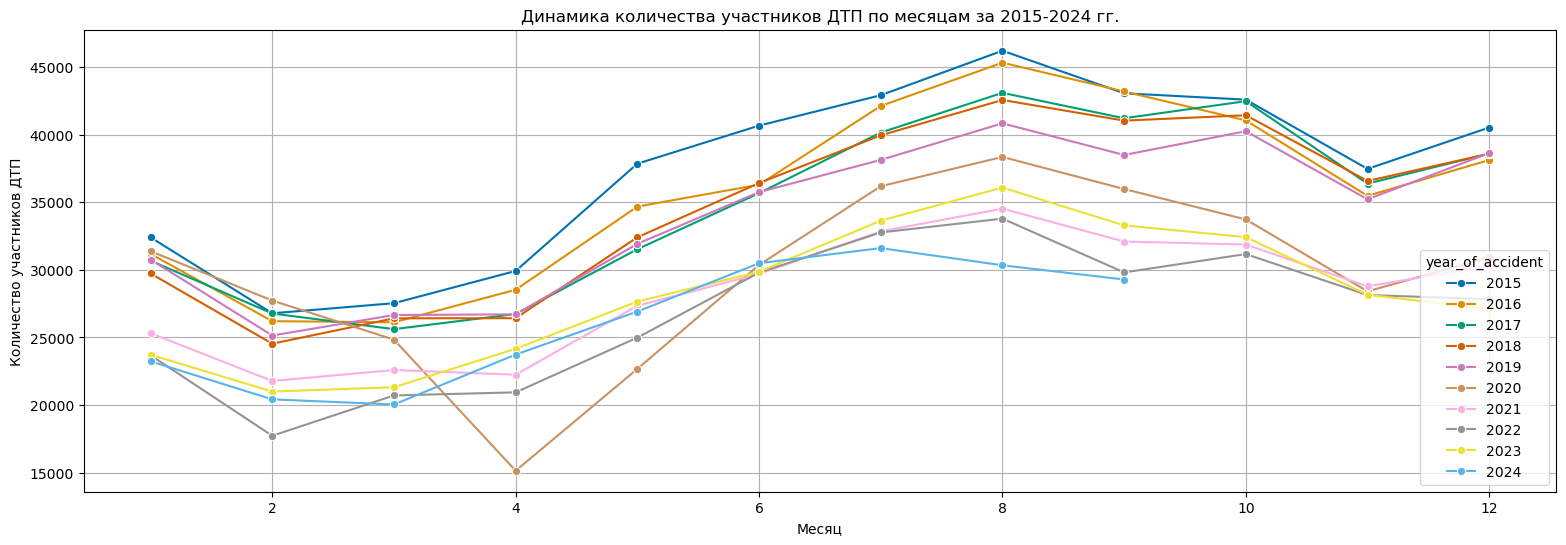

In [268]:
number_of_participants_by_month = data.pivot_table(
index=['year_of_accident', data['datetime'].dt.month],
values='participants_count', aggfunc='sum').reset_index()
number_of_participants_by_month.columns = ['year_of_accident',
'month_of_accident', 'number_of_participants']
plt.figure(figsize=(19, 6))
sns.lineplot(data=number_of_participants_by_month,
x='month_of_accident',
y='number_of_participants',
hue='year_of_accident',
marker='o', legend=True,
palette='colorblind').grid(12)
plt.title('Динамика количества участников ДТП \
по месяцам за 2015-2024 гг.',
          fontsize=12)
plt.xlabel('Месяц', fontsize=10)
plt.ylabel('Количество участников ДТП',
fontsize=10)
plt.show()

Во все годы наибольшее количество участников дорожно-транспортных происшествий приходится на летние месяцы.

Создадим функцию, которая будет назначать категорию в зависимости от наличия погибших в ДТП:

- 0 человек — `'нет погибших'`;
- 1 человек и более — `'есть погибшие'`.

In [270]:
def categorize_dead_count(
    dead_count):
    try:
        if dead_count == 0:
            return 'нет погибших'
        else:
            return 'есть погибшие'
    except:
        pass

На основании данных из столбца `'dead_count'` и выделенных диапазонов сформируем новый столбец `'dead_count_category'` с категориями.

In [272]:
data['dead_count_category'] = data[
'dead_count'].apply(categorize_dead_count)
data['dead_count_category'].head()

0    нет погибших
1    нет погибших
2    нет погибших
3    нет погибших
4    нет погибших
Name: dead_count_category, dtype: object

In [276]:
n_data['dead_count_category'] = n_data[
'dead_count'].apply(categorize_dead_count)
n_data['dead_count_category'].head()

0    нет погибших
1    нет погибших
2    нет погибших
3    нет погибших
4    нет погибших
Name: dead_count_category, dtype: object

Создадим функцию, которая будет назначать категорию в зависимости от наличия раненых в ДТП:

- 0 человек — `'нет раненых'`;
- 1 человек и более — `'есть раненые'`.

In [279]:
def categorize_injured_count(
    injured_count):
    try:
        if injured_count == 0:
            return 'нет раненых'
        else:
            return 'есть раненые'
    except:
        pass

На основании данных из столбца `'injured_count'` и выделенных диапазонов сформируем новый столбец `'injured_count_category'` с категориями.

In [281]:
data['injured_count_category'] = data[
'injured_count'].apply(categorize_injured_count)
data['injured_count_category'].head()

0    есть раненые
1    есть раненые
2    есть раненые
3    есть раненые
4    есть раненые
Name: injured_count_category, dtype: object

In [285]:
n_data['injured_count_category'] = n_data[
'injured_count'].apply(categorize_injured_count)
n_data['injured_count_category'].head()

0    есть раненые
1    есть раненые
2    есть раненые
3    есть раненые
4    есть раненые
Name: injured_count_category, dtype: object

Создадим функцию, которая будет назначать категорию в зависимости от количества участников ДТП:

- 1 участник — `'один участник'`;
- 2 участника и более — `'несколько участников'`.

In [288]:
def categorize_participants_count(
    participants_count):
    try:
        if participants_count == 1:
            return 'один участник'
        else:
            return 'несколько участников'
    except:
        pass

На основании данных из столбца `'participants_count'` и выделенных диапазонов сформируем новый столбец `'participants_count_category'` с категориями.

In [290]:
data['participants_count_category'] = data[
'participants_count'].apply(categorize_participants_count)
data['participants_count_category'].head()

0    несколько участников
1    несколько участников
2    несколько участников
3    несколько участников
4    несколько участников
Name: participants_count_category, dtype: object

In [292]:
n_data['participants_count_category'] = n_data[
'participants_count'].apply(categorize_participants_count)
n_data['participants_count_category'].head()

0    несколько участников
1    несколько участников
2    несколько участников
3    несколько участников
4    несколько участников
Name: participants_count_category, dtype: object

Посмотрим, как меняется количество ДТП в зависимости от региона.

Построим столбчатую диаграмму, показывающую количество ДТП в пяти регионах с наибольшим числом ДТП.

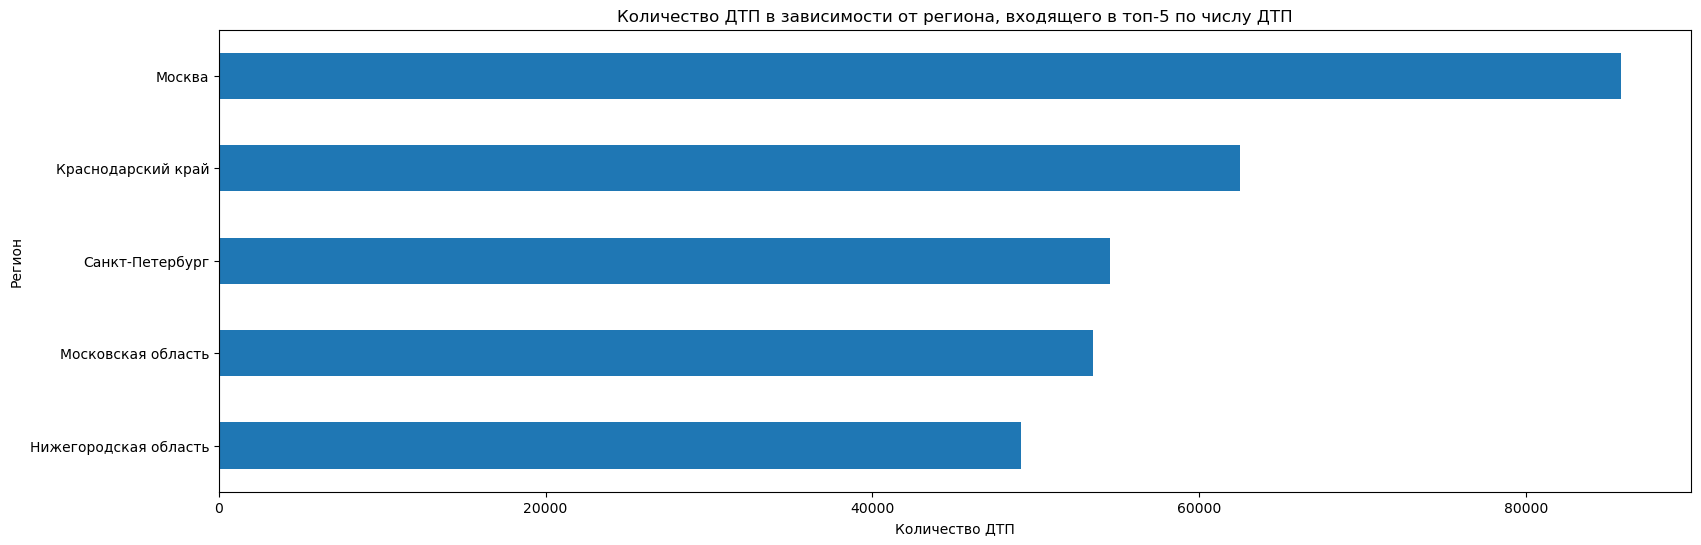

In [294]:
number_of_accidents_by_region = data[
'parent_region'].value_counts()
number_of_accidents_by_region.head().sort_values(
).plot(x='count', y='parent_region', kind='barh',
figsize=(19, 6), legend=False)
plt.title('Количество ДТП в зависимости от региона, \
входящего в топ-5 по числу ДТП',
          fontsize=12)
plt.xlabel('Количество ДТП', fontsize=10)
plt.ylabel('Регион', fontsize=10)
plt.show()

number_of_accidents_by_region = \
number_of_accidents_by_region.reset_index()
number_of_accidents_by_region['share'] = \
number_of_accidents_by_region['count'] / len(data[
'parent_region'])
number_of_accidents_by_region.columns = [
'region',
'number_of_accidents',
'share_of_accidents']
number_of_accidents_by_region = \
number_of_accidents_by_region.style.format(
{'share_of_accidents': "{:.1%}"})

In [296]:
number_of_accidents_by_region

,region,number_of_accidents,share_of_accidents
0,Москва,85851,5.7%
1,Краснодарский край,62500,4.2%
2,Санкт-Петербург,54550,3.6%
3,Московская область,53539,3.6%
4,Нижегородская область,49109,3.3%
5,Республика Татарстан (Татарстан),41133,2.7%
6,Республика Башкортостан,39396,2.6%
7,Челябинская область,38133,2.5%
8,Красноярский край,33944,2.3%
9,Ростовская область,33834,2.3%


Всех больше дорожно-транспортных происшествий произошло в Москве — 85 тыс. 851, что составляет 5.7% от общего числа ДТП в России. Также в топ-5 регионов по количеству ДТП входят Краснодарский край (62 тыс. 500 происшествий — 4.2%), Санкт-Петербург (54 тыс. 550 происшествий — 3.6%), Московская область (53 тыс. 539 происшествий — 3.6%) и Нижегородская область (49 тыс. 109 происшествий — 3.3%).

Причины, по которым данные регионы лидируют по количеству ДТП, могут быть связаны с большим числом жителей, высокой плотностью населения и интенсивностью движения на дорогах.

К 5 регионам с наименьшим числом ДТП относятся Магаданская область (2 тыс. 284 происшествий — 0.2%), Еврейская автономная область	(2 тыс. 171 происшествий — 0.1%), Республика Ингушетия (1 тыс. 963 происшествий — 0.1%), Ненецкий автономный округ (299 происшествий — 0.02%) и Чукотский автономный округ (230 происшествий — 0.02%).

В этих субъектах РФ происходит мало ДТП, потому что там проживает небольшое количество населения и транспортные потоки медленнее, что делает дороги более безопасными.

Создадим функцию, которая будет назначать определённый федеральный округ в зависимости от региона.

In [300]:
def categorize_parent_region(
    parent_region):
    try:
        if parent_region == 'Белгородская область' or \
           parent_region == 'Брянская область' or \
           parent_region == 'Владимирская область' or \
           parent_region == 'Воронежская область' or \
           parent_region == 'Ивановская область' or \
           parent_region == 'Калужская область' or \
           parent_region == 'Костромская область' or \
           parent_region == 'Курская область' or \
           parent_region == 'Липецкая область' or \
           parent_region == 'Московская область' or \
           parent_region == 'Орловская область' or \
           parent_region == 'Рязанская область' or \
           parent_region == 'Смоленская область' or \
           parent_region == 'Тамбовская область' or \
           parent_region == 'Тверская область' or \
           parent_region == 'Тульская область' or \
           parent_region == 'Ярославская область' or \
           parent_region == 'Москва':
            return 'ЦФО'
        elif parent_region == 'Республика Башкортостан' or \
           parent_region == 'Республика Марий Эл' or \
           parent_region == 'Республика Мордовия' or \
           parent_region == 'Республика Татарстан (Татарстан)' or \
           parent_region == 'Удмуртская Республика' or \
           parent_region == 'Чувашская Республика - Чувашия' or \
           parent_region == 'Пермский край' or \
           parent_region == 'Кировская область' or \
           parent_region == 'Нижегородская область' or \
           parent_region == 'Оренбургская область' or \
           parent_region == 'Пензенская область' or \
           parent_region == 'Самарская область' or \
           parent_region == 'Саратовская область' or \
           parent_region == 'Ульяновская область':
            return 'ПФО'
        elif parent_region == 'Республика Карелия' or \
           parent_region == 'Республика Коми' or \
           parent_region == 'Архангельская область' or \
           parent_region == 'Вологодская область' or \
           parent_region == 'Калининградская область' or \
           parent_region == 'Ленинградская область' or \
           parent_region == 'Мурманская область' or \
           parent_region == 'Новгородская область' or \
           parent_region == 'Псковская область' or \
           parent_region == 'Санкт-Петербург' or \
           parent_region == 'Ненецкий автономный округ':
            return 'СЗФО'
        elif parent_region == 'Курганская область' or \
           parent_region == 'Свердловская область' or \
           parent_region == 'Тюменская область' or \
           parent_region == 'Челябинская область' or \
           parent_region == 'Ханты-Мансийский автономный округ - Югра' or \
           parent_region == 'Ямало-Ненецкий автономный округ':
            return 'УФО'
        elif parent_region == 'Республика Адыгея (Адыгея)' or \
           parent_region == 'Республика Калмыкия' or \
           parent_region == 'Республика Крым' or \
           parent_region == 'Краснодарский край' or \
           parent_region == 'Астраханская область' or \
           parent_region == 'Волгоградская область' or \
           parent_region == 'Ростовская область' or \
           parent_region == 'Севастополь':
            return 'ЮФО'
        elif parent_region == 'Республика Алтай' or \
           parent_region == 'Республика Тыва' or \
           parent_region == 'Республика Хакасия' or \
           parent_region == 'Алтайский край' or \
           parent_region == 'Красноярский край' or \
           parent_region == 'Иркутская область' or \
           parent_region == 'Кемеровская область - Кузбасс' or \
           parent_region == 'Новосибирская область' or \
           parent_region == 'Омская область' or \
           parent_region == 'Томская область':
            return 'СФО'
        elif parent_region == 'Республика Дагестан' or \
           parent_region == 'Республика Ингушетия' or \
           parent_region == 'Кабардино-Балкарская Республика' or \
           parent_region == 'Карачаево-Черкесская Республика' or \
           parent_region == 'Республика Северная Осетия-Алания' or \
           parent_region == 'Чеченская Республика' or \
           parent_region == 'Ставропольский край':
            return 'СКФО'
        elif parent_region == 'Республика Бурятия' or \
           parent_region == 'Республика Саха (Якутия)' or \
           parent_region == 'Забайкальский край' or \
           parent_region == 'Камчатский край' or \
           parent_region == 'Приморский край' or \
           parent_region == 'Хабаровский край' or \
           parent_region == 'Амурская область' or \
           parent_region == 'Магаданская область' or \
           parent_region == 'Сахалинская область' or \
           parent_region == 'Еврейская автономная область' or \
           parent_region == 'Чукотский автономный округ':
            return 'ДФО'
    except:
        pass

На основании данных из столбца `'parent_region'` сформируем новый столбец `'federal_districts'` с федеральными округами.

In [302]:
data['federal_district'] = data[
'parent_region'].apply(categorize_parent_region)
data['federal_district'].head()

0    СФО
1    СФО
2    СФО
3    СФО
4    СФО
Name: federal_district, dtype: object

In [304]:
n_data['federal_district'] = n_data[
'parent_region'].apply(categorize_parent_region)
n_data['federal_district'].head()

0    СФО
1    СФО
2    СФО
3    СФО
4    СФО
Name: federal_district, dtype: object

Построим столбчатую диаграмму, показывающую количество ДТП в зависимости от федерального округа России.

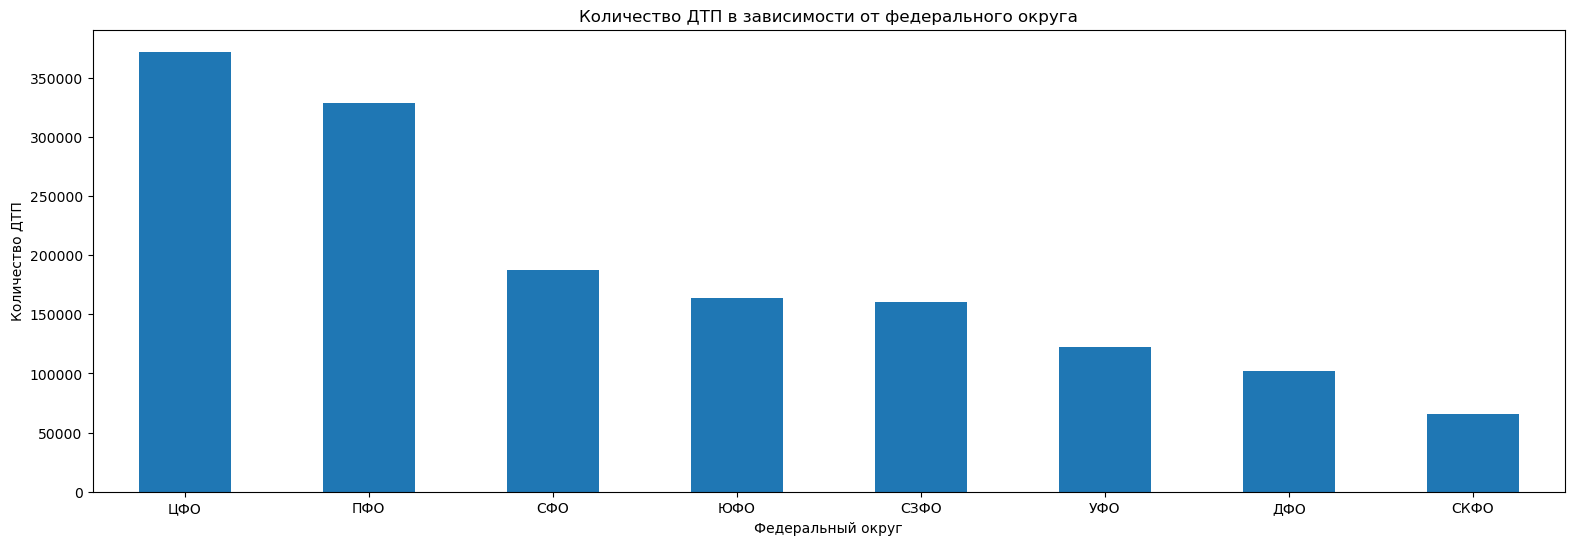

,federal_district,number_of_accidents,share_of_accidents
0,ЦФО,371988,24.8%
1,ПФО,328600,21.9%
2,СФО,187446,12.5%
3,ЮФО,163978,10.9%
4,СЗФО,160183,10.7%
5,УФО,122106,8.1%
6,ДФО,102446,6.8%
7,СКФО,66025,4.4%


In [306]:
number_of_accidents_by_district = data[
'federal_district'].value_counts()
number_of_accidents_by_district.sort_values(
ascending=False).plot(x='federal_district', y='count', kind='bar',
figsize=(19, 6), legend=False)
plt.xticks(rotation=360)
plt.title('Количество ДТП в зависимости \
от федерального округа',
          fontsize=12)
plt.xlabel('Федеральный округ', fontsize=10)
plt.ylabel('Количество ДТП', fontsize=10)
plt.show()
number_of_accidents_by_district = \
number_of_accidents_by_district.reset_index()
number_of_accidents_by_district['share'] = \
number_of_accidents_by_district['count'] / len(data[
'federal_district'])
number_of_accidents_by_district.columns = [
'federal_district',
'number_of_accidents',
'share_of_accidents']
number_of_accidents_by_district = \
number_of_accidents_by_district.style.format(
{'share_of_accidents': "{:.1%}"})
number_of_accidents_by_district

Наибольшее количество ДТП было зафиксировано в Центральном (371 тыс. 988 аварий — 24.8% от общего числа ДТП) и Приволжском (328 тыс. 600 аварий — 21.9%) федеральных округах, а наименьшее — в Северо-Кавказском федеральном округе (66 тыс. 25 аварий — 4.4%).

Изучим распределение дорожно-транспортных происшествий по федеральным округам России с разбивкой по наличию погибших.

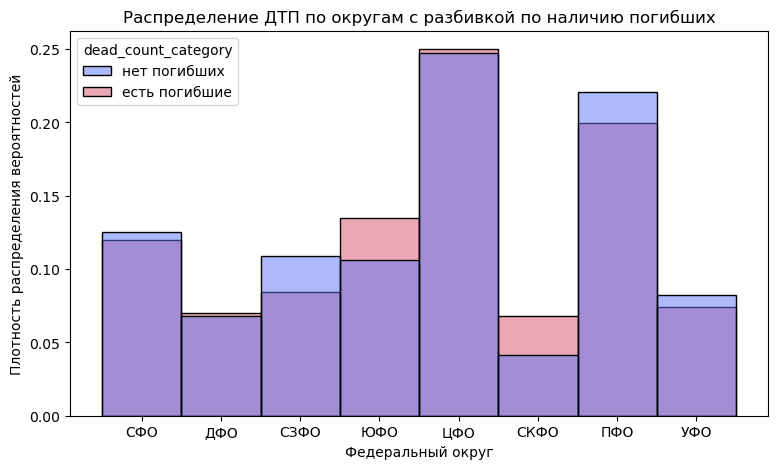

In [308]:
plt.figure(figsize=(9, 5))
sns.histplot(data=data, x='federal_district',
hue='dead_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#5d74f4', '#d7526f'])
plt.title(
'Распределение ДТП по округам с разбивкой по \
наличию погибших',
fontsize=12)
plt.xlabel('Федеральный округ', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

У Дальневосточного, Южного, Центрального и Северо-Кавказского федеральных округов плотность распределения вероятностей выше при ДТП, где есть погибшие. У остальных округов плотность распределения вероятностей выше при ДТП без смертельных случаев.

Изучим распределение дорожно-транспортных происшествий по федеральным округам России с разбивкой по наличию раненых.

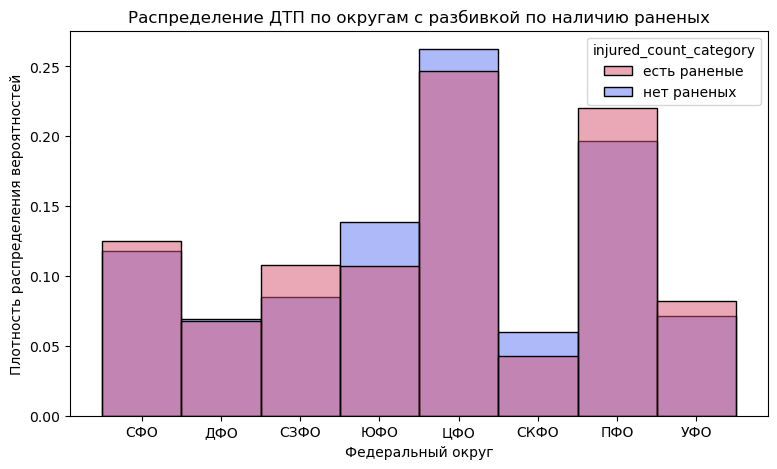

In [310]:
plt.figure(figsize=(9, 5))
sns.histplot(data=data, x='federal_district',
hue='injured_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#d7526f', '#5d74f4'])
plt.title(
'Распределение ДТП по округам с разбивкой по \
наличию раненых',
fontsize=12)
plt.xlabel('Федеральный округ', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

В Сибирском, Северо-Западном, Приволжском и Уральском округах более высокая плотность распределения вероятностей характерна для тех ДТП, где есть раненые.

Изучим распределение дорожно-транспортных происшествий по федеральным округам России с разбивкой по количеству участников.

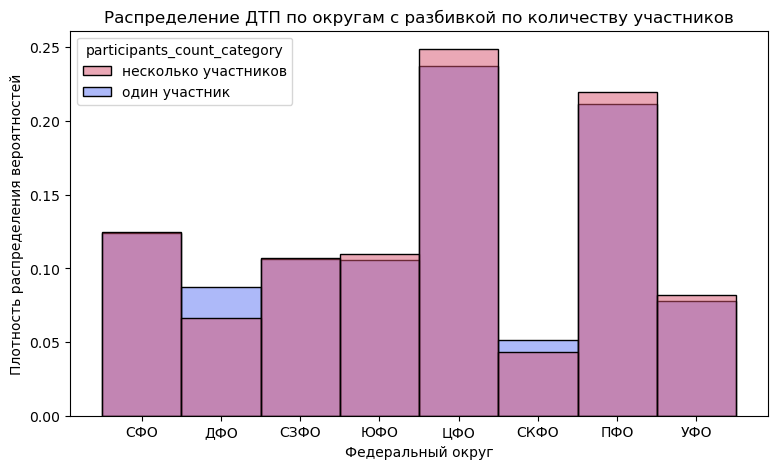

In [312]:
plt.figure(figsize=(9, 5))
sns.histplot(data=data, x='federal_district',
hue='participants_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#d7526f', '#5d74f4'])
plt.title(
'Распределение ДТП по округам с разбивкой по \
количеству участников',
fontsize=12)
plt.xlabel('Федеральный округ', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

В Южном, Центральном, Приволжском и Уральском округах транспортные происшествия с несколькими участниками имеют более высокую плотность распределения вероятностей.

Проанализируем количество дорожно-транспортных происшествий в различных федеральных округах России.

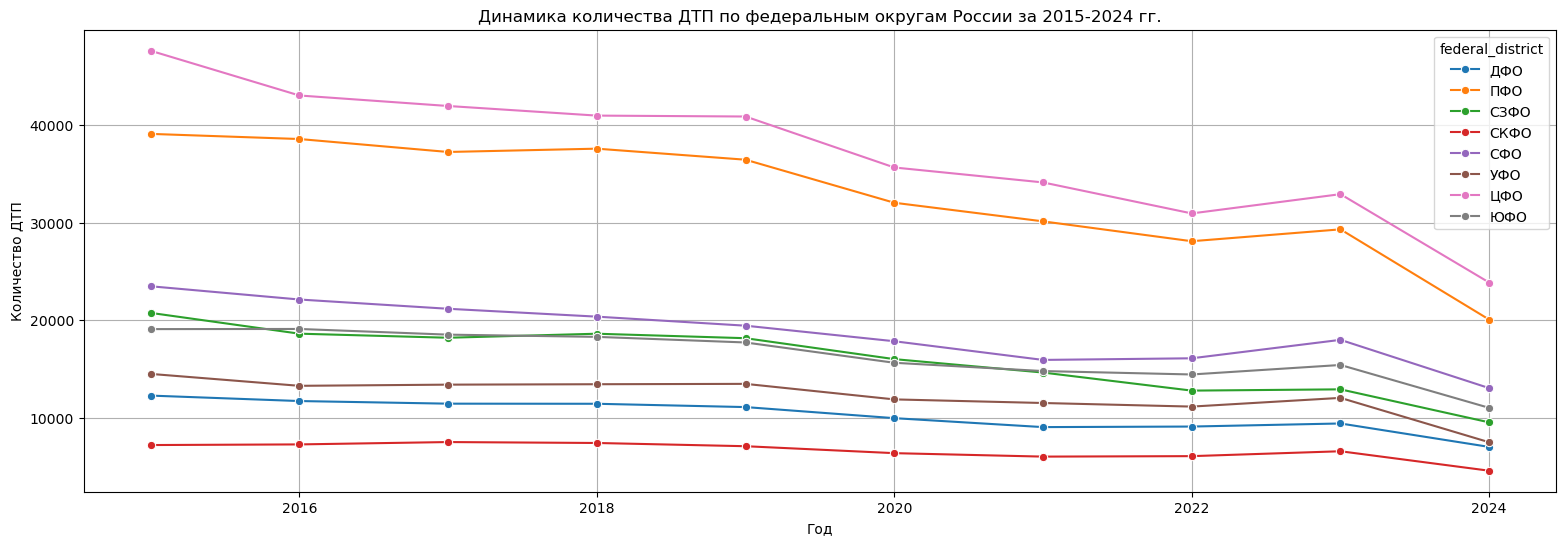

In [314]:
number_of_accidents_by_year_and_district = data.pivot_table(
index=['year_of_accident', 'federal_district'],
values='id', aggfunc='count')
number_of_accidents_by_year_and_district.columns = ['number_of_accidents']
plt.figure(figsize=(19, 6))
sns.lineplot(
data=number_of_accidents_by_year_and_district,
x='year_of_accident',
y='number_of_accidents',
hue='federal_district',
marker='o', legend=True).grid(10)
plt.title('Динамика количества ДТП по \
федеральным округам России за 2015-2024 гг.',
          fontsize=12)
plt.xlabel('Год', fontsize=10)
plt.ylabel('Количество ДТП', fontsize=10)
plt.show()

В Центральном, Приволжском, Сибирском и Северо-Западном федеральных округах наблюдается сокращение количества ДТП с 2015 по 2022 год.

В Южном, Уральском, Дальневосточном и Северо-Кавказском округах изменения количества происшествий были незначительными на протяжении исследуемого периода.

Построим столбчатую диаграмму, показывающую количество ДТП в зависимости от времени суток.

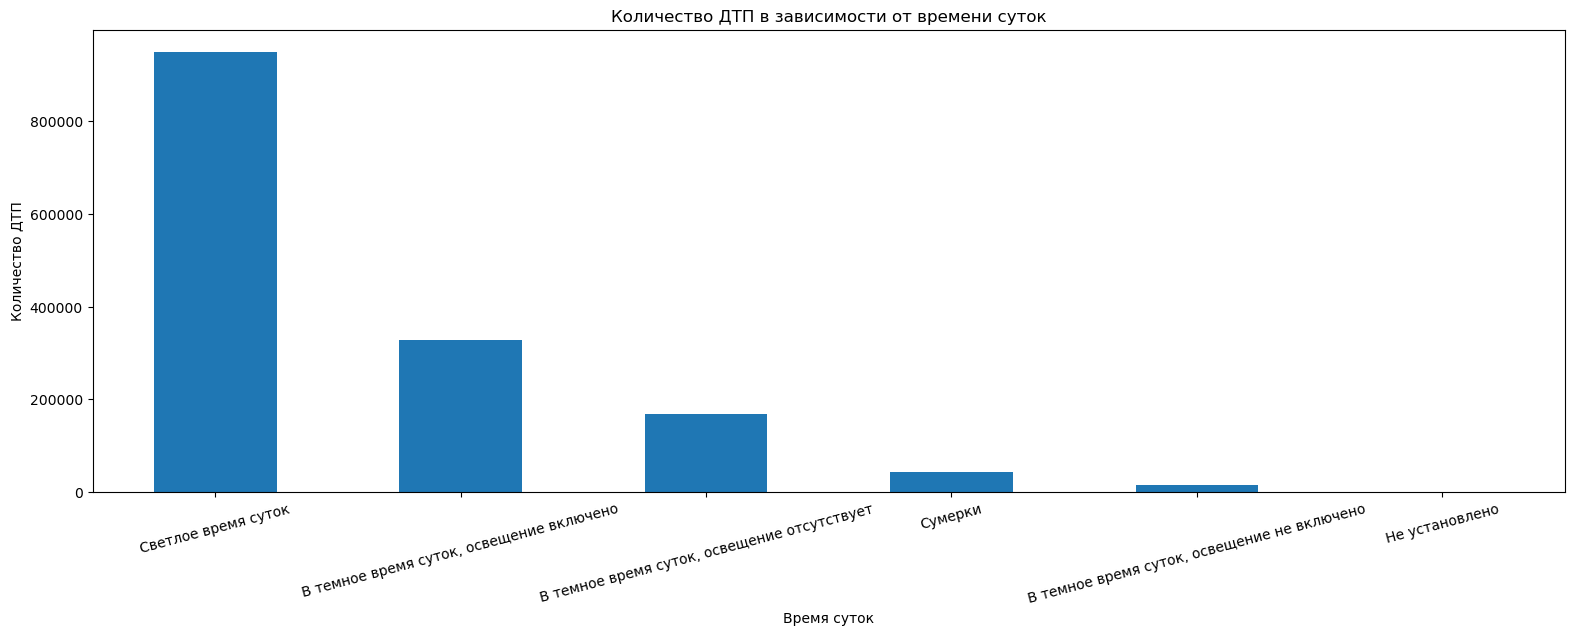

,light,number_of_accidents,share_of_accidents
0,Светлое время суток,950438,63.2%
1,"В темное время суток, освещение включено",327923,21.8%
2,"В темное время суток, освещение отсутствует",168230,11.2%
3,Сумерки,42107,2.8%
4,"В темное время суток, освещение не включено",13997,0.9%
5,Не установлено,77,0.0%


In [316]:
number_of_accidents_by_light = data[
'light'].value_counts()
number_of_accidents_by_light.sort_values(
ascending=False).plot(x='light', y='count', kind='bar',
figsize=(19, 6), legend=False)
plt.xticks(rotation=15)
plt.title('Количество ДТП в зависимости \
от времени суток',
          fontsize=12)
plt.xlabel('Время суток', fontsize=10)
plt.ylabel('Количество ДТП', fontsize=10)
plt.show()

number_of_accidents_by_light = \
number_of_accidents_by_light.reset_index()
number_of_accidents_by_light['share'] = \
number_of_accidents_by_light['count'] / len(data[
'light'])
number_of_accidents_by_light.columns = [
'light',
'number_of_accidents',
'share_of_accidents']
number_of_accidents_by_light = \
number_of_accidents_by_light.style.format(
{'share_of_accidents': "{:.1%}"})
number_of_accidents_by_light

Больше всего ДТП было совершено в светлое время суток — 950 тыс. 438, что составляет 63.2% от всех случаев. Это можно объяснить тем, что днём интенсивность движения транспорта выше. Хорошая видимость на дороге способствует быстрой езде, из-за чего может возникнуть авария. В ясную погоду существует повышенная вероятность ослепления солнечными лучами и риск не заметить другой автомобиль.

21.8% происшествий произошли в тёмное время суток при включённом освещении.

Меньше всего ДТП случалось в сумерках и в тёмное время суток с выключенным освещением — 2.8% и 0.9% соответственно.

Изучим распределение дорожно-транспортных происшествий по времени суток с разбивкой по наличию погибших.

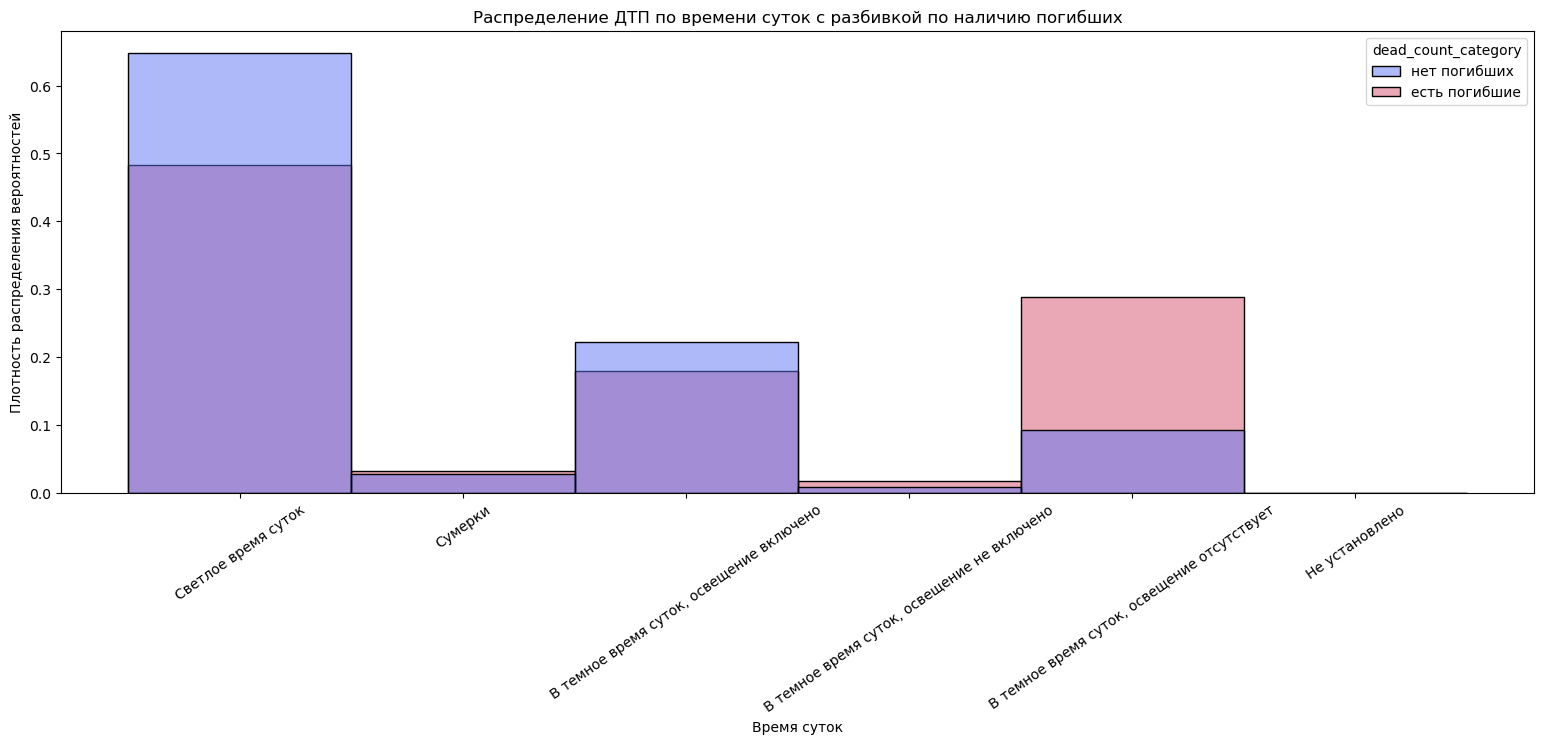

In [318]:
plt.figure(figsize=(19, 6))
sns.histplot(data=data, x='light',
hue='dead_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#5d74f4', '#d7526f'])
plt.xticks(rotation=35)
plt.title(
'Распределение ДТП по времени суток \
с разбивкой по наличию погибших',
fontsize=12)
plt.xlabel('Время суток', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

В сумерки, тёмное время суток с выключенным и отсутствующим освещением плотность распределения вероятностей выше при ДТП, где есть погибшие.

Изучим распределение дорожно-транспортных происшествий по времени суток с разбивкой по наличию раненых.

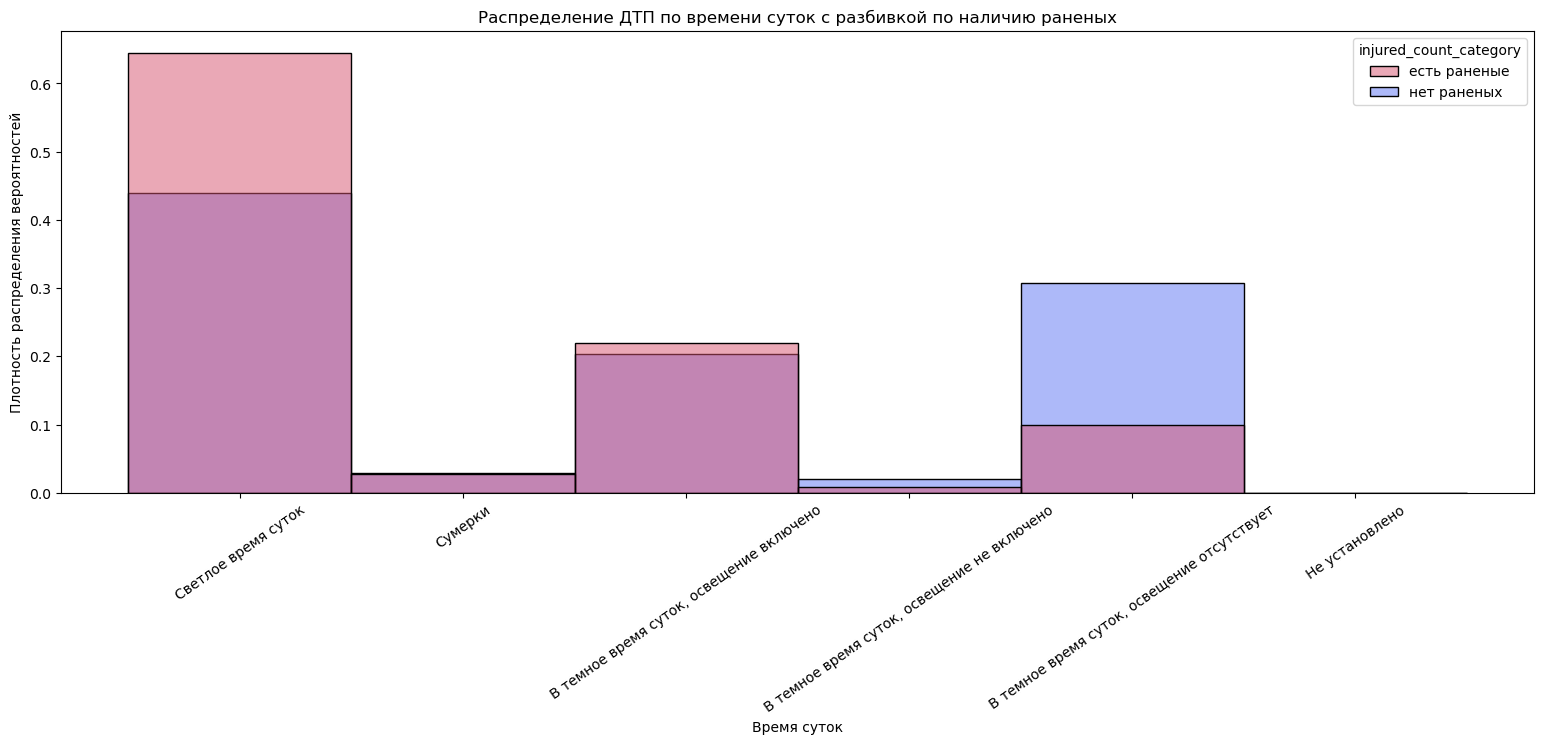

In [320]:
plt.figure(figsize=(19, 6))
sns.histplot(data=data, x='light',
hue='injured_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#d7526f', '#5d74f4'])
plt.xticks(rotation=35)
plt.title(
'Распределение ДТП по времени суток \
с разбивкой по наличию раненых',
fontsize=12)
plt.xlabel('Время суток', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

В светлое время суток и в тёмное время суток с включённым освещением плотность распределения вероятностей выше при ДТП, где есть раненые.

Изучим распределение дорожно-транспортных происшествий по времени суток с разбивкой по количеству участников.

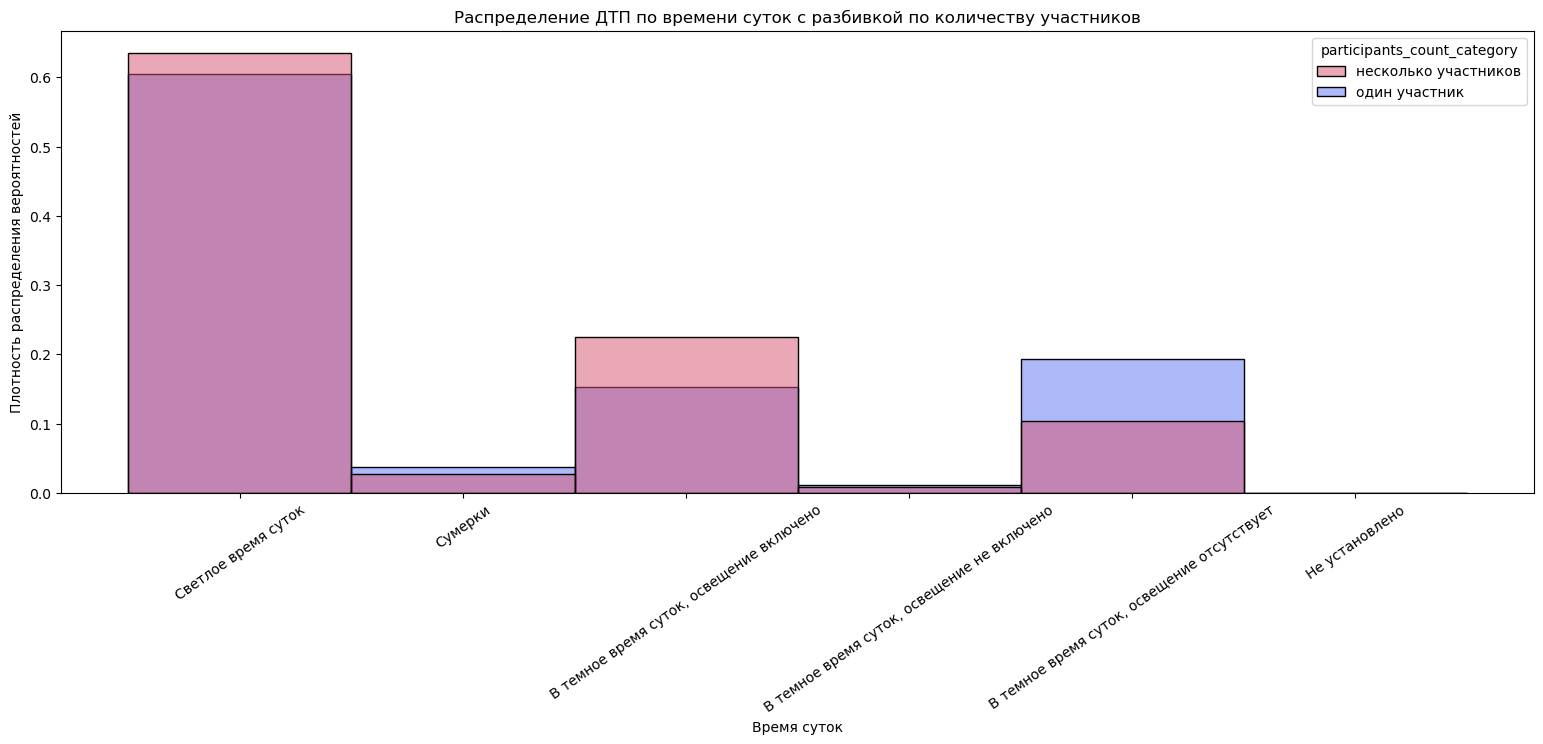

In [322]:
plt.figure(figsize=(19, 6))
sns.histplot(data=data, x='light',
hue='participants_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#d7526f', '#5d74f4'])
plt.xticks(rotation=35)
plt.title(
'Распределение ДТП по времени суток \
с разбивкой по количеству участников',
fontsize=12)
plt.xlabel('Время суток', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

В светлое время суток и в тёмное время суток с включённым освещением плотность распределения вероятностей выше при ДТП, где несколько участников. В сумерки и в тёмное время суток с невключенным или отсутствующим освещением плотность распределения вероятностей выше при ДТП с одним участником.

Построим столбчатую диаграмму, показывающую количество ДТП по 5 наиболее популярным типам ДТП.

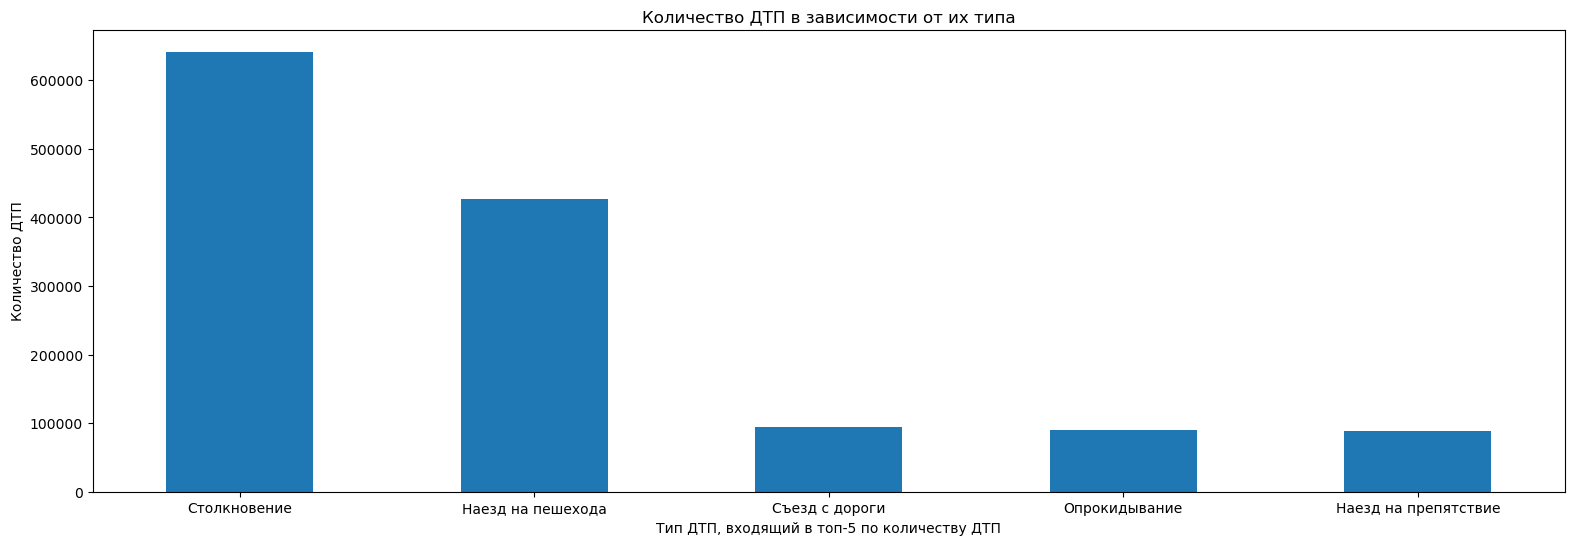

In [326]:
data.rename(columns={'category': 'type_of_accident'}, inplace=True)
number_of_accidents_by_type = data[
'type_of_accident'].value_counts()
number_of_accidents_by_type.head().sort_values(
ascending=False).plot(x='type_of_accident', y='count', kind='bar',
figsize=(19, 6), legend=False)
plt.xticks(rotation=360)
plt.title('Количество ДТП в зависимости \
от их типа', fontsize=12)
plt.xlabel('Тип ДТП, \
входящий в топ-5 по количеству ДТП', fontsize=10)
plt.ylabel('Количество ДТП', fontsize=10)
plt.show()

number_of_accidents_by_type = \
number_of_accidents_by_type.reset_index()
number_of_accidents_by_type['share'] = \
number_of_accidents_by_type['count'] / len(data[
'type_of_accident'])
number_of_accidents_by_type.columns = [
'type_of accident',
'number_of_accidents',
'share_of_accidents']
number_of_accidents_by_type = \
number_of_accidents_by_type.style.format(
{'share_of_accidents': "{:.1%}"})

In [328]:
number_of_accidents_by_type

,type_of accident,number_of_accidents,share_of_accidents
0,Столкновение,641578,42.7%
1,Наезд на пешехода,426230,28.4%
2,Съезд с дороги,93927,6.3%
3,Опрокидывание,90579,6.0%
4,Наезд на препятствие,88920,5.9%
5,Наезд на велосипедиста,51233,3.4%
6,Падение пассажира,48336,3.2%
7,Наезд на стоящее ТС,44728,3.0%
8,Иной вид ДТП,7091,0.5%
9,Наезд на животное,5631,0.4%


В топ-5 типов дорожно-транспортных происшествий входят столкновение (42.7% от общего числа ДТП), наезд на пешехода (28.4%), съезд с дороги (6.3%), опрокидывание (6%) и наезд на препятствие (5.9%).

Изучим распределение дорожно-транспортных происшествий по типам с разбивкой по наличию погибших.

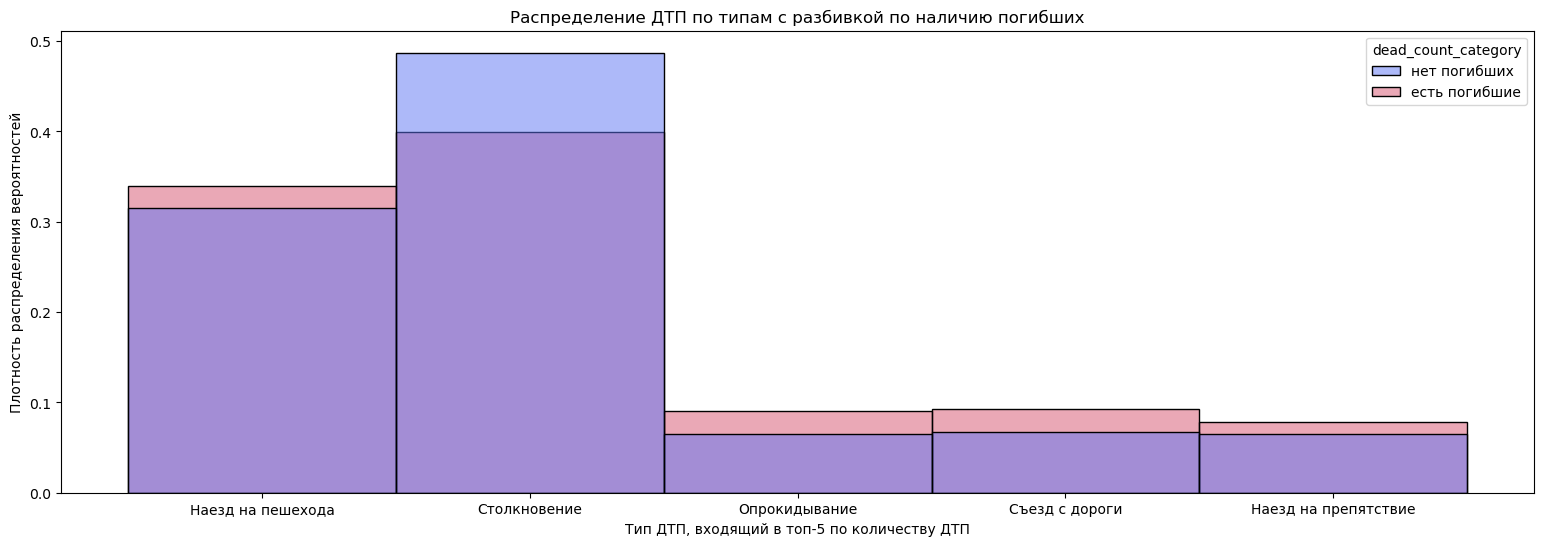

In [332]:
plt.figure(figsize=(19, 6))
sns.histplot(data=data.query(
'type_of_accident in ["Столкновение", \
"Наезд на пешехода", \
"Съезд с дороги", \
"Опрокидывание", \
"Наезд на препятствие"]'),
x='type_of_accident',
hue='dead_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#5d74f4', '#d7526f'])
plt.xticks(rotation=360)
plt.title(
'Распределение ДТП по типам \
с разбивкой по наличию погибших',
fontsize=12)
plt.xlabel('Тип ДТП, \
входящий в топ-5 по количеству ДТП', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

В случае наезда на пешехода, опрокидывания, съезда с дороги и наезда на препятствие плотность распределения вероятностей выше при ДТП с погибшими.

Изучим распределение дорожно-транспортных происшествий по типам с разбивкой по наличию раненых.

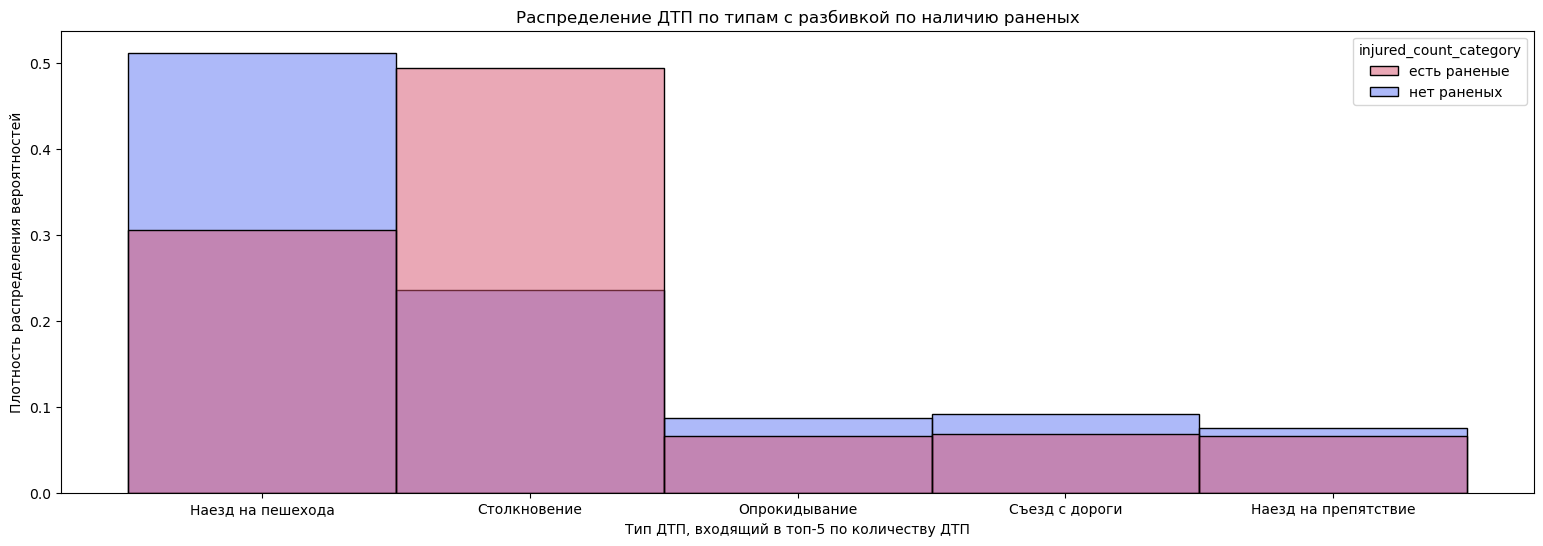

In [334]:
plt.figure(figsize=(19, 6))
sns.histplot(data=data.query(
'type_of_accident in ["Столкновение", \
"Наезд на пешехода", \
"Съезд с дороги", \
"Опрокидывание", \
"Наезд на препятствие"]'),
x='type_of_accident',
hue='injured_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#d7526f', '#5d74f4'])
plt.xticks(rotation=360)
plt.title(
'Распределение ДТП по типам \
с разбивкой по наличию раненых',
fontsize=12)
plt.xlabel('Тип ДТП, \
входящий в топ-5 по количеству ДТП', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

Столкновения характеризуются более высокой плотностью распределения вероятностей при ДТП с ранеными участниками.

Построим столбчатую диаграмму, показывающую количество ДТП в зависимости от степени тяжести.

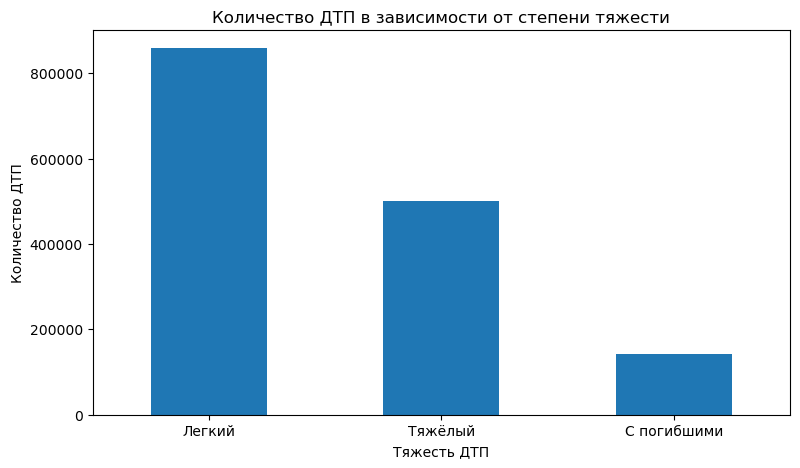

,severity,number_of_accidents,share_of_accidents
0,Легкий,859282,57.2%
1,Тяжёлый,500383,33.3%
2,С погибшими,143107,9.5%


In [336]:
number_of_accidents_by_severity = data[
'severity'].value_counts()
number_of_accidents_by_severity.sort_values(
ascending=False).plot(x='severity', y='count', kind='bar',
figsize=(9, 5), legend=False)
plt.xticks(rotation=360)
plt.title('Количество ДТП в зависимости \
от степени тяжести', fontsize=12)
plt.xlabel('Тяжесть ДТП', fontsize=10)
plt.ylabel('Количество ДТП', fontsize=10)
plt.show()

number_of_accidents_by_severity = \
number_of_accidents_by_severity.reset_index()
number_of_accidents_by_severity['share'] = \
number_of_accidents_by_severity['count'] / len(data[
'severity'])
number_of_accidents_by_severity.columns = [
'severity',
'number_of_accidents',
'share_of_accidents']
number_of_accidents_by_severity = \
number_of_accidents_by_severity.style.format(
{'share_of_accidents': "{:.1%}"})
number_of_accidents_by_severity

Лёгкие дорожно-транспортные происшествия составляют более половины всех аварий — 57.2%. Тяжёлыми являются 33.3% ДТП. Меньше всего ДТП с летальным исходом — 9.5%.

Изучим распределение дорожно-транспортных происшествий по степени тяжести с разбивкой по количеству участников.

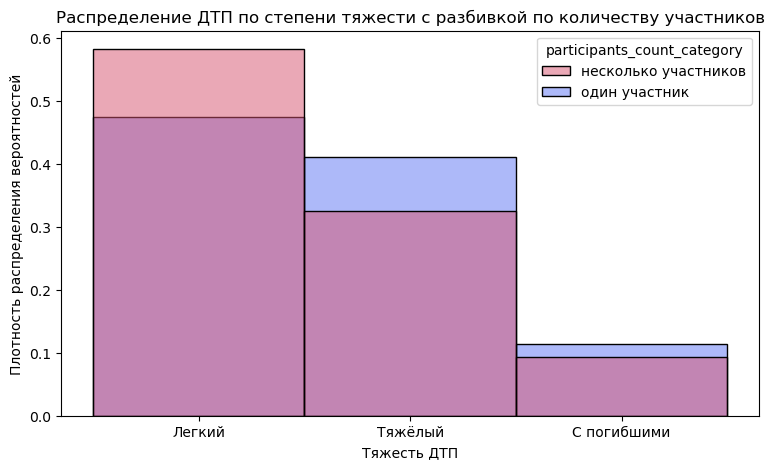

In [338]:
plt.figure(figsize=(9, 5))
sns.histplot(data=data,
x='severity',
hue='participants_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#d7526f', '#5d74f4'])
plt.title(
'Распределение ДТП по степени тяжести \
с разбивкой по количеству участников',
fontsize=12)
plt.xlabel('Тяжесть ДТП', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

У лёгких ДТП плотность распределения вероятностей выше, если участников несколько. При тяжёлых ДТП, а также при ДТП с погибшими плотность распределения вероятностей выше, когда один участник.

Построим столбчатую диаграмму, показывающую количество транспортных средств по 5-ти наиболее популярным годам производства.

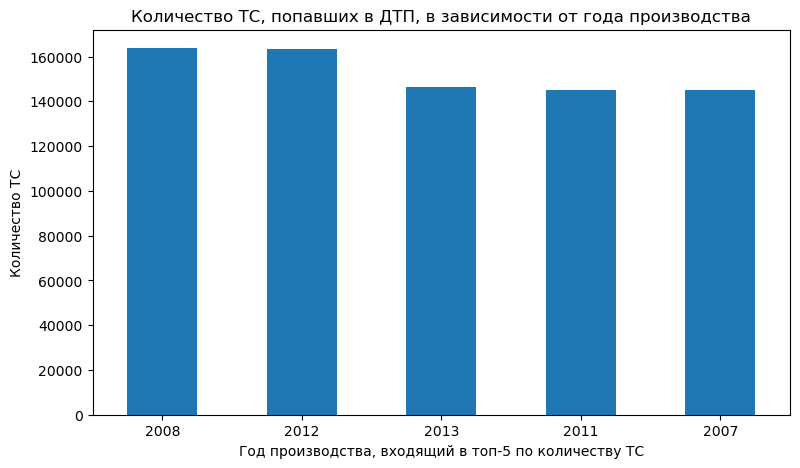

In [340]:
number_of_vehicles_by_year = n_data.query('year > 1')[
'year'].value_counts()
number_of_vehicles_by_year.head().sort_values(
ascending=False).plot(x='year', y='count', kind='bar',
figsize=(9, 5), legend=False)
plt.xticks(rotation=360)
plt.title('Количество ТС, попавших в ДТП, \
в зависимости от года производства', fontsize=12)
plt.xlabel('Год производства, \
входящий в топ-5 по количеству ТС', fontsize=10)
plt.ylabel('Количество ТС', fontsize=10)
plt.show()

number_of_vehicles_by_year = \
number_of_vehicles_by_year.reset_index()
number_of_vehicles_by_year['share'] = \
number_of_vehicles_by_year['count'] / len(
n_data.query('year > 1')[
'year'])
number_of_vehicles_by_year.columns = [
'year',
'number_of_vehicles',
'share_of_vehicles']
number_of_vehicles_by_year = \
number_of_vehicles_by_year.style.format(
{'share_of_vehicles': "{:.1%}"})

In [342]:
number_of_vehicles_by_year

,year,number_of_vehicles,share_of_vehicles
0,2008,163828,7.2%
1,2012,163544,7.2%
2,2013,146611,6.4%
3,2011,145216,6.4%
4,2007,145090,6.4%
5,2014,117413,5.2%
6,2010,107731,4.7%
7,2006,101593,4.5%
8,2005,81266,3.6%
9,2015,79387,3.5%


В ДТП часто попадают транспортные средства, выпущенные не недавно и не очень давно — в 2008 (7.2% от общего числа транспортных средств), 2012 (7.2%), 2013 (6.4%), 2011 (6.4%) и 2007 (6.4%) годах.

Изучим распределение транспортных средств, попавших в ДТП, по годам производства с разбивкой по наличию погибших.

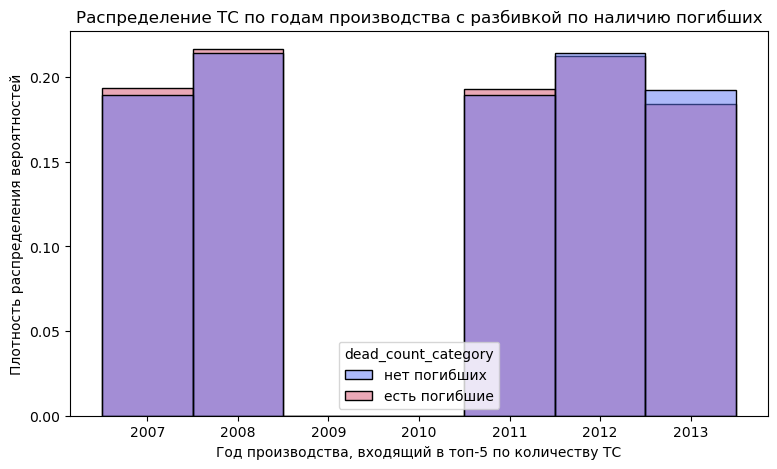

In [345]:
plt.figure(figsize=(9, 5))
sns.histplot(data=n_data.query(
'year in [2008, 2012, \
2013, 2011, 2007] '),
x='year',
hue='dead_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#5d74f4', '#d7526f'])
plt.title(
'Распределение ТС по годам производства \
с разбивкой по наличию погибших',
fontsize=12)
plt.xlabel('Год производства, \
входящий в топ-5 по количеству ТС', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

Транспортные средства, выпущенные в более ранних годах — 2007, 2008 и 2011 годах и ставшие участниками ДТП, имеют более высокую плотность распределения вероятностей при авариях с погибшими.

Изучим распределение транспортных средств, попавших в ДТП, по годам производства с разбивкой по наличию раненых.

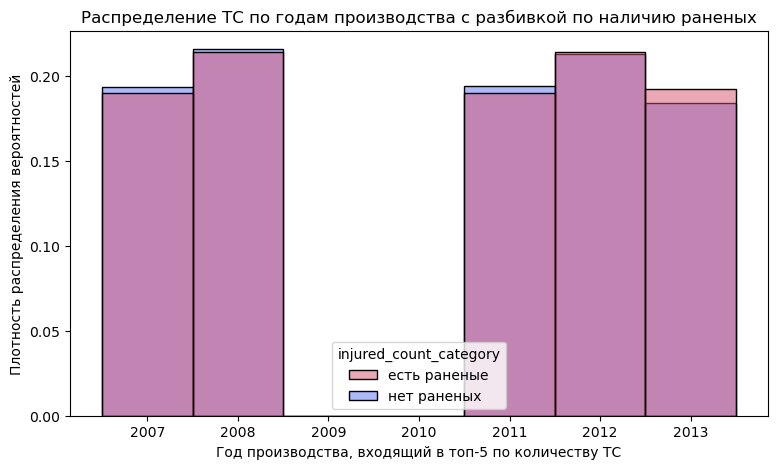

In [348]:
plt.figure(figsize=(9, 5))
sns.histplot(data=n_data.query(
'year in [2008, 2012, \
2013, 2011, 2007] '),
x='year',
hue='injured_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#d7526f', '#5d74f4'])
plt.title(
'Распределение ТС по годам производства \
с разбивкой по наличию раненых',
fontsize=12)
plt.xlabel('Год производства, \
входящий в топ-5 по количеству ТС', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

Транспортные средства 2012 и 2013 годов производства имеют более высокую плотность распределения вероятностей при тех ДТП, где есть раненые.

Построим столбчатую диаграмму, показывающую количество транспортных средств по 5 наиболее популярным маркам.

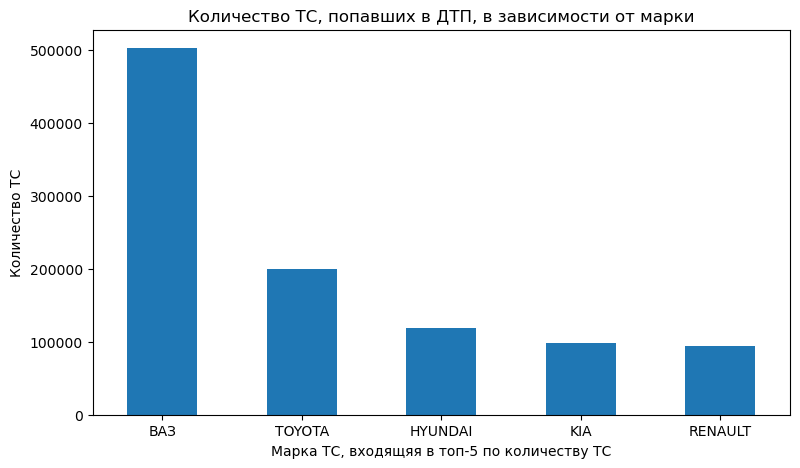

In [355]:
number_of_vehicles_by_brand = n_data[
'brand'].value_counts()
number_of_vehicles_by_brand.sort_values(
ascending=False).head().plot(x='brand', y='count', kind='bar',
figsize=(9, 5), legend=False)
plt.xticks(rotation=360)
plt.title('Количество ТС, попавших в ДТП, \
в зависимости от марки', fontsize=12)
plt.xlabel('Марка ТС, \
входящяя в топ-5 по количеству ТС', fontsize=10)
plt.ylabel('Количество ТС', fontsize=10)
plt.show()

number_of_vehicles_by_brand = \
number_of_vehicles_by_brand.reset_index()
number_of_vehicles_by_brand['share'] = \
number_of_vehicles_by_brand['count'] / len(
n_data['brand'].dropna())
number_of_vehicles_by_brand.columns = [
'brand',
'number_of_vehicles',
'share_of_vehicles']
number_of_vehicles_by_brand = \
number_of_vehicles_by_brand.style.format(
{'share_of_vehicles': "{:.1%}"})

In [357]:
number_of_vehicles_by_brand

,brand,number_of_vehicles,share_of_vehicles
0,ВАЗ,502682,21.9%
1,TOYOTA,200206,8.7%
2,HYUNDAI,118813,5.2%
3,KIA,97674,4.3%
4,RENAULT,94539,4.1%
5,NISSAN,90754,4.0%
6,ГАЗ,81489,3.6%
7,VOLKSWAGEN,78250,3.4%
8,Прочие марки ТС,71439,3.1%
9,FORD,66493,2.9%


Наиболее часто дорожно-транспортные происшествия происходят с участием транспортных средств таких марок, как ВАЗ (21.9%), TOYOTA (8.7%), HYUNDAI (5.2%), KIA (4.3%) и RENAULT (4.1%).

Изучим распределение транспортных средств, попавших в ДТП, по маркам с разбивкой по наличию погибших.

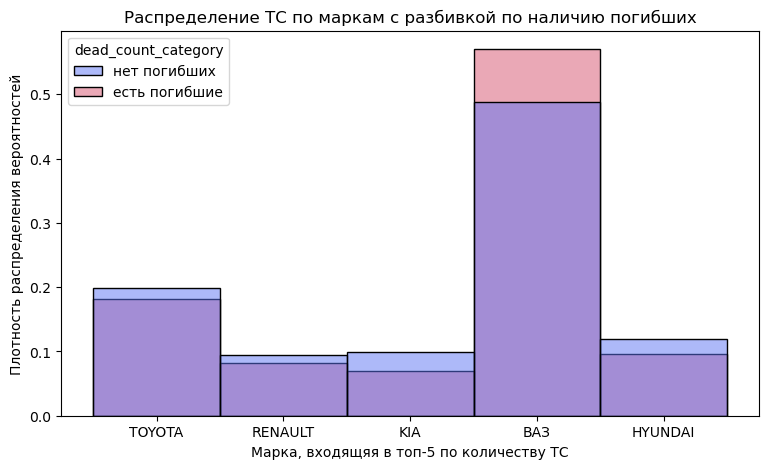

In [360]:
plt.figure(figsize=(9, 5))
sns.histplot(data=n_data.query(
'brand in ["ВАЗ", "TOYOTA", \
"HYUNDAI", "KIA", "RENAULT"]'),
x='brand',
hue='dead_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#5d74f4', '#d7526f'])
plt.title(
'Распределение ТС по маркам \
с разбивкой по наличию погибших',
fontsize=12)
plt.xlabel('Марка, \
входящяя в топ-5 по количеству ТС', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

У транспортных средств марок ВАЗ плотность распределения вероятностей выше при ДТП с погибшими.

Изучим распределение транспортных средств, попавших в ДТП, по маркам с разбивкой по наличию раненых.

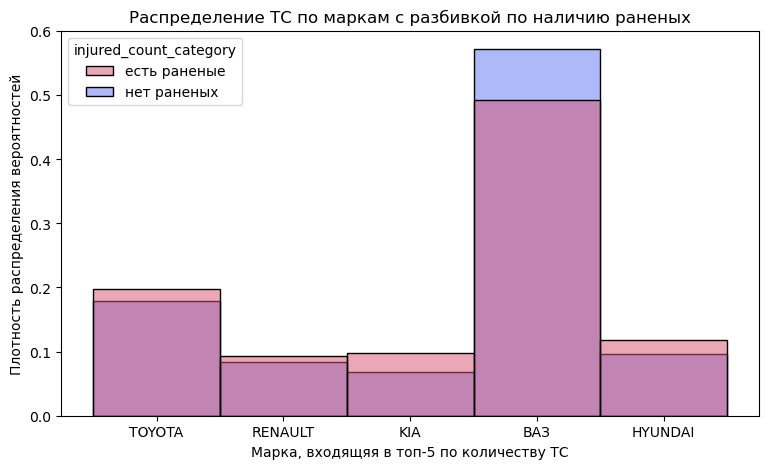

In [364]:
plt.figure(figsize=(9, 5))
sns.histplot(data=n_data.query(
'brand in ["ВАЗ", "TOYOTA", \
"HYUNDAI", "KIA", "RENAULT"]'),
x='brand',
hue='injured_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#d7526f', '#5d74f4'])
plt.title(
'Распределение ТС по маркам \
с разбивкой по наличию раненых',
fontsize=12)
plt.xlabel('Марка, \
входящяя в топ-5 по количеству ТС', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

У транспортных средств марок TOYOTA, RENAULT, KIA и HYUNDAI плотность распределения вероятностей выше при ДТП с ранеными.

Изучим распределение транспортных средств, попавших в ДТП, по маркам с разбивкой по количеству участников.

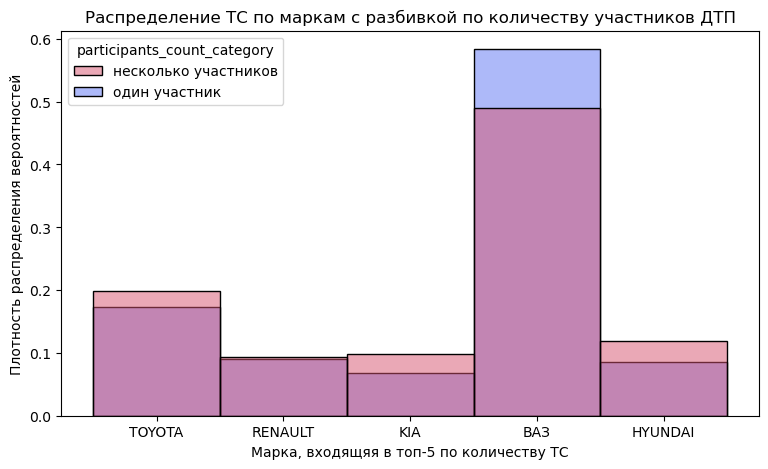

In [367]:
plt.figure(figsize=(9, 5))
sns.histplot(data=n_data.query(
'brand in ["ВАЗ", "TOYOTA", \
"HYUNDAI", "KIA", "RENAULT"]'),
x='brand',
hue='participants_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#d7526f', '#5d74f4'])
plt.title(
'Распределение ТС по маркам \
с разбивкой по количеству участников ДТП',
fontsize=12)
plt.xlabel('Марка, \
входящяя в топ-5 по количеству ТС', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

У транспортных средств марок TOYOTA, RENAULT, KIA и HYUNDAI, наиболее часто попадающих в ДТП, плотность распределения вероятностей выше при ДТП с несколькими участниками.

Построим столбчатую диаграмму, показывающую количество транспортных средств по 5 наиболее популярным цветам.

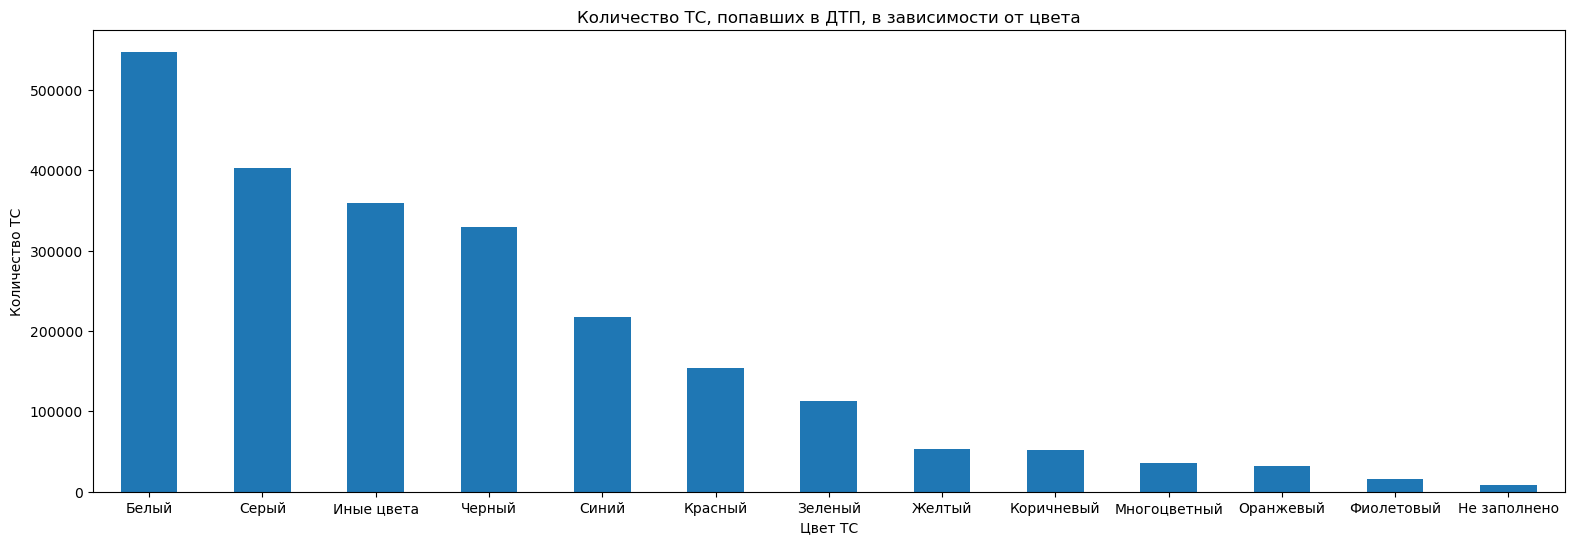

,color,number_of_vehicles,share_of_vehicles
0,Белый,547277,23.6%
1,Серый,402755,17.4%
2,Иные цвета,359361,15.5%
3,Черный,329183,14.2%
4,Синий,217467,9.4%
5,Красный,153982,6.6%
6,Зеленый,112830,4.9%
7,Желтый,53236,2.3%
8,Коричневый,51891,2.2%
9,Многоцветный,35681,1.5%


In [372]:
number_of_vehicles_by_color = n_data[
'color'].value_counts()
number_of_vehicles_by_color.sort_values(
ascending=False).plot(x='color', y='count', kind='bar',
figsize=(19, 6), legend=False)
plt.xticks(rotation=360)
plt.title('Количество ТС, попавших в ДТП, \
в зависимости от цвета', fontsize=12)
plt.xlabel('Цвет ТС', fontsize=10)
plt.ylabel('Количество ТС', fontsize=10)
plt.show()

number_of_vehicles_by_color = \
number_of_vehicles_by_color.reset_index()
number_of_vehicles_by_color['share'] = \
number_of_vehicles_by_color['count'] / len(
n_data['color'].dropna())
number_of_vehicles_by_color.columns = [
'color',
'number_of_vehicles',
'share_of_vehicles']
number_of_vehicles_by_color = \
number_of_vehicles_by_color.style.format(
{'share_of_vehicles': "{:.1%}"})
number_of_vehicles_by_color

Чаще всего в ДТП попадают транспортные средства белого (23.6%), серого (17.4%) и чёрного (14.2%) цвета. Это можно объяснить тем, что данные цвета транспортных средств являются распространёнными. Реже всего в авариях участвуют транспортные средства фиолетового цвета (0.7%).

Построим столбчатую диаграмму, показывающую количество транспортных средств по 5 наиболее популярным категориям.

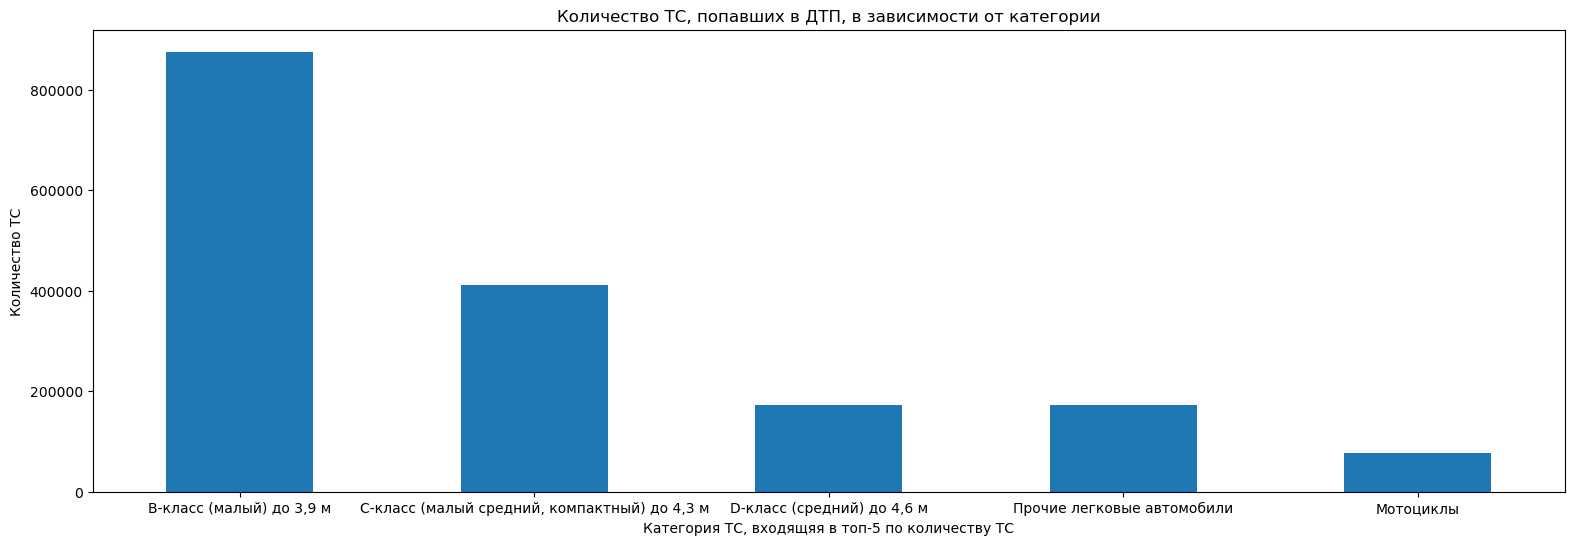

In [377]:
number_of_vehicles_by_category = n_data[
'category'].value_counts()
number_of_vehicles_by_category.head().sort_values(
ascending=False).plot(x='category', y='count', kind='bar',
figsize=(19, 6), legend=False)
plt.xticks(rotation=360)
plt.title('Количество ТС, попавших в ДТП, \
в зависимости от категории', fontsize=12)
plt.xlabel('Категория ТС, \
входящяя в топ-5 по количеству ТС', fontsize=10)
plt.ylabel('Количество ТС', fontsize=10)
plt.show()

number_of_vehicles_by_category = \
number_of_vehicles_by_category.reset_index()
number_of_vehicles_by_category['share'] = \
number_of_vehicles_by_category['count'] / len(
n_data['category'].dropna())
number_of_vehicles_by_category.columns = [
'category',
'number_of_vehicles',
'share_of_vehicles']
number_of_vehicles_by_category = \
number_of_vehicles_by_category.style.format(
{'share_of_vehicles': "{:.1%}"})

In [379]:
number_of_vehicles_by_category

,category,number_of_vehicles,share_of_vehicles
0,"В-класс (малый) до 3,9 м",876103,36.9%
1,"С-класс (малый средний, компактный) до 4,3 м",410996,17.3%
2,"D-класс (средний) до 4,6 м",173080,7.3%
3,Прочие легковые автомобили,172579,7.3%
4,Мотоциклы,77682,3.3%
5,Минивэны и универсалы повышенной вместимости,74021,3.1%
6,Седельные тягачи,67190,2.8%
7,"А-класс (особо малый) до 3,5 м",64821,2.7%
8,Фургоны,56978,2.4%
9,Велосипеды,53610,2.3%


Пять наиболее распространённых категорий транспортных средств, которые часто попадают в ДТП, включают: В-класс (малый) до 3.9 м (36.9%), С-класс (малый средний, компактный) до 4.3 м (17.3%), D-класс (средний) до 4.6 м (7.3%), прочие легковые автомобили (7.3%) и мотоциклы (3.3%).

Изучим распределение транспортных средств, попавших в ДТП, по категориям с разбивкой по наличию погибших.

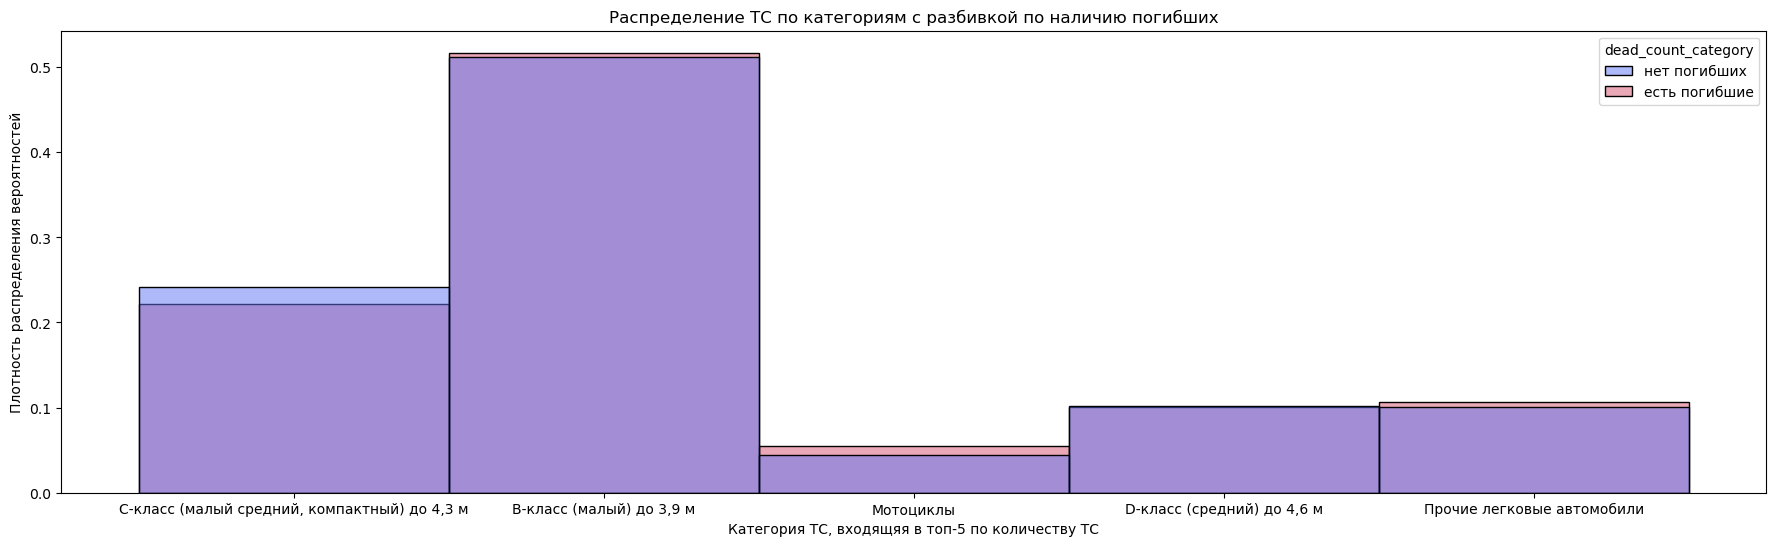

In [382]:
plt.figure(figsize=(22, 6))
sns.histplot(data=n_data.query(
'category in ["В-класс (малый) до 3,9 м", \
"С-класс (малый средний, компактный) до 4,3 м", \
"D-класс (средний) до 4,6 м", \
"Прочие легковые автомобили", \
"Мотоциклы"]'),
x='category',
hue='dead_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#5d74f4', '#d7526f'])
plt.title(
'Распределение ТС по категориям \
с разбивкой по наличию погибших',
fontsize=12)
plt.xlabel('Категория ТС, \
входящяя в топ-5 по количеству ТС', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

Среди транспортных средств В-класса (малого) до 3.9 м, мотоциклов и прочих легковых автомобилей плотность распределения вероятностей выше при ДТП с погибшими.

Изучим распределение транспортных средств, попавших в ДТП, по категориям с разбивкой по наличию раненых.

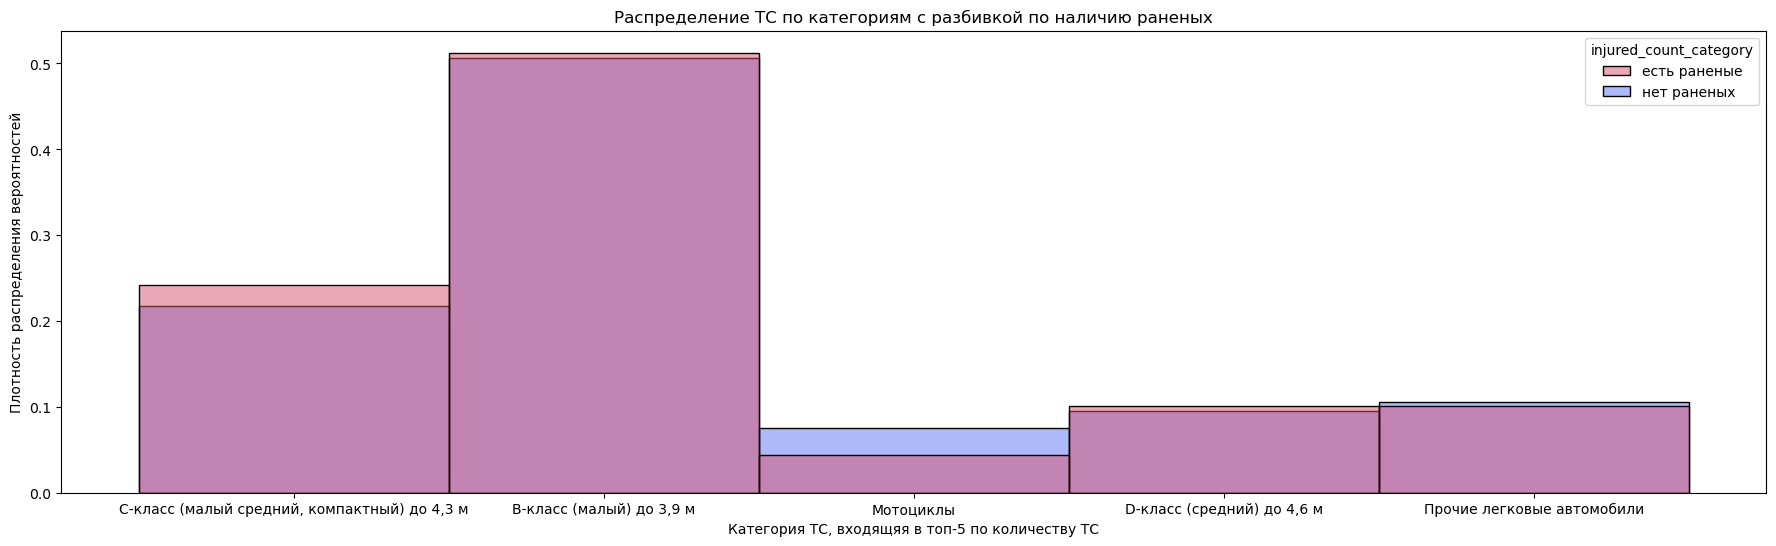

In [385]:
plt.figure(figsize=(22, 6))
sns.histplot(data=n_data.query(
'category in ["В-класс (малый) до 3,9 м", \
"С-класс (малый средний, компактный) до 4,3 м", \
"D-класс (средний) до 4,6 м", \
"Прочие легковые автомобили", \
"Мотоциклы"]'),
x='category',
hue='injured_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#d7526f', '#5d74f4'])
plt.title(
'Распределение ТС по категориям \
с разбивкой по наличию раненых',
fontsize=12)
plt.xlabel('Категория ТС, \
входящяя в топ-5 по количеству ТС', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

Среди транспортных средств В-класса (малого) до 3.9 м, С-класса (малого среднего, компактного) до 4.3 м и D-класса (среднего) до 4.6 м плотность распределения вероятностей выше при ДТП с ранеными.

Изучим распределение транспортных средств, попавших в ДТП, по категориям с разбивкой по количеству участников.

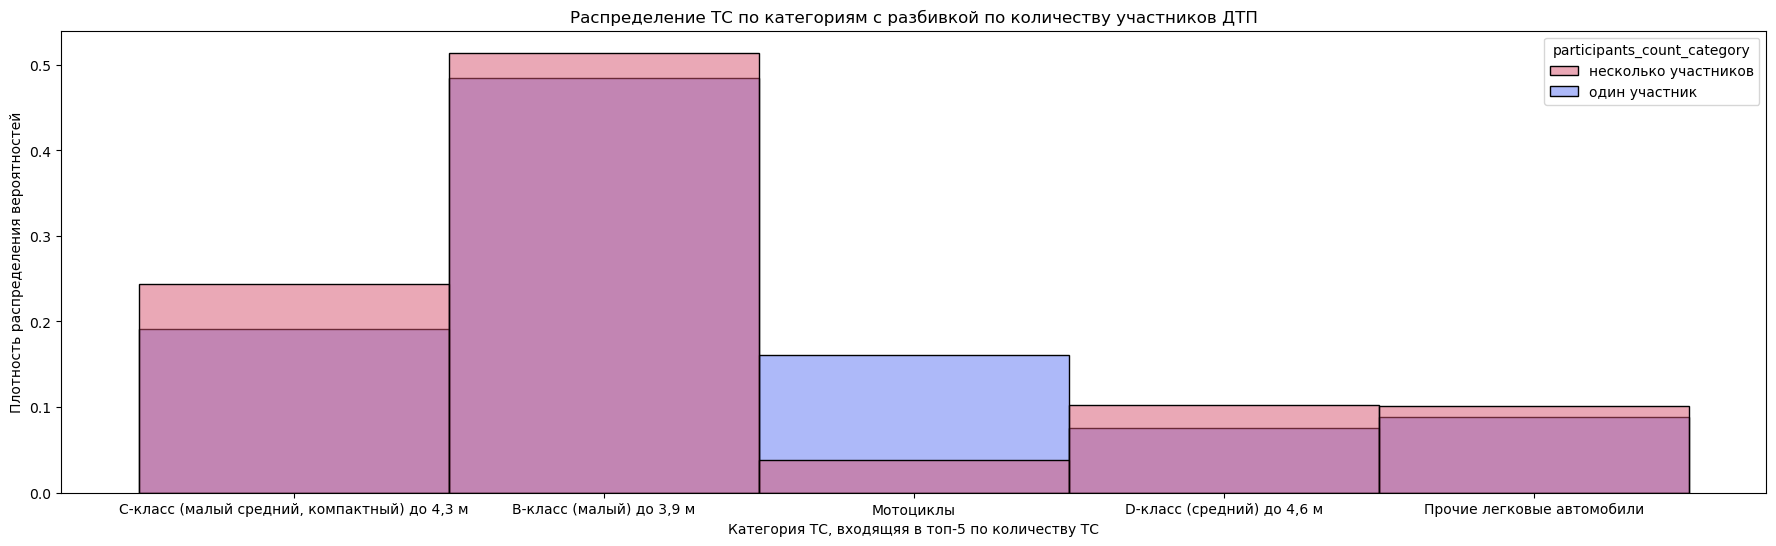

In [389]:
plt.figure(figsize=(22, 6))
sns.histplot(data=n_data.query(
'category in ["В-класс (малый) до 3,9 м", \
"С-класс (малый средний, компактный) до 4,3 м", \
"D-класс (средний) до 4,6 м", \
"Прочие легковые автомобили", \
"Мотоциклы"]'),
x='category',
hue='participants_count_category', stat='density',
common_norm=False, discrete=True,
palette=['#d7526f', '#5d74f4'])
plt.title(
'Распределение ТС по категориям \
с разбивкой по количеству участников ДТП',
fontsize=12)
plt.xlabel('Категория ТС, \
входящяя в топ-5 по количеству ТС', fontsize=10)
plt.ylabel('Плотность распределения вероятностей',
fontsize=10)
plt.show()

Среди транспортных средств В-класса (малого) до 3.9 м, С-класса (малого среднего, компактного) до 4.3 м, D-класса (среднего) до 4.6 м, а также прочих лекговых автомобилей плотность распределения вероятностей выше при ДТП с несколькими участниками.

### Характеристики дорожно-транспортных происшествий без погибших и с погибшими

Характеристики типичных ДТП без погибших:

- Приволжский, Северо-Западный, Сибирский и Уральский федеральные округа;
- светлое время суток или тёмное время суток с включённым освещением;
- столкновение;
- танспортные средства С-класса (малого среднего, компактного) до 4.3 м;
- транспортные средства, выпущенные в 2012 и 2013 гг.;
- TOYOTA, RENAULT, KIA и HYUNDAI.

Характеристики типичных ДТП с погибшими:

- Дальневосточный, Северо-Кавказский, Центральный и Южный федеральные округа;
- сумерки, тёмное время суток с выключенным или отсутствующим освещением;
- наезд на пешехода, опрокидывание, съезд с дороги, наезд на препятствие;
- транспортные средства В-класса (малого) до 3.9 м, мотоциклы и прочие легковые автомобили;
- транспортные средства, выпущенные в 2007, 2008 и 2011 гг.;
- ВАЗ.

### Характеристики дорожно-транспортных происшествий с одним и несколькими участниками

Характеристики типичных ДТП с одним участником:

- Дальневосточный, Северо-Кавказский федеральные округа;
- сумерки, тёмное время суток с отсутствующим освещением;
- тяжёлое ДТП или ДТП с погибшими;
- мотоциклы;
- ВАЗ.

Характеристики типичных ДТП с несколькими участниками:

- Приволжский, Уральский, Центральный, Южный федеральные округа;
- светлое время суток, тёмное время суток с включённым освещением;
- лёгкая степень тяжести ДТП;
- транспортные средства В-класса (малого) до 3.9 м, С-класса (малого среднего, компактного) до 4.3 м, D-класса (среднего) до 4.6 м, а также прочие лекговые автомобили;
- TOYOTA, RENAULT, KIA и HYUNDAI.

### Корреляционный анализ

Вычислим коэффициенты корреляции phik между столбцами датафрейма `data`: `'dead_count'`, `'injured_count'`, `'participants_count'`, `'light'`, `'type_of_accident'`, `'severity'`, `'parent_region'`. Визуализируем корреляционную матрицу с помощью тепловой карты.

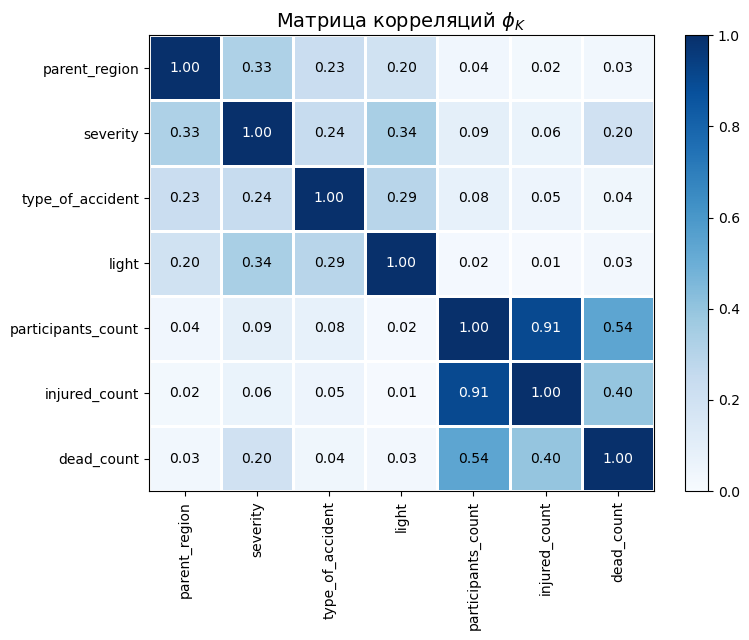

In [397]:
phik_matrix = data[
['dead_count',
'injured_count',
'participants_count',
'light',
'type_of_accident',
'severity',
'parent_region'
]].phik_matrix(
interval_cols=['dead_count',
'injured_count',
'participants_count'])

plot_correlation_matrix(
phik_matrix.values,
x_labels=phik_matrix.columns,
y_labels=phik_matrix.index,
vmin=0, vmax=1,
color_map='Blues',
title=r'Матрица корреляций $\phi_K$',
fontsize_factor=1, figsize=(8, 6.5))
plt.tight_layout()
plt.show()

Наибольший коэффициент корреляции среди пар переменных составляет 0.91 и указывает на очень сильную связь между количеством раненых в ДТП и количеством участников ДТП.

Построим график рассеяния для количества раненых в ДТП и участников ДТП.

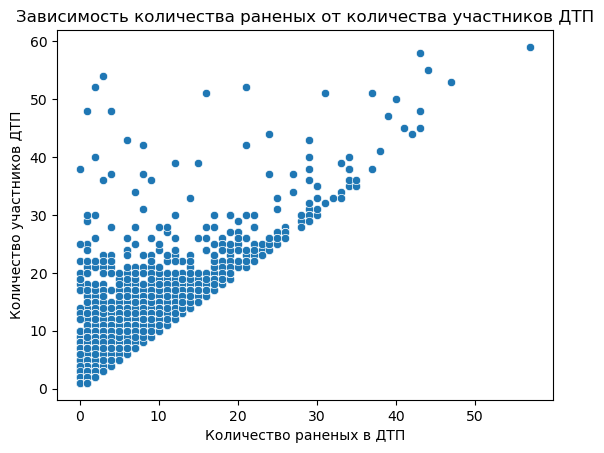

In [401]:
sns.scatterplot(
data=data,
x='injured_count',
y='participants_count')
plt.title('Зависимость количества \
раненых от количества \
участников ДТП',
fontsize=12)
plt.xlabel('Количество раненых в ДТП',
fontsize=10)
plt.ylabel('Количество участников ДТП', fontsize=10)
plt.show()

С ростом числа участников ДТП увеличивается количество раненых в ДТП.

Средняя корреляция характерна для количества погибших в ДТП и участников ДТП — 0.54.

Построим график рассеяния для количества погибших в ДТП и участников ДТП.

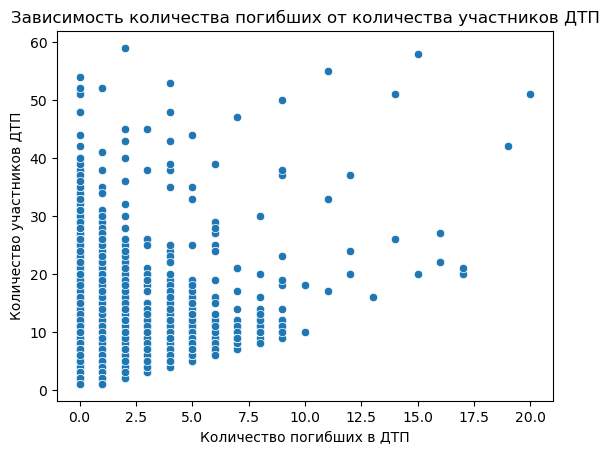

In [406]:
sns.scatterplot(
data=data,
x='dead_count',
y='participants_count')
plt.title('Зависимость количества \
погибших от количества \
участников ДТП',
fontsize=12)
plt.xlabel('Количество погибших в ДТП',
fontsize=10)
plt.ylabel('Количество участников ДТП', fontsize=10)
plt.show()

С ростом числа участников ДТП можно наблюдать тенденцию к увеличению количества погибших в ДТП. Однако есть много ДТП без смертельных исходов или с небольшим количеством, но с большим числом участников.

Слабая корреляция существует между числом раненых и погибших в ДТП — 0.4.

Построим график рассеяния для количества погибших в ДТП и количества раненых в ДТП.

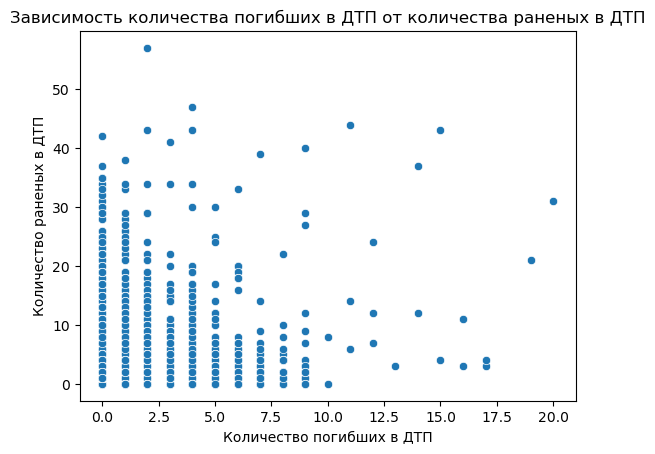

In [411]:
sns.scatterplot(
data=data,
x='dead_count',
y='injured_count')
plt.title('Зависимость количества \
погибших в ДТП от количества \
раненых в ДТП',
fontsize=12)
plt.xlabel('Количество погибших в ДТП',
fontsize=10)
plt.ylabel('Количество раненых в ДТП', fontsize=10)
plt.show()

Рост числа раненых в ДТП может привести к увеличению количества погибших. Однако существует множество аварий без летальных исходов или с небольшим количеством жертв, но с большим числом раненых. Также бывают ДТП с малым числом пострадавших, но большим количеством погибших.

Существует слабая корреляция между тяжестью ДТП и временем суток — 0.34. В светлое время суток и в тёмное с включённым освещением наблюдается аварийность, связанная с большим количеством автомобилей на дорогах и мелкими ДТП. В тёмное время суток без освещения возрастает вероятность возникновения ДТП с погибшими.

Наблюдается слабая корреляция между степенью тяжести ДТП и регионом — 0.33. Ранее было выявлено, что в Центральном, Дальневосточном, Южном и Северо-Кавказском федеральных округах вероятность возникновения ДТП с погибшими выше, чем в других округах.

Есть зависимость между временем суток и типом ДТП — коэффициент корреляции составляет 0.29. Например, наезд на пешехода происходит в конце утра и днём, когда утренний час пик уже закончился, скорость движения увеличивается, а пешеходов на дорогах всё ещё много.

Коэффициент корреляции между степенью тяжести и типом ДТП составляет 0.24. Столкновения характеризуются более высокой вероятностью ДТП с ранеными участниками. Вероятность ДТП со смертельным исходом выше при наезде на пешехода, опрокидывании, съезде с дороги и наезде на препятствие.

Коэффициент корреляции между регионом и типом ДТП составляет 0.23. Для Москвы более характерен такой тип ДТП, как столкновение транспортных средств, потому что в столице высокая плотность населения и большое количество автомобилей. В некоторых других регионах России распространены наезд на пешехода и опрокидывание транспортного средства из-за особенностей местности и климатических условий.

### Вывод

Самое раннее дорожно-транспортное происшествие, представленное в данных, произошло 1 января 2015 года, а самое позднее — 30 сентября 2024 года.

В период с 2015 по 2022 год количество дорожно-транспортных происшествий в России уменьшилось с 12.2% до 8.6%. Значительное снижение количества ДТП с 2019 по 2022 годы обусловлено пандемией COVID-19, когда люди реже покидали свои дома и пользовались транспортом. В 2023 году число ДТП увеличилось до 9.1%. Данные за 2024 год неполные — до июня или сентября в зависимости от региона, поэтому за этот период зафиксировано всех меньше аварий — 6.4%.

Количество погибших в дорожно-транспортных происшествиях постепенно снижалось с каждым годом. В 2015 году погибло 13.7% от общего числа погибших за весь рассматриваемый период, в 2022 году — 8.5%. После снятия ограничений в РФ, введённых из-за коронавируса, в 2023 году число погибших немного возросло — до 8.7%.

Как и число ДТП, число участников и раненых в ДТП резко снизилось с 2019 года по 2022 год из-за пандемии коронавируса.

Летом происходит больше всего дорожно-транспортных происшествий. Также во все годы наибольшее количество участников дорожно-транспортных происшествий приходится на летние месяцы. Увеличение светового дня приводит к более активному движению на дорогах. Количество автомобилей на дорогах возрастает из-за отдыха на природе и путешествий. В летний период средняя скорость на дорогах увеличивается, что приводит к росту числа ДТП. Летом на дорогах становится больше водителей с меньшим опытом. На дачах и в сельской местности меняется стиль вождения. В дачный сезон многие отправляются на свои участки и возвращаются с загруженными автомобилями. Дети на каникулах часто катаются на велосипедах и самокатах на дорогах. Жара и духота могут вызывать усталость у водителей.

Всех больше дорожно-транспортных происшествий произошло в Москве — 5.7% от общего числа ДТП в России. Также в топ-5 регионов по количеству ДТП входят Краснодарский край (4.2%), Санкт-Петербург (3.6%), Московская область (3.6%) и Нижегородская область (3.3%). Причины, по которым данные регионы лидируют по количеству ДТП, могут быть связаны с большим числом жителей, высокой плотностью населения и интенсивностью движения на дорогах.

К 5 регионам с наименьшим числом ДТП относятся Магаданская область (0.2%), Еврейская автономная область (0.1%), Республика Ингушетия (0.1%), Ненецкий автономный округ (0.02%) и Чукотский автономный округ (0.02%). В этих субъектах РФ происходит мало ДТП, потому что там проживает небольшое количество населения и транспортные потоки медленнее, что делает дороги более безопасными.

Среди федеральных округов больше всего ДТП произошло в Центральном (24.8% от общего числа) и Приволжском (21.9%), меньше всего – в Северо-Кавказском (4.4%). В Дальневосточном, Южном, Центральном и Северо-Кавказском федеральных округах вероятность возникновения ДТП с погибшими выше, чем в других округах.

В Центральном, Приволжском, Сибирском и Северо-Западном федеральных округах наблюдается сокращение количества ДТП с 2015 по 2022 год. В Южном, Уральском, Дальневосточном и Северо-Кавказском округах изменения количества происшествий были незначительными на протяжении исследуемого периода.

Больше всего ДТП было совершено в светлое время суток — 63.2% от всех случаев. Это можно объяснить тем, что днём интенсивность движения транспорта выше. Хорошая видимость на дороге способствует быстрой езде, из-за чего может возникнуть авария. В ясную погоду существует повышенная вероятность ослепления солнечными лучами и риск не заметить другой автомобиль. 21.8% происшествий произошли в тёмное время суток при включённом освещении. Меньше всего ДТП случалось в сумерках и в тёмное время суток с выключенным освещением — 2.8% и 0.9% соответственно.

В тёмное время суток без освещения вероятность возникновения ДТП с погибшими возрастает. 

В светлое время суток и в тёмное время суток с включённым освещением выше вероятность ДТП с несколькими участниками, в сумерки и в тёмное время суток с отсутствующим освещением – с одним участником.

В топ-5 типов дорожно-транспортных происшествий входят столкновение (42.7% от общего числа ДТП), наезд на пешехода (28.4%), съезд с дороги (6.3%), опрокидывание (6%) и наезд на препятствие (5.9%).

Вероятность ДТП со смертельным исходом выше при наезде на пешехода, опрокидывании, съезде с дороги и наезде на препятствие. Столкновения характеризуются более высокой вероятностью ДТП с ранеными участниками.

Лёгкие дорожно-транспортные происшествия составляют более половины всех аварий — 57.2%. Тяжёлыми являются 33.3% ДТП. Меньше всего ДТП с летальным исходом — 9.5%.

У лёгких ДТП вероятность возникновения выше, если участников несколько. А при тяжёлых ДТП и ДТП с погибшими вероятность выше, когда участник один.

В ДТП часто попадают транспортные средства, выпущенные не недавно и не очень давно — в 2008 (7.2% от общего числа транспортных средств), 2012 (7.2%), 2013 (6.4%), 2011 (6.4%) и 2007 (6.4%) годах.

Транспортные средства, выпущенные в более ранних годах — 2007, 2008 и 2011 годах и ставшие участниками ДТП, имеют более высокую вероятность попадания в аварии с погибшими.

Наиболее часто дорожно-транспортные происшествия происходят с участием транспортных средств таких марок, как ВАЗ (21.9%), TOYOTA (8.7%), HYUNDAI (5.2%), KIA (4.3%) и RENAULT (4.1%).

У транспортных средств марок ВАЗ вероятность попадания в ДТП с погибшими выше.

Чаще всего в ДТП попадают транспортные средства белого (23.6%), серого (17.4%) и чёрного (14.2%) цвета. Это можно объяснить тем, что данные цвета транспортных средств являются распространёнными. Реже всего в авариях участвуют транспортные средства фиолетового цвета (0.7%).

Пять наиболее распространённых категорий транспортных средств, которые часто попадают в ДТП, включают: В-класс (малый) до 3.9 м (36.9%), С-класс (малый средний, компактный) до 4.3 м (17.3%), D-класс (средний) до 4.6 м (7.3%), прочие легковые автомобили (7.3%) и мотоциклы (3.3%).

У транспортных средств В-класса (малого) до 3.9 м, мотоциклов и прочих легковых автомобилей вероятность ДТП с погибшими выше.

У транспортных средств В-класса (малого) до 3.9 м, С-класса (малого среднего, компактного) до 4.3 м, D-класса (среднего) до 4.6 м, а также прочих лекговых автомобилей вероятность ДТП с несколькими участниками выше.

Характеристики типичных ДТП без погибших: Приволжский, Северо-Западный, Сибирский и Уральский федеральные округа; светлое время суток или тёмное время суток с включённым освещением; столкновение; танспортные средства С-класса (малого среднего, компактного) до 4.3 м; транспортные средства, выпущенные в 2012 и 2013 гг.; TOYOTA, RENAULT, KIA и HYUNDAI.

Характеристики типичных ДТП с погибшими: Дальневосточный, Северо-Кавказский, Центральный и Южный федеральные округа; сумерки, тёмное время суток с выключенным или отсутствующим освещением; наезд на пешехода, опрокидывание, съезд с дороги, наезд на препятствие; транспортные средства В-класса (малого) до 3.9 м, мотоциклы и прочие легковые автомобили; транспортные средства, выпущенные в 2007, 2008 и 2011 гг.; ВАЗ.

Характеристики типичных ДТП с несколькими участниками: Приволжский, Уральский, Центральный, Южный федеральные округа; светлое время суток, тёмное время суток с включённым освещением; лёгкая степень тяжести ДТП; транспортные средства В-класса (малого) до 3.9 м, С-класса (малого среднего, компактного) до 4.3 м, D-класса (среднего) до 4.6 м, а также прочие лекговые автомобили; TOYOTA, RENAULT, KIA и HYUNDAI.

Характеристики типичных ДТП с одним участником: Дальневосточный, Северо-Кавказский федеральные округа; сумерки, тёмное время суток с отсутствующим освещением; тяжёлое ДТП или ДТП с погибшими; мотоциклы; ВАЗ.

Наибольший коэффициент корреляции среди пар переменных составляет 0.91 и указывает на очень сильную связь между количеством раненых в ДТП и количеством участников ДТП. С ростом числа участников ДТП увеличивается количество раненых в ДТП.

Средняя корреляция характерна для количества погибших в ДТП и участников ДТП — 0.54. С ростом числа участников ДТП можно наблюдать тенденцию к увеличению количества погибших в ДТП. Однако есть много ДТП без смертельных исходов или с небольшим количеством, но с большим числом участников.

Слабая корреляция существует между числом раненых и погибших в ДТП — 0.4. Рост числа раненых в ДТП может привести к увеличению количества погибших. При этом существует множество аварий без летальных исходов или с небольшим количеством жертв, но с большим числом раненых. Также бывают ДТП с малым числом пострадавших, но большим количеством погибших.

Также слабая корреляция есть между тяжестью ДТП и временем суток — 0.34. В светлое время суток и в тёмное с включённым освещением наблюдается аварийность, связанная с большим количеством автомобилей на дорогах и мелкими ДТП. В тёмное время суток без освещения возрастает вероятность возникновения ДТП с погибшими.

Наблюдается слабая корреляция между степенью тяжести ДТП и регионом — 0.33. Ранее было выявлено, что в Центральном, Дальневосточном, Южном и Северо-Кавказском федеральных округах вероятность возникновения ДТП с погибшими выше, чем в других округах.

Есть зависимость между временем суток и типом ДТП — коэффициент корреляции составляет 0.29. Например, наезд на пешехода происходит в конце утра и днём, когда утренний час пик уже закончился, скорость движения увеличивается, а пешеходов на дорогах всё ещё много.

Коэффициент корреляции между степенью тяжести и типом ДТП составляет 0.24. Столкновения характеризуются более высокой вероятностью ДТП с ранеными участниками. Вероятность ДТП со смертельным исходом выше при наезде на пешехода, опрокидывании, съезде с дороги и наезде на препятствие.

Коэффициент корреляции между регионом и типом ДТП составляет 0.23. Для Москвы более характерен такой тип ДТП, как столкновение транспортных средств, потому что в столице высокая плотность населения и большое количество автомобилей. В некоторых других регионах России распространены наезд на пешехода и опрокидывание транспортного средства из-за особенностей местности и климатических условий.

## Проверка гипотез

### Проверка гипотезы различия степени тяжести ДТП между ЦФО и другими федеральными округами РФ

Создадим столбец с 0 или 1 в зависимости от степени тяжести ДТП:

- Лёгкое ДТП — `'0'`;
- Тяжёлое ДТП, ДТП с погибшими — `'1'`.

In [424]:
data['severity_0_1'] = data['severity']
data['severity_0_1'] = data['severity_0_1'].map({'Легкий': 0, 'Тяжёлый': 1, 'С погибшими': 1})
data['severity_0_1'].head()

0    0
1    0
2    0
3    0
4    1
Name: severity_0_1, dtype: int64

Проверим гипотезу о различии средних значений показателя тяжести ДТП в Центральном федеральном округе и других российских округах. Чтобы сравнить средние арифметические двух групп между собой, применим t-тест (критерий Стьюдента).
    
Рассчитаем размер выборок и стандартные отклонения, по которым можно судить о равенстве дисперсий рассматриваемых совокупностей. Если выборки одного размера и дисперсии равны, то тест может объединить обе выборки в одну, чтобы поточнее оценить дисперсию. Если выборки разного размера и/или дисперсии у совокупностей неодинаковые, то тест может посчитать дисперсии выборок по отдельности.

In [427]:
severity_cfd = data.query('federal_district == "ЦФО"')['severity_0_1']
severity_other_districts = data.query('federal_district != "ЦФО"')['severity_0_1']

def len_and_std(sample_1, sample_2):
    print('Размер 1-й выборки:', len(sample_1))
    print('Размер 2-й выборки:', len(sample_2))
    print('Стандартное отклонение 1-й выборки:', round(np.std(sample_1), 2))
    print('Стандартное отклонение 2-й выборки:', round(np.std(sample_2), 2))

len_and_std(severity_cfd, severity_other_districts)

Размер 1-й выборки: 371988
Размер 2-й выборки: 1130784
Стандартное отклонение 1-й выборки: 0.49
Стандартное отклонение 2-й выборки: 0.5


Количество ДТП в Центральном федеральном округе (371 тыс. 988) и других федеральных округах России (1 млн. 130 тыс. 784) не совпадает. Стандартные отклонения показателя тяжести ДТП в ЦФО (0.49) и других округах (0.5) разные, что указывает на то, что дисперсии тоже не являются одинаковыми. Укажем параметр equal_var как False при вызове метода scipy.stats.ttest_ind(), чтобы тест посчитал дисперсии выборок независимо друг от друга.

- Нулевая гипотеза: средние значения показателя тяжести ДТП в Центральном федеральном округе и других федеральных округах России равны.
- Альтернативная гипотеза: средние значения показателя тяжести ДТП в Центральном федеральном округе и других федеральных округах России не равны.
    
Наиболее точен уровень статистической значимости, при котором вероятность принятия верной гипотезы максимальна. Обычно используют значения 0.05 (5%) или 0.01 (1%). Будем использовать значение 0.05 в качестве уровня статистической значимости.

In [431]:
alpha = 0.05

results = st.ttest_ind(
severity_cfd,
severity_other_districts, equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 6.010841862837371e-36
Отвергаем нулевую гипотезу


Полученное значение p-value (6.01e-36) меньше заданного уровня значимости, равного 0.05. На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу о равенстве средних значений показателя тяжести ДТП в ЦФО и других федеральных округах в пользу альтернативной гипотезы — средние значения двух выборок имеют статистически значимые различия.

Дорожно-транспортные происшествия в среднем могут являться более лёгкими в Центральном федеральном округе, потому что в нём выше уровень безопасности дорожного движения, лучше инфраструктура и автомобили имеют более высокие стандарты безопасности.

### Проверка гипотезы различия количества участников ДТП летом и в другие времена года

Проверим гипотезу о различии средних значений количества участников ДТП летом и в другие времена года. Рассчитаем размер выборок и стандартные отклонения, по которым можно судить о равенстве дисперсий рассматриваемых выборок.

In [436]:
participants_count_summer = data.query(
'datetime.dt.month in [6, 7, 8]')['participants_count']
participants_count_other_seasons = data.query(
'datetime.dt.month not in [6, 7, 8]')['participants_count']

len_and_std(participants_count_summer,
participants_count_other_seasons)

Размер 1-й выборки: 446814
Размер 2-й выборки: 1055958
Стандартное отклонение 1-й выборки: 1.24
Стандартное отклонение 2-й выборки: 1.16


Количество ДТП в летний период времени (446 тыс. 814) и другой (1 млн. 55 тыс. 958) не совпадает. Стандартные отклонения количества участников ДТП летом (1.24) и в другие времена года (1.16) разные, что указывает на то, что дисперсии тоже не являются одинаковыми. Укажем параметр equal_var как False при вызове метода scipy.stats.ttest_ind(), чтобы тест посчитал дисперсии выборок независимо друг от друга.

- Нулевая гипотеза: средние значения количества участников ДТП летом и в другие времена года равны.
- Альтернативная гипотеза: средние значения количества участников ДТП летом и в другие времена года не равны.
    
Будем использовать значение 0.05 в качестве уровня статистической значимости.

In [440]:
alpha = 0.05

results = st.ttest_ind(
participants_count_summer,
participants_count_other_seasons, equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.425426702592847e-23
Отвергаем нулевую гипотезу


Полученное значение p-value (5.43e-23) меньше заданного уровня значимости, равного 0.05. На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу о равенстве средних значений количества участников ДТП летом и в другие времена года в пользу альтернативной гипотезы — средние значения двух выборок имеют статистически значимые различия.

Увеличение светового дня способствует оживлению дорожного движения. Летом начинается сезон отпусков, многие отправляются на отдых на транспорте, что увеличивает нагрузку на дороги и повышает риск возникновения ДТП с большим количеством участников. В летний период на дорогах также появляется много водителей с небольшим опытом вождения.

### Проверка гипотезы различия количества погибших в ДТП в последние 5 лет и в предыдущие 5 лет

Создадим столбец с 0 или 1 в зависимости от периода времени:

- 2015-2019 гг. — `'0'`;
- 2020-2024 гг. — `'1'`.

In [445]:
data['accident_period'] = data['year_of_accident']
data['accident_period'] = data['accident_period'].map(
{2015: 0, 2016: 0, 2017: 0, 2018: 0, 2019: 0,
2020: 1, 2021: 1, 2022: 1, 2023: 1, 2024: 1})
data['accident_period'].head()

0    1
1    0
2    1
3    1
4    1
Name: accident_period, dtype: int64

Проверим гипотезу о различии средних значений количества погибших в ДТП в 2015-2019 гг. и 2020-2024 гг. Рассчитаем размер выборок и стандартные отклонения, по которым можно судить о равенстве дисперсий рассматриваемых выборок.

In [448]:
dead_count_2015_2019 = data.query('accident_period == 0')['dead_count']
dead_count_2020_2024 = data.query('accident_period == 1')['dead_count']

len_and_std(dead_count_2015_2019, dead_count_2020_2024)

Размер 1-й выборки: 859505
Размер 2-й выборки: 643267
Стандартное отклонение 1-й выборки: 0.39
Стандартное отклонение 2-й выборки: 0.38


Количество ДТП в 2015-2019 гг. (859 тыс. 505) и 2020-2024 гг. (643 тыс. 267) не совпадает. Стандартные отклонения количества погибших в ДТП в последние 5 лет (0.38) и в предыдущие 5 лет (0.39) разные, что указывает на то, что дисперсии тоже не являются одинаковыми. Укажем параметр equal_var как False при вызове метода scipy.stats.ttest_ind(), чтобы тест посчитал дисперсии выборок независимо друг от друга.

- Нулевая гипотеза: средние значения количества погибших в ДТП в 2015-2019 гг. и 2020-2024 гг. равны.
- Альтернативная гипотеза: средние значения количества погибших в ДТП в 2015-2019 гг. и 2020-2024 гг. не равны.
    
Будем использовать значение 0.05 в качестве уровня статистической значимости.

In [452]:
alpha = 0.05

results = st.ttest_ind(
dead_count_2015_2019,
dead_count_2020_2024, equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.856792464323489e-09
Отвергаем нулевую гипотезу


Полученное значение p-value (1.86e-09) меньше заданного уровня значимости, равного 0.05. На имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу о равенстве средних значений количества погибших в ДТП в 2015-2019 гг. и 2020-2024 гг. в пользу альтернативной гипотезы — средние значения двух выборок имеют статистически значимые различия.

Со временем происходит снижение смертности в дорожно-транспортных происшествиях. Это может быть связано с улучшением качества дорог, повышением безопасности транспортных средств, ужесточением правил дорожного движения. Также необходимо принимать во внимание влияние коронавирусных ограничений на снижение количества дорожно-транспортных происшествий и, как следствие, числа погибших в ДТП за последние пять лет.

При проверке статистических гипотез было выбрано значение 0.05 в качестве уровня статистической значимости. Если бы был использован меньший уровень значимости, равный 0.01, то результаты бы не изменились, так как полученные p-значения получились намного меньше 0.05, и они меньше и 0.01.

### Вывод

Нами была проведена проверка 3-х статистических гипотез. Для сравнения средних арифметических значений 2-х групп использовался t-тест. Уровень статистической значимости составлял 0.05.

Все гипотезы были подтверждены:

- средние значения показателя тяжести ДТП в ЦФО и других федеральных округах статистически значимо различаются;
- средние значения количества участников ДТП летом и в другие времена года статистически значимо различаются;
- средние значения количества погибших в ДТП в 2015-2019 гг. и 2020-2024 гг. статистически значимо различаются.

## Общий вывод

Нами были проанализированы данные о дорожно-транспортных происшествиях в регионах России за период с 2015 по 2024 год.

С 2015 по 2022 год количество дорожно-транспортных происшествий в России уменьшилось с 12.2% до 8.6%. Значительное снижение количества ДТП с 2019 по 2022 годы обусловлено пандемией COVID-19, когда люди реже покидали свои дома и пользовались транспортом. Количество погибших в дорожно-транспортных происшествиях также постепенно снижалось с каждым годом. В 2015 году доля погибших составила 13.7%, в 2022 году — 8.5%. После снятия ограничений в РФ, введённых из-за коронавируса, в 2023 году число погибших немного возросло — до 8.7%. Была подтверждена гипотеза о том, что средние значения количества погибших в ДТП в 2015-2019 гг. и 2020-2024 гг. статистически значимо различаются. Помимо коронавирусных ограничений, улучшение качества дорог, повышение безопасности транспортных средств и усиление правил дорожного движения могут выступать причинами снижения смертности в ДТП.

Летом происходит больше всего дорожно-транспортных происшествий. И наибольшее количество участников дорожно-транспортных происшествий приходится на летние месяцы. Была подтверждена гипотеза о статистически значимом различии средних значений количества участников ДТП летом и в другие времена года. Увеличение светового дня приводит к более активному движению на дорогах. Количество автомобилей на дорогах возрастает из-за отдыха на природе и путешествий. В летний период средняя скорость на дорогах увеличивается, что приводит к росту числа ДТП. Летом на дорогах становится больше водителей с меньшим опытом. На дачах и в сельской местности меняется стиль вождения. В дачный сезон многие отправляются на свои участки и возвращаются с загруженными автомобилями. Дети на каникулах часто катаются на велосипедах и самокатах на дорогах. Жара и духота могут вызывать усталость у водителей.

В Москве, столице и крупнейшем по численности населения городе России, произошло всех больше дорожно-транспортных происшествий (5.7%). Также в топ-5 регионов по количеству ДТП входят Краснодарский край (4.2%), Санкт-Петербург (3.6%), Московская область (3.6%) и Нижегородская область (3.3%). Причины, по которым данные регионы лидируют по количеству ДТП, могут быть связаны с большим числом жителей, высокой плотностью населения и интенсивностью движения на дорогах.

Среди федеральных округов по числу ДТП лидируют Центральный (24.8%) и Приволжский (21.9%). В Дальневосточном, Южном, Центральном и Северо-Кавказском федеральных округах вероятность возникновения ДТП с погибшими выше, чем в других округах. Сокращение количества ДТП за рассматриваемый период в большей степени характерно для Центрального, Приволжского, Сибирского и Северо-Западного федеральных округов.

Больше всего ДТП было совершено в светлое время суток (63.2%). Это можно объяснить тем, что днём интенсивность движения транспорта выше. Хорошая видимость на дороге способствует быстрой езде, из-за чего может возникнуть авария. В ясную погоду существует повышенная вероятность ослепления солнечными лучами и риск не заметить другой автомобиль. 21.8% происшествий произошли в тёмное время суток при включённом освещении. В тёмное время суток без освещения возрастает вероятность возникновения ДТП с погибшими. В светлое время суток и в тёмное время суток с включённым освещением выше вероятность ДТП с несколькими участниками, в сумерки и в тёмное время суток с отсутствующим освещением – с одним участником.

В топ-5 типов дорожно-транспортных происшествий входят столкновение (42.7%), наезд на пешехода (28.4%), съезд с дороги (6.3%), опрокидывание (6%) и наезд на препятствие (5.9%). Вероятность ДТП со смертельным исходом выше при наезде на пешехода, опрокидывании, съезде с дороги и наезде на препятствие, чем при столкновении.

Лёгкие дорожно-транспортные происшествия составляют более половины всех аварий — 57.2%. Тяжёлыми являются 33.3% ДТП. У лёгких ДТП вероятность возникновения выше, когда участников несколько, а при тяжёлых ДТП и ДТП с погибшими вероятность выше, когда участник один. Средние значения показателя тяжести ДТП в Центральном федеральном округе и других федеральных округах статистически значимо различаются. Дорожно-транспортные происшествия в среднем могут являться более лёгкими в Центральном федеральном округе, потому что в нём выше уровень безопасности дорожного движения, лучше инфраструктура и автомобили имеют более высокие стандарты безопасности.

В ДТП часто попадают транспортные средства, выпущенные в 2008 (7.2%), 2012 (7.2%), 2007 (6.4%), 2011 (6.4%) и 2013 (6.4%) годах. Транспортные средства, выпущенные в 2007, 2008 и 2011 годах, имеют более высокую вероятность попадания в аварии с погибшими, чем транспортные средства, выпущенные позднее — в 2012-2013 гг.

Наиболее часто дорожно-транспортные происшествия происходят с участием транспортных средств таких марок, как ВАЗ (21.9%), TOYOTA (8.7%), HYUNDAI (5.2%), KIA (4.3%) и RENAULT (4.1%). У транспортных средств марок ВАЗ вероятность попадания в ДТП с погибшими выше.

Чаще всего в ДТП попадают транспортные средства белого (23.6%), серого (17.4%) и чёрного (14.2%) цвета. Это можно объяснить тем, что данные цвета транспортных средств являются распространёнными. Реже всего в авариях участвуют транспортные средства фиолетового цвета (0.7%).

Пять наиболее распространённых категорий транспортных средств, которые часто попадают в ДТП, включают: В-класс (малый) до 3.9 м (36.9%), С-класс (малый средний, компактный) до 4.3 м (17.3%), D-класс (средний) до 4.6 м (7.3%), прочие легковые автомобили (7.3%) и мотоциклы (3.3%). У транспортных средств В-класса (малого) до 3.9 м, мотоциклов и прочих легковых автомобилей вероятность ДТП с погибшими выше. У транспортных средств В-класса (малого) до 3.9 м, С-класса (малого среднего, компактного) до 4.3 м, D-класса (среднего) до 4.6 м, а также прочих лекговых автомобилей выше вероятность ДТП с несколькими участниками.

На основе исследовательского анализа данных были составлены характеристики типичных ДТП без погибших и с погибшими, с одним и несколькими участниками.

Характеристики типичных ДТП без погибших: Приволжский, Северо-Западный, Сибирский и Уральский федеральные округа; светлое время суток или тёмное время суток с включённым освещением; столкновение; танспортные средства С-класса (малого среднего, компактного) до 4.3 м; транспортные средства, выпущенные в 2012 и 2013 гг.; TOYOTA, RENAULT, KIA и HYUNDAI.

Характеристики типичных ДТП с погибшими: Дальневосточный, Северо-Кавказский, Центральный и Южный федеральные округа; сумерки, тёмное время суток с выключенным или отсутствующим освещением; наезд на пешехода, опрокидывание, съезд с дороги, наезд на препятствие; транспортные средства В-класса (малого) до 3.9 м, мотоциклы и прочие легковые автомобили; транспортные средства, выпущенные в 2007, 2008 и 2011 гг.; ВАЗ.

Характеристики типичных ДТП с одним участником: Дальневосточный, Северо-Кавказский федеральные округа; сумерки, тёмное время суток с отсутствующим освещением; тяжёлое ДТП или ДТП с погибшими; мотоциклы; ВАЗ.

Характеристики типичных ДТП с несколькими участниками: Приволжский, Уральский, Центральный, Южный федеральные округа; светлое время суток, тёмное время суток с включённым освещением; лёгкая степень тяжести ДТП; транспортные средства В-класса (малого) до 3.9 м, С-класса (малого среднего, компактного) до 4.3 м, D-класса (среднего) до 4.6 м, а также прочие лекговые автомобили; TOYOTA, RENAULT, KIA и HYUNDAI.

В результате корреляционного анализа были выявлены различные связи между признаками, влияющими на дорожно-транспортные происшествия. Установлены сильные и средние корреляции между количеством участников, раненых и погибших в ДТП. Слабые корреляции обнаружены между тяжестью ДТП, временем суток, регионом и типом ДТП.

- Между количеством участников и раненых в ДТП коэффициент корреляции составил 0.91. С ростом числа участников ДТП увеличивается количество раненых в ДТП.
- Между количеством участников и погибших в ДТП коэффициент корреляции составил 0.54. С ростом числа участников ДТП можно наблюдать тенденцию к увеличению количества погибших в ДТП.
- Между количеством раненых и погибших в ДТП коэффициент корреляции составил 0.4. Рост числа раненых в ДТП может привести к увеличению количества погибших.
- Между тяжестью ДТП и временем суток коэффициент корреляции составил 0.34. В светлое время суток и в тёмное с включённым освещением наблюдается аварийность, связанная с большим количеством автомобилей на дорогах и мелкими ДТП. В тёмное время суток без освещения возрастает вероятность возникновения ДТП с погибшими.
- Между степенью тяжести ДТП и регионом коэффициент корреляции составил 0.33. В Центральном, Дальневосточном, Южном и Северо-Кавказском федеральных округах вероятность возникновения ДТП с погибшими выше, чем в других округах.
- Между временем суток и типом ДТП коэффициент корреляции составил 0.29. Наезд на пешехода происходит в конце утра и днём, когда утренний час пик уже закончился, скорость движения увеличивается, а пешеходов на дорогах всё ещё много.
- Между степенью тяжести и типом ДТП коэффициент корреляции составил 0.24. Столкновения характеризуются более высокой вероятностью ДТП с ранеными участниками. Вероятность ДТП со смертельным исходом выше при наезде на пешехода, опрокидывании, съезде с дороги и наезде на препятствие.
- Между регионом и типом ДТП коэффициент корреляции составил 0.23. Для Москвы более характерен такой тип ДТП, как столкновение транспортных средств, потому что в столице высокая плотность населения и большое количество автомобилей. В некоторых других регионах России распространены наезд на пешехода и опрокидывание транспортного средства из-за особенностей местности и климатических условий.

Эти результаты указывают на необходимость учитывать различные факторы при разработке мер по предотвращению дорожно-транспортных происшествий и повышению безопасности на дорогах.